In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

In [6]:
import pandas as pd
df = pd.read_csv("Headway Data, 8-1-2023 to 9-30-2023.csv")
df.head()

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
0    120230801             1      99457890  2023-08-01          22   
1    120230801             1      99457891  2023-08-01          22   
2    120230801             1      99457892  2023-08-01          22   
3    120230801             1      99457893  2023-08-01          22   
4    120230801             1      99457894  2023-08-01          22   

   BLOCK_ABBR  OPERATOR  TRIP_ID  OVERLOAD_ID ROUTE_DIRECTION_NAME  ...  \
0        2200      1040   345104            0          TO DOWNTOWN  ...   
1        2200      1040   345104            0          TO DOWNTOWN  ...   
2        2200      1040   345104            0          TO DOWNTOWN  ...   
3        2200      1040   345104            0          TO DOWNTOWN  ...   
4        2200      1040   345105            0        FROM DOWNTOWN  ...   

  ACTUAL_HDWY  HDWY_DEV  ADJUSTED_EARLY_COUNT  ADJUSTED_LATE_COUNT  \
0         NaN       NaN                     0                    0   
1         NaN       NaN                     0                    0   
2         NaN       NaN                     0                    0   
3         NaN       NaN                     0                    0   
4         NaN       NaN                     0                    0   

   ADJUSTED_ONTIME_COUNT STOP_CANCELLED PREV_SCHED_STOP_CANCELLED IS_RELIEF  \
0                      1              0                       0.0         0   
1                      1              0                       0.0         0   
2                      1              0                       0.0         0   
3                      1              0                       NaN         0   
4                      1              0                       0.0         0   

   DWELL_IN_MINS  SCHEDULED_LAYOVER_MINUTES  
0       6.500000                        NaN  
1       0.000000                        NaN  
2       0.000000                        NaN  
3       0.000000                        NaN  
4      12.866666                        5.0  

[5 rows x 30 columns]

In [5]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

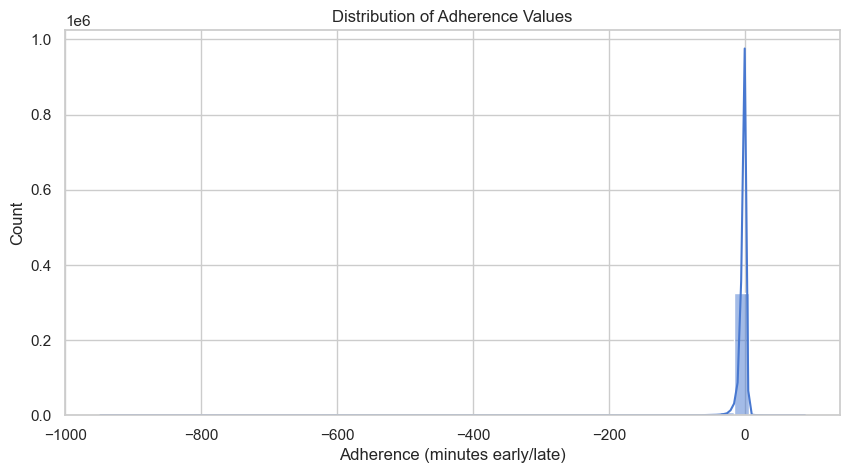

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df["ADHERENCE"], bins=50, kde=True)
plt.title("Distribution of Adherence Values")
plt.xlabel("Adherence (minutes early/late)")
plt.ylabel("Count")
plt.show()

In [9]:
df.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [11]:
early_total = df["ADJUSTED_EARLY_COUNT"].sum()
late_total = df["ADJUSTED_LATE_COUNT"].sum()
ontime_total = df["ADJUSTED_ONTIME_COUNT"].sum()
total = early_total + late_total + ontime_total
early_pct = early_total / total * 100
late_pct = late_total / total * 100
ontime_pct = ontime_total / total * 100
print(f"On-time: {ontime_pct:.2f}%")
print(f"Late: {late_pct:.2f}%")
print(f"Early: {early_pct:.2f}%")

On-time: 79.69%
Late: 17.42%
Early: 2.88%


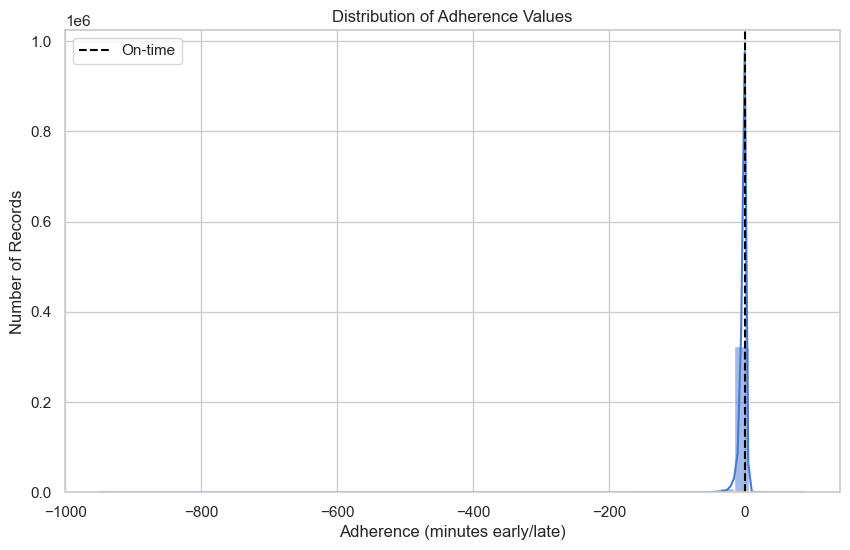

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df["ADHERENCE"], bins=50, kde=True)
plt.title("Distribution of Adherence Values")
plt.xlabel("Adherence (minutes early/late)")
plt.ylabel("Number of Records")
plt.axvline(0, color="black", linestyle="--", label="On-time")
plt.legend()
plt.show()

In [13]:
df["ADHERENCE"].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

In [14]:
route_perf = df.groupby("ROUTE_NAME")["ADHERENCE"].mean().sort_values()
direction_perf = df.groupby("DIRECTION")["ADHERENCE"].mean().sort_values()
location_perf = df.groupby("LOCATION_NAME")["ADHERENCE"].mean().sort_values()

KeyError: 'ROUTE_NAME'

In [15]:
for c in df.columns:
    print(repr(c))

'CALENDAR_ID'
'SERVICE_ABBR'
'ADHERENCE_ID'
'DATE'
'ROUTE_ABBR'
'BLOCK_ABBR'
'OPERATOR'
'TRIP_ID'
'OVERLOAD_ID'
'ROUTE_DIRECTION_NAME'
'TIME_POINT_ABBR'
'ROUTE_STOP_SEQUENCE'
'TRIP_EDGE'
'LATITUDE'
'LONGITUDE'
'SCHEDULED_TIME'
'ACTUAL_ARRIVAL_TIME'
'ACTUAL_DEPARTURE_TIME'
'ADHERENCE'
'SCHEDULED_HDWY'
'ACTUAL_HDWY'
'HDWY_DEV'
'ADJUSTED_EARLY_COUNT'
'ADJUSTED_LATE_COUNT'
'ADJUSTED_ONTIME_COUNT'
'STOP_CANCELLED'
'PREV_SCHED_STOP_CANCELLED'
'IS_RELIEF'
'DWELL_IN_MINS'
'SCHEDULED_LAYOVER_MINUTES'


In [16]:
candidates = {}
keywords = ["route","direction","loc","stop","station","operator","ontime","adherence"]
for k in keywords:
    candidates[k] = [c for c in df.columns if k.lower() in c.lower()]
import pprint
pprint.pprint(candidates)

{'adherence': ['ADHERENCE_ID', 'ADHERENCE'],
 'direction': ['ROUTE_DIRECTION_NAME'],
 'loc': ['BLOCK_ABBR'],
 'ontime': ['ADJUSTED_ONTIME_COUNT'],
 'operator': ['OPERATOR'],
 'route': ['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'ROUTE_STOP_SEQUENCE'],
 'station': [],
 'stop': ['ROUTE_STOP_SEQUENCE', 'STOP_CANCELLED', 'PREV_SCHED_STOP_CANCELLED']}


In [17]:
df.columns = [c.strip() for c in df.columns]
df.columns = [c.replace("\n"," ").replace("\r"," ") for c in df.columns]
df.columns = [c.replace("  ", " ") for c in df.columns]
for c in df.columns:
    print(repr(c))

'CALENDAR_ID'
'SERVICE_ABBR'
'ADHERENCE_ID'
'DATE'
'ROUTE_ABBR'
'BLOCK_ABBR'
'OPERATOR'
'TRIP_ID'
'OVERLOAD_ID'
'ROUTE_DIRECTION_NAME'
'TIME_POINT_ABBR'
'ROUTE_STOP_SEQUENCE'
'TRIP_EDGE'
'LATITUDE'
'LONGITUDE'
'SCHEDULED_TIME'
'ACTUAL_ARRIVAL_TIME'
'ACTUAL_DEPARTURE_TIME'
'ADHERENCE'
'SCHEDULED_HDWY'
'ACTUAL_HDWY'
'HDWY_DEV'
'ADJUSTED_EARLY_COUNT'
'ADJUSTED_LATE_COUNT'
'ADJUSTED_ONTIME_COUNT'
'STOP_CANCELLED'
'PREV_SCHED_STOP_CANCELLED'
'IS_RELIEF'
'DWELL_IN_MINS'
'SCHEDULED_LAYOVER_MINUTES'


In [19]:
for c in df.columns:
    print(repr(c))

'CALENDAR_ID'
'SERVICE_ABBR'
'ADHERENCE_ID'
'DATE'
'ROUTE_ABBR'
'BLOCK_ABBR'
'OPERATOR'
'TRIP_ID'
'OVERLOAD_ID'
'ROUTE_DIRECTION_NAME'
'TIME_POINT_ABBR'
'ROUTE_STOP_SEQUENCE'
'TRIP_EDGE'
'LATITUDE'
'LONGITUDE'
'SCHEDULED_TIME'
'ACTUAL_ARRIVAL_TIME'
'ACTUAL_DEPARTURE_TIME'
'ADHERENCE'
'SCHEDULED_HDWY'
'ACTUAL_HDWY'
'HDWY_DEV'
'ADJUSTED_EARLY_COUNT'
'ADJUSTED_LATE_COUNT'
'ADJUSTED_ONTIME_COUNT'
'STOP_CANCELLED'
'PREV_SCHED_STOP_CANCELLED'
'IS_RELIEF'
'DWELL_IN_MINS'
'SCHEDULED_LAYOVER_MINUTES'


In [20]:
route_col = "Route"          
direction_col = "Direction"  
loc_col = "Stop Name"        
adherence_col = "ADHERENCE"  
print(route_col, direction_col, loc_col, adherence_col)

Route Direction Stop Name ADHERENCE


In [23]:
route_col = "ROUTE_ABBR"
direction_col = "ROUTE_DIRECTION_NAME"
loc_col = "TIME_POINT_ABBR"
adherence_col = "ADHERENCE"

In [24]:
df[[route_col, direction_col, loc_col, adherence_col]].head()

ROUTE_ABBR ROUTE_DIRECTION_NAME TIME_POINT_ABBR  ADHERENCE
0          22          TO DOWNTOWN            MHSP  -2.133333
1          22          TO DOWNTOWN            ELIZ  -2.450000
2          22          TO DOWNTOWN            CV23  -0.933333
3          22          TO DOWNTOWN         MCC5_10   6.283333
4          22        FROM DOWNTOWN         MCC5_10  -1.583333

In [25]:
route_perf = df.groupby(route_col)[adherence_col].mean().sort_values()
print("Average adherence by route:")
print(route_perf.head(10))

direction_perf = df.groupby(direction_col)[adherence_col].mean().sort_values()
print("\nAverage adherence by direction:")
print(direction_perf)

top_locations = df[loc_col].value_counts().head(10).index
loc_perf = df[df[loc_col].isin(top_locations)].groupby(loc_col)[adherence_col].mean().sort_values()
print("\nAverage adherence by top 10 timepoints:")
print(loc_perf)

Average adherence by route:
ROUTE_ABBR
55   -4.823302
52   -3.971342
3    -3.761491
7    -3.346555
56   -2.703988
50   -2.505022
23   -1.760110
22   -1.138107
Name: ADHERENCE, dtype: float64

Average adherence by direction:
ROUTE_DIRECTION_NAME
FROM DOWNTOWN   -3.960287
TO DOWNTOWN     -2.321804
Name: ADHERENCE, dtype: float64

Average adherence by top 10 timepoints:
TIME_POINT_ABBR
MXDONEL    -5.675430
MXBELL     -5.521317
MXWHARF    -5.335053
MXTHOMP    -4.362459
HHWM       -4.271982
MCC4_15    -3.801972
WHBG       -3.586182
GXRVRGAT   -2.793618
GXMADISO   -2.699881
DWMRT      -2.048339
Name: ADHERENCE, dtype: float64


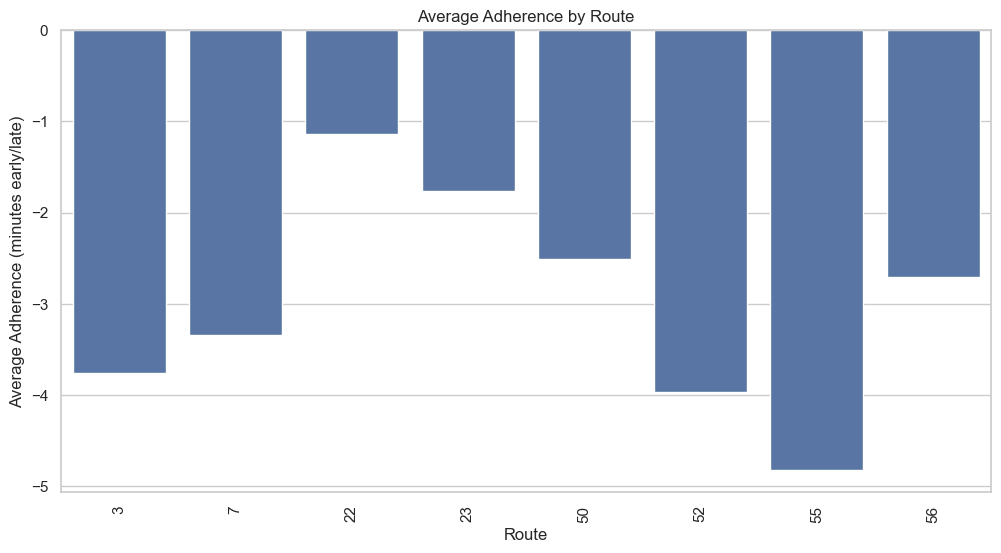

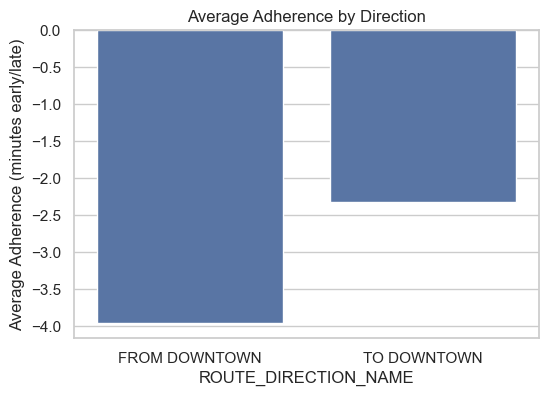

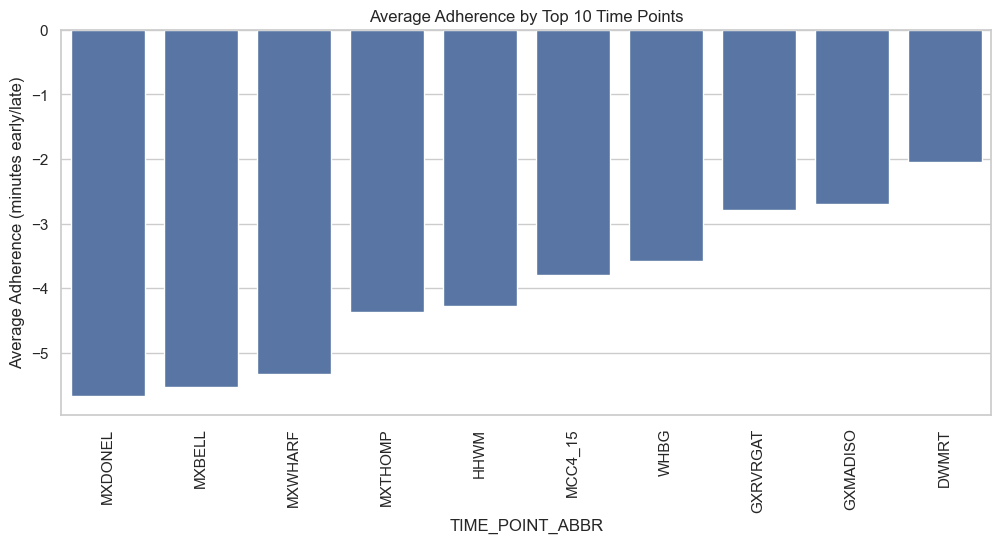

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.barplot(x=route_perf.index, y=route_perf.values)
plt.xticks(rotation=90)
plt.title("Average Adherence by Route")
plt.xlabel("Route")
plt.ylabel("Average Adherence (minutes early/late)")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=direction_perf.index, y=direction_perf.values)
plt.title("Average Adherence by Direction")
plt.ylabel("Average Adherence (minutes early/late)")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=loc_perf.index, y=loc_perf.values)
plt.xticks(rotation=90)
plt.title("Average Adherence by Top 10 Time Points")
plt.ylabel("Average Adherence (minutes early/late)")
plt.show()

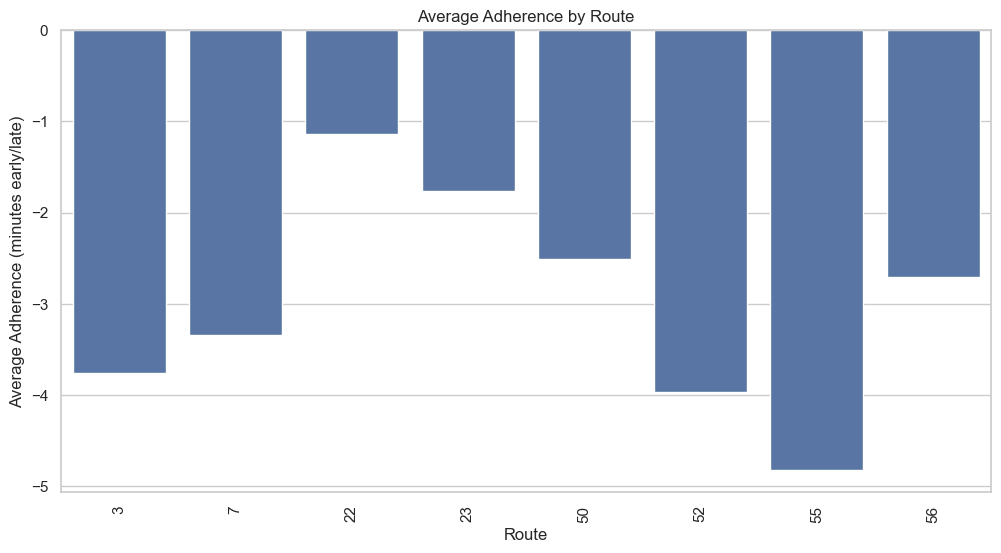

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x=route_perf.index, y=route_perf.values)
plt.xticks(rotation=90)
plt.title("Average Adherence by Route")
plt.xlabel("Route")
plt.ylabel("Average Adherence (minutes early/late)")
plt.show()

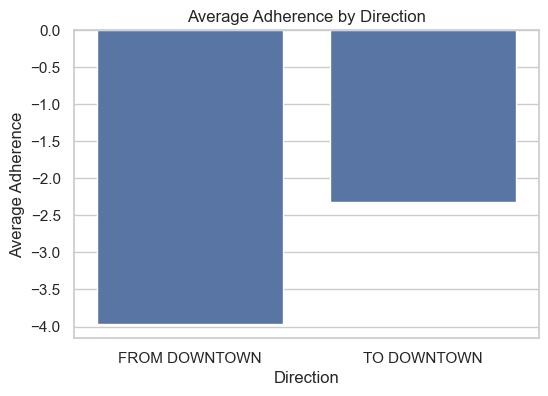

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x=direction_perf.index, y=direction_perf.values)
plt.title("Average Adherence by Direction")
plt.xlabel("Direction")
plt.ylabel("Average Adherence")
plt.show()

Top 10 routes most late (most negative mean adherence):
ROUTE_ABBR
55   -4.823302
52   -3.971342
3    -3.761491
7    -3.346555
56   -2.703988
50   -2.505022
23   -1.760110
22   -1.138107
Name: ADHERENCE, dtype: float64

Top 10 routes most early (most positive mean adherence):
ROUTE_ABBR
55   -4.823302
52   -3.971342
3    -3.761491
7    -3.346555
56   -2.703988
50   -2.505022
23   -1.760110
22   -1.138107
Name: ADHERENCE, dtype: float64


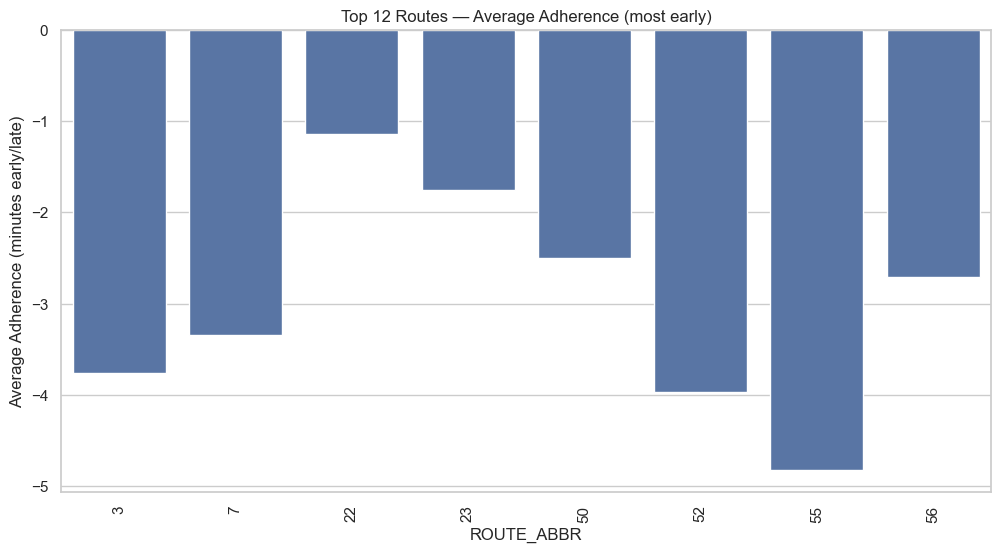

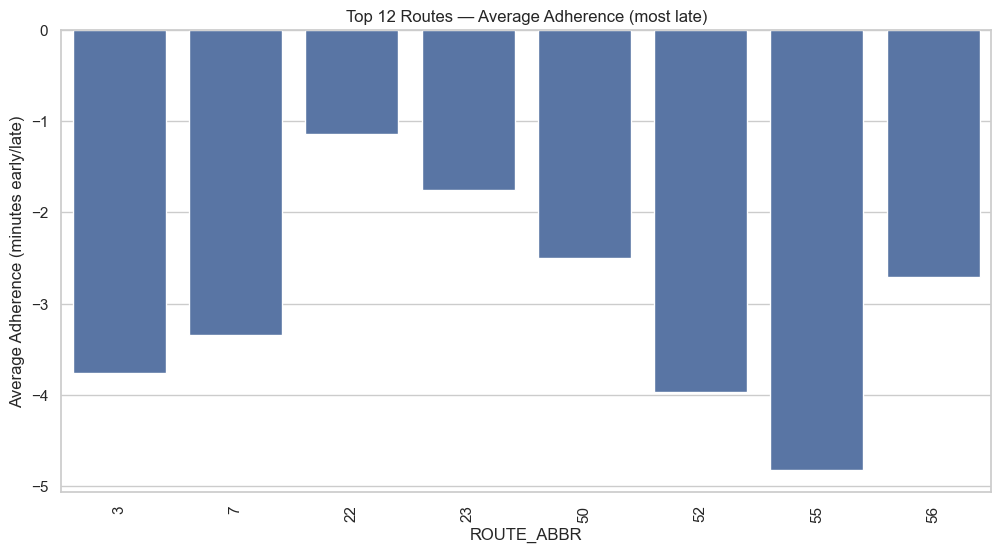


Average adherence by direction:
ROUTE_DIRECTION_NAME
FROM DOWNTOWN   -3.960287
TO DOWNTOWN     -2.321804
Name: ADHERENCE, dtype: float64


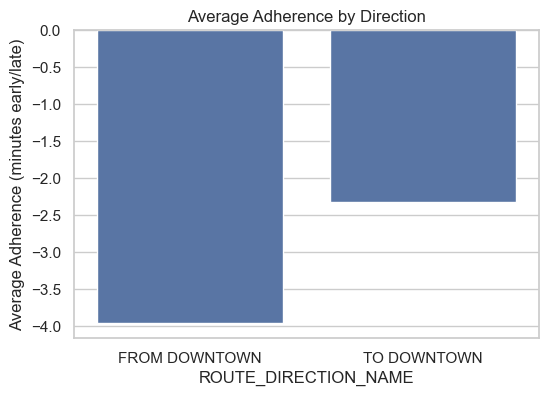


Average adherence for top 10 busiest locations:
TIME_POINT_ABBR
MXDONEL    -5.675430
MXBELL     -5.521317
MXWHARF    -5.335053
MXTHOMP    -4.362459
HHWM       -4.271982
MCC4_15    -3.801972
WHBG       -3.586182
GXRVRGAT   -2.793618
GXMADISO   -2.699881
DWMRT      -2.048339
Name: ADHERENCE, dtype: float64


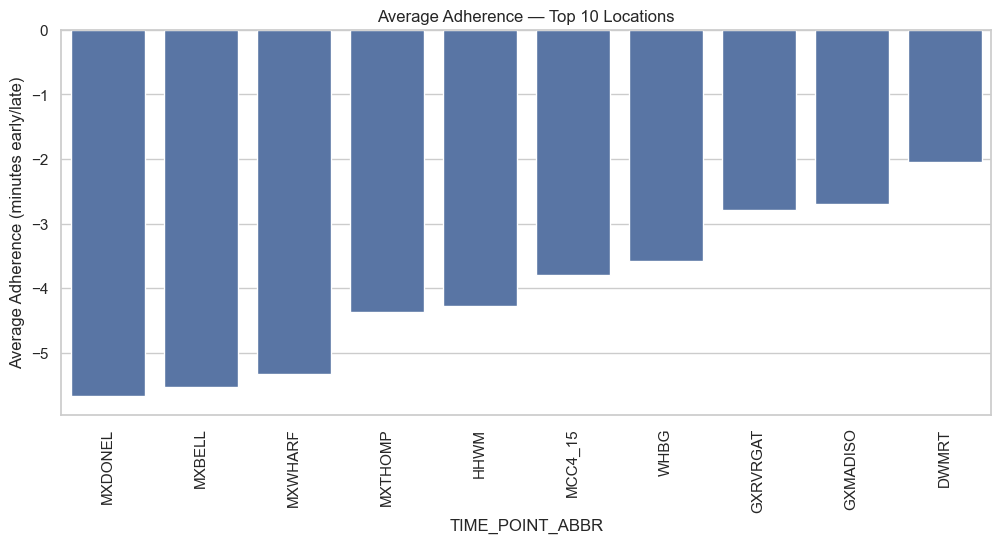

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


route_perf = df.groupby(route_col)[adherence_col].mean().sort_values()
print("Top 10 routes most late (most negative mean adherence):")
print(route_perf.head(10))
print("\nTop 10 routes most early (most positive mean adherence):")
print(route_perf.tail(10))


N = 12
plt.figure(figsize=(12,6))
sns.barplot(x=route_perf.index[-N:], y=route_perf.values[-N:])  # most early
plt.xticks(rotation=90)
plt.title("Top {} Routes — Average Adherence (most early)".format(N))
plt.ylabel("Average Adherence (minutes early/late)")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=route_perf.index[:N], y=route_perf.values[:N])   # most late
plt.xticks(rotation=90)
plt.title("Top {} Routes — Average Adherence (most late)".format(N))
plt.ylabel("Average Adherence (minutes early/late)")
plt.show()


direction_perf = df.groupby(direction_col)[adherence_col].mean().sort_values()
print("\nAverage adherence by direction:")
print(direction_perf)

plt.figure(figsize=(6,4))
sns.barplot(x=direction_perf.index, y=direction_perf.values)
plt.title("Average Adherence by Direction")
plt.ylabel("Average Adherence (minutes early/late)")
plt.show()


top_locations = df[loc_col].value_counts().head(10).index
loc_perf = df[df[loc_col].isin(top_locations)].groupby(loc_col)[adherence_col].mean().sort_values()
print("\nAverage adherence for top 10 busiest locations:")
print(loc_perf)

plt.figure(figsize=(12,5))
sns.barplot(x=loc_perf.index, y=loc_perf.values)
plt.xticks(rotation=90)
plt.title("Average Adherence — Top 10 Locations")
plt.ylabel("Average Adherence (minutes early/late)")
plt.show()


In [31]:
[x for x in df.columns if "ADJUSTED" in x.upper()]

['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']

In [32]:
if all(col in df.columns for col in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    agg = df.groupby(route_col)[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
    agg["total"] = agg.sum(axis=1)
    agg["ontime_pct"] = agg["ADJUSTED_ONTIME_COUNT"] / agg["total"] * 100
    agg["late_pct"]   = agg["ADJUSTED_LATE_COUNT"] / agg["total"] * 100
    agg["early_pct"]  = agg["ADJUSTED_EARLY_COUNT"] / agg["total"] * 100
    # show top/bottom by ontime_pct
    print(agg.sort_values("ontime_pct", ascending=False).head(10))
else:
    # fallback: use adherence thresholds
    print("Adjusted count columns not found; using adherence thresholds to estimate on-time %.")
    # define on-time as adherence between -6 and +1 (per README)
    df["_ontime_flag"] = df[adherence_col].between(-6, 1, inclusive="both")
    ontime_by_route = df.groupby(route_col)["_ontime_flag"].mean().sort_values(ascending=False) * 100
    print(ontime_by_route.head(10))


            ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  \
ROUTE_ABBR                                                                     
22                          22492                 2065                   631   
23                          35137                 3230                  1286   
50                          36309                 5113                  1207   
56                          48361                 8837                  1752   
7                           13417                 3417                   433   
52                          37736                10038                  1553   
3                           34516                 9590                  1382   
55                          42080                16748                  1531   

            total  ontime_pct   late_pct  early_pct  
ROUTE_ABBR                                           
22          25188   89.296490   8.198348   2.505161  
23          39653   88.611202   8.145

Top 10 routes by on-time % (min obs = 30)


ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  \
ROUTE_ABBR                                                                     
22                          22492                 2065                   631   
23                          35137                 3230                  1286   
50                          36309                 5113                  1207   
56                          48361                 8837                  1752   
7                           13417                 3417                   433   
52                          37736                10038                  1553   
3                           34516                 9590                  1382   
55                          42080                16748                  1531   

            total_obs  ontime_pct   late_pct  early_pct  mean_adherence  
ROUTE_ABBR                                                               
22              25188   89.296490   8.198348   2.505161       -1.138107  
23              39653   88.611202   8.145664   3.243134       -1.760110  
50              42629   85.174412  11.994182   2.831406       -2.505022  
56              58950   82.037320  14.990670   2.972010       -2.703988  
7               17267   77.703133  19.789193   2.507674       -3.346555  
52              49327   76.501713  20.349910   3.148377       -3.971342  
3               45488   75.879353  21.082483   3.038164       -3.761491  
55              60359   69.716198  27.747312   2.536490       -4.823302


Bottom 10 routes by on-time % (min obs = 30)


ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  \
ROUTE_ABBR                                                                     
22                          22492                 2065                   631   
23                          35137                 3230                  1286   
50                          36309                 5113                  1207   
56                          48361                 8837                  1752   
7                           13417                 3417                   433   
52                          37736                10038                  1553   
3                           34516                 9590                  1382   
55                          42080                16748                  1531   

            total_obs  ontime_pct   late_pct  early_pct  mean_adherence  
ROUTE_ABBR                                                               
22              25188   89.296490   8.198348   2.505161       -1.138107  
23              39653   88.611202   8.145664   3.243134       -1.760110  
50              42629   85.174412  11.994182   2.831406       -2.505022  
56              58950   82.037320  14.990670   2.972010       -2.703988  
7               17267   77.703133  19.789193   2.507674       -3.346555  
52              49327   76.501713  20.349910   3.148377       -3.971342  
3               45488   75.879353  21.082483   3.038164       -3.761491  
55              60359   69.716198  27.747312   2.536490       -4.823302

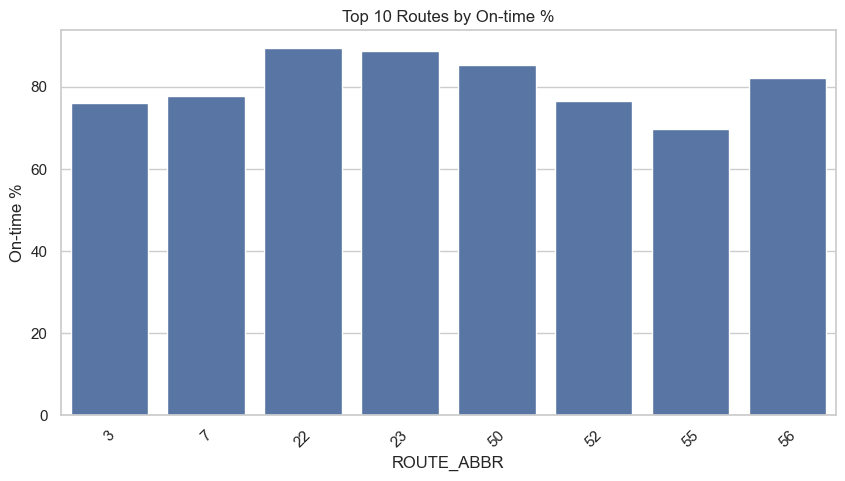

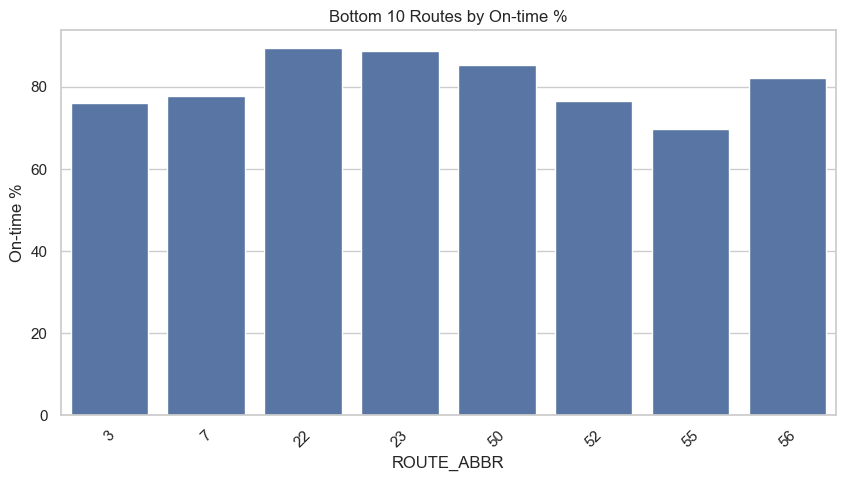

In [33]:
route_col = "ROUTE_ABBR"
direction_col = "ROUTE_DIRECTION_NAME"
loc_col = "TIME_POINT_ABBR"
adherence_col = "ADHERENCE"

agg = df.groupby(route_col)[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
agg["total_obs"] = agg.sum(axis=1)
agg = agg[agg["total_obs"] > 0]   

agg["ontime_pct"] = agg["ADJUSTED_ONTIME_COUNT"] / agg["total_obs"] * 100
agg["late_pct"]   = agg["ADJUSTED_LATE_COUNT"] / agg["total_obs"] * 100
agg["early_pct"]  = agg["ADJUSTED_EARLY_COUNT"] / agg["total_obs"] * 100

mean_ad = df.groupby(route_col)[adherence_col].mean().rename("mean_adherence")
agg = agg.join(mean_ad)

agg_sorted = agg.sort_values("ontime_pct", ascending=False)

min_obs = 30
agg_filtered = agg_sorted[agg_sorted["total_obs"] >= min_obs]

print("Top 10 routes by on-time % (min obs = {})".format(min_obs))
display(agg_filtered.head(10))

print("\nBottom 10 routes by on-time % (min obs = {})".format(min_obs))
display(agg_filtered.tail(10))

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

top10 = agg_filtered.sort_values("ontime_pct", ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10["ontime_pct"])
plt.xticks(rotation=45)
plt.title("Top 10 Routes by On-time %")
plt.ylabel("On-time %")
plt.show()

bot10 = agg_filtered.sort_values("ontime_pct", ascending=True).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=bot10.index, y=bot10["ontime_pct"])
plt.xticks(rotation=45)
plt.title("Bottom 10 Routes by On-time %")
plt.ylabel("On-time %")
plt.show()


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

date_col = "DATE"
time_col = "SCHEDULED_TIME"  
adherence_col = "ADHERENCE"


df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


df['_sched_time_parsed'] = pd.to_datetime(df[time_col].astype(str), errors='coerce').dt.time


df['scheduled_dt'] = pd.to_datetime(
    df[date_col].dt.strftime("%Y-%m-%d") + ' ' + df[time_col].astype(str),
    errors='coerce'
)


mask = df['scheduled_dt'].isna() & df['_sched_time_parsed'].notna()
if mask.any():
    df.loc[mask, 'scheduled_dt'] = pd.to_datetime(
        df.loc[mask, date_col].dt.strftime("%Y-%m-%d") + ' ' + df.loc[mask, '_sched_time_parsed'].astype(str),
        errors='coerce'
    )


df['hour'] = df['scheduled_dt'].dt.hour
df['weekday'] = df['scheduled_dt'].dt.day_name()  # "Monday", "Tuesday", ...
df['weekday_num'] = df['scheduled_dt'].dt.weekday  # 0=Mon ... 6=Sun


bins = [0,4,6,9,12,15,18,21,24]
labels = ["LateNight","EarlyMorning","AM_Peak","Midday","Afternoon","PM_Peak","Evening","Night"]
# for hours that are NaN, time_period will be NaN
df['time_period'] = pd.cut(df['hour'].fillna(-1), bins=bins, labels=labels, right=False)


C:\Users\user\AppData\Local\Temp\ipykernel_26424\2277334163.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['scheduled_dt'] = pd.to_datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_26424\2277334163.py:18: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['scheduled_dt'] = pd.to_datetime(


AttributeError: Can only use .dt accessor with datetimelike values

In [38]:
import pandas as pd
import numpy as np

print("Starting checks...")

# show first few raw values so we can inspect formats
print("\nSample DATE values:")
print(df['DATE'].astype(str).head(5).tolist())

print("\nSample SCHEDULED_TIME values:")
print(df['SCHEDULED_TIME'].astype(str).head(8).tolist())

# parse DATE if not already parsed
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
print("\nParsed DATE -> null count:", df['DATE'].isna().sum())

# robust parse of scheduled time (try to parse strings into time)
df['_sched_time_parsed'] = pd.to_datetime(df['SCHEDULED_TIME'].astype(str), errors='coerce').dt.time
print("Parsed SCHEDULED_TIME -> sample parsed times:", df['_sched_time_parsed'].dropna().unique()[:8].tolist())

# combine date + time into scheduled_dt (many datasets store time as 'HH:MM:SS' or similar)
df['scheduled_dt'] = pd.to_datetime(
    df['DATE'].dt.strftime("%Y-%m-%d") + ' ' + df['SCHEDULED_TIME'].astype(str),
    errors='coerce'
)

# if some scheduled_dt are still NaT, try the parsed time
mask = df['scheduled_dt'].isna() & df['_sched_time_parsed'].notna()
if mask.any():
    df.loc[mask, 'scheduled_dt'] = pd.to_datetime(
        df.loc[mask, 'DATE'].dt.strftime("%Y-%m-%d") + ' ' + df.loc[mask, '_sched_time_parsed'].astype(str),
        errors='coerce'
    )

print("scheduled_dt null count after attempts:", df['scheduled_dt'].isna().sum())

# extract hour and weekday
df['hour'] = df['scheduled_dt'].dt.hour
df['weekday'] = df['scheduled_dt'].dt.day_name()
df['weekday_num'] = df['scheduled_dt'].dt.weekday

# time period bins (these will be NaN for rows with no scheduled_dt)
bins = [0,4,6,9,12,15,18,21,24]
labels = ["LateNight","EarlyMorning","AM_Peak","Midday","Afternoon","PM_Peak","Evening","Night"]
df['time_period'] = pd.cut(df['hour'].fillna(-1), bins=bins, labels=labels, right=False)

print("\nColumn creation complete. Showing sample rows (DATE, SCHEDULED_TIME, scheduled_dt, hour, weekday, time_period):\n")
display(df[['DATE','SCHEDULED_TIME','scheduled_dt','hour','weekday','time_period']].head(10))


Starting checks...

Sample DATE values:
['2023-08-01', '2023-08-01', '2023-08-01', '2023-08-01', '2023-08-01']

Sample SCHEDULED_TIME values:
['2023-08-01 04:42:00', '2023-08-01 04:46:00', '2023-08-01 04:54:00', '2023-08-01 05:10:00', '2023-08-01 05:15:00', '2023-08-01 05:25:00', '2023-08-01 05:32:00', '2023-08-01 05:42:00']

Parsed DATE -> null count: 0
Parsed SCHEDULED_TIME -> sample parsed times: [datetime.time(4, 42), datetime.time(4, 46), datetime.time(4, 54), datetime.time(5, 10), datetime.time(5, 15), datetime.time(5, 25), datetime.time(5, 32), datetime.time(5, 42)]


C:\Users\user\AppData\Local\Temp\ipykernel_26424\1450846299.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['scheduled_dt'] = pd.to_datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_26424\1450846299.py:22: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['scheduled_dt'] = pd.to_datetime(


scheduled_dt null count after attempts: 0


AttributeError: Can only use .dt accessor with datetimelike values

In [40]:
# Quick checks and sample display
print("scheduled_dt null count:", df['scheduled_dt'].isna().sum())

# Show any rows where scheduled_dt failed to parse (helpful if >0)
if df['scheduled_dt'].isna().any():
    print("\nExamples where scheduled_dt is NaT (first 10):")
    display(df[df['scheduled_dt'].isna()][['DATE','SCHEDULED_TIME']].head(10))

print("\nSample rows with new columns:")
display(df[['DATE','SCHEDULED_TIME','scheduled_dt','hour','weekday','time_period']].head(15))

print("\nTop 10 hours by record count:")
display(df['hour'].value_counts().sort_index().head(24))

print("\nWeekday counts:")
display(df['weekday'].value_counts())

scheduled_dt null count: 0

Sample rows with new columns:


KeyError: "['hour', 'weekday', 'time_period'] not in index"

In [43]:
# Compute mean adherence by hour and weekday, and on-time % by time_period
adherence_col = "ADHERENCE"
have_adjusted = all(col in df.columns for col in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"])

mean_by_hour = df.groupby('hour')[adherence_col].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'}).reset_index().sort_values('hour')
mean_by_wd = df.groupby('weekday_num')[adherence_col].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'}).reset_index()
mean_by_wd['weekday'] = mean_by_wd['weekday_num'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

if have_adjusted:
    agg_tp = df.groupby('time_period')[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
    agg_tp['total'] = agg_tp.sum(axis=1)
    agg_tp = agg_tp[agg_tp['total']>0]
    agg_tp['ontime_pct'] = agg_tp['ADJUSTED_ONTIME_COUNT'] / agg_tp['total'] * 100
else:
    df['_ontime_flag'] = df[adherence_col].between(-6, 1, inclusive="both")
    agg_tp = df.groupby('time_period')['_ontime_flag'].agg(['mean','count']).rename(columns={'mean':'ontime_pct','count':'total'})
    agg_tp['ontime_pct'] = agg_tp['ontime_pct'] * 100

# Show results
print("Mean adherence by hour:")
display(mean_by_hour)

print("\nMean adherence by weekday:")
display(mean_by_wd.sort_values('weekday_num'))

print("\nOn-time % by time_period:")
display(agg_tp.sort_values('ontime_pct', ascending=False))


Mean adherence by hour:


C:\Users\user\AppData\Local\Temp\ipykernel_26424\3752837435.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_tp = df.groupby('time_period')[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()


hour  mean_adherence      n
0      0       -3.071600   4020
1      1       -3.618168    111
2      4       -1.089960   1690
3      5       -1.261005  10080
4      6       -1.831436  19339
5      7       -3.003120  21961
6      8       -3.783631  20635
7      9       -2.585913  20191
8     10       -2.040670  19953
9     11       -2.209074  19923
10    12       -2.517117  20170
11    13       -2.481100  20026
12    14       -3.255852  20590
13    15       -4.395507  22037
14    16       -4.855838  21860
15    17       -4.865348  20855
16    18       -4.203048  17248
17    19       -4.068211  13513
18    20       -3.368831  12317
19    21       -2.846955  11943
20    22       -2.651855  11246
21    23       -3.508210   9153


Mean adherence by weekday:


weekday_num  mean_adherence      n    weekday
0            0       -2.354027  47444     Monday
1            1       -2.932405  56637    Tuesday
2            2       -3.258849  56927  Wednesday
3            3       -3.453737  56275   Thursday
4            4       -3.829856  55920     Friday
5            5       -3.560335  36486   Saturday
6            6       -2.702873  29172     Sunday


On-time % by time_period:


ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  \
time_period                                                
EarlyMorning                  10864                  465   
Midday                        51120                 7032   
Night                         26548                 4915   
AM_Peak                       50786                 9666   
Afternoon                     49528                 9533   
Evening                       32590                 9477   
LateNight                      2928                  819   
PM_Peak                       45684                17131   

              ADJUSTED_EARLY_COUNT  total  ontime_pct  
time_period                                            
EarlyMorning                   441  11770   92.302464  
Midday                        1915  60067   85.104966  
Night                          879  32342   82.085214  
AM_Peak                       1483  61935   81.998870  
Afternoon                     1725  60786   81.479288  
Evening                       1011  43078   75.653466  
LateNight                      384   4131   70.878722  
PM_Peak                       1937  64752   70.552261

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats   # install scipy if needed: pip install scipy
sns.set(style="whitegrid")

# ------- 1) quick checks (assume df exists) -------
print("Rows in df:", len(df))
print("scheduled_dt nulls:", df['scheduled_dt'].isna().sum())
print()

# ------- 2) mean adherence by hour & weekday -------
mean_by_hour = df.groupby('hour')['ADHERENCE'].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'}).reset_index().sort_values('hour')
mean_by_wd = df.groupby('weekday_num')['ADHERENCE'].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'}).reset_index()
mean_by_wd['weekday'] = mean_by_wd['weekday_num'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

print("Mean adherence by hour (sample):")
display(mean_by_hour.head(24))

print("Mean adherence by weekday:")
display(mean_by_wd.sort_values('weekday_num'))

# ------- 3) on-time % by time_period (use adjusted if available) -------
have_adjusted = all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"])
if have_adjusted:
    agg_tp = df.groupby('time_period', observed=True)[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
    agg_tp['total'] = agg_tp.sum(axis=1)
    agg_tp = agg_tp[agg_tp['total']>0].copy()
    agg_tp['ontime_pct'] = agg_tp['ADJUSTED_ONTIME_COUNT'] / agg_tp['total'] * 100
else:
    df['_ontime_flag'] = df['ADHERENCE'].between(-6,1, inclusive="both")
    agg_tp = df.groupby('time_period', observed=True)['_ontime_flag'].agg(['mean','count']).rename(columns={'mean':'ontime_pct','count':'total'})
    agg_tp['ontime_pct'] = agg_tp['ontime_pct'] * 100

print("On-time % by time_period:")
display(agg_tp.sort_values('ontime_pct', ascending=False))

# ------- 4) heatmap: on-time % by weekday_num x hour -------
if have_adjusted:
    num = df.pivot_table(index='weekday_num', columns='hour', values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    tot = (
        df.pivot_table(index='weekday_num', columns='hour', values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index='weekday_num', columns='hour', values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index='weekday_num', columns='hour', values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    heatmap_df = (num / tot.replace(0, np.nan)) * 100
else:
    heatmap_df = df.pivot_table(index='weekday_num', columns='hour', values='_ontime_flag', aggfunc='mean') * 100

# reorder rows Mon..Sun
heatmap_df = heatmap_df.reindex(index=[0,1,2,3,4,5,6])

plt.figure(figsize=(14,5))
sns.heatmap(heatmap_df, cmap="viridis", cbar_kws={'label':'On-time %'}, vmin=0, vmax=100)
plt.yticks(np.arange(0.5,7.5), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
plt.title("Heatmap of On-time % (weekday vs hour)")
plt.xlabel("Hour")
plt.show()

# ------- 5) sample size protection: filter tiny groups -------
MIN_OBS = 30
print(f"\nRoutes/hours with < {MIN_OBS} observations may be unreliable.")
print("Hourly counts (first 24):")
display(mean_by_hour[['hour','n']])

# ------- 6) quick non-parametric test: are hours different? -------
# Prepare groups for Kruskal-Wallis: only hours with enough data
groups = [group['ADHERENCE'].values for name, group in df.groupby('hour') if len(group) >= MIN_OBS]
hour_labels = [name for name, group in df.groupby('hour') if len(group) >= MIN_OBS]
if len(groups) >= 2:
    kw_stat, kw_p = stats.kruskal(*groups)
    print(f"\nKruskal-Wallis across hours (hours with >={MIN_OBS} obs): H={kw_stat:.3f}, p={kw_p:.4g}")
    if kw_p < 0.05:
        print("-> Statistically significant differences in adherence across hours (p < 0.05).")
    else:
        print("-> No statistically significant difference found across hours (p >= 0.05).")
else:
    print("\nNot enough hour groups with >= MIN_OBS for Kruskal-Wallis test.")

# ------- 7) summary sentences you can paste directly -------
# Find worst/best hours by mean adherence (most negative = worst)
worst_hours = mean_by_hour.sort_values('mean_adherence').head(3)
best_hours = mean_by_hour.sort_values('mean_adherence', ascending=False).head(3)
print("\nWorst hours (most late) — mean adherence and counts:")
display(worst_hours)
print("\nBest hours (most early/closest to on-time):")
display(best_hours)


ModuleNotFoundError: No module named 'scipy'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# columns we expect (from your CSV)
date_col = "DATE"
time_col = "SCHEDULED_TIME"   # scheduled time for the time point
adherence_col = "ADHERENCE"

# parse DATE
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# parse SCHEDULED_TIME robustly: many formats possible, use to_datetime then take time
# If SCHEDULED_TIME is already a full timestamp string, this still works.
df['_sched_time_parsed'] = pd.to_datetime(df[time_col].astype(str), errors='coerce').dt.time

# Combine date + time into a single datetime (scheduled datetime)
# Convert date to string YYYY-MM-DD and combine with time string; errors='coerce' will create NaT if bad.
df['scheduled_dt'] = pd.to_datetime(
    df[date_col].dt.strftime("%Y-%m-%d") + ' ' + df[time_col].astype(str),
    errors='coerce'
)

# If scheduled_dt failed but we have parsed time, try combining using parsed time:
mask = df['scheduled_dt'].isna() & df['_sched_time_parsed'].notna()
if mask.any():
    df.loc[mask, 'scheduled_dt'] = pd.to_datetime(
        df.loc[mask, date_col].dt.strftime("%Y-%m-%d") + ' ' + df.loc[mask, '_sched_time_parsed'].astype(str),
        errors='coerce'
    )

# Extract hour and weekday
df['hour'] = df['scheduled_dt'].dt.hour
df['weekday'] = df['scheduled_dt'].dt.day_name()  # "Monday", "Tuesday", ...
df['weekday_num'] = df['scheduled_dt'].dt.weekday  # 0=Mon ... 6=Sun

# create time periods (adjust boundaries if you prefer)
bins = [0,4,6,9,12,15,18,21,24]
labels = ["LateNight","EarlyMorning","AM_Peak","Midday","Afternoon","PM_Peak","Evening","Night"]
# for hours that are NaN, time_period will be NaN
df['time_period'] = pd.cut(df['hour'].fillna(-1), bins=bins, labels=labels, right=False)


In [41]:
import pandas as pd
import numpy as np

# Quick safety check: does df exist?
try:
    df
except NameError:
    raise NameError("The DataFrame 'df' is not defined. Make sure you loaded the CSV into df (e.g. df = pd.read_csv('...')).")

print("Recreating scheduled_dt and derived columns...")

# Ensure DATE parsed
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
else:
    print("WARNING: 'DATE' column not found in df.columns. Check your CSV.")

# Try to parse SCHEDULED_TIME as a full datetime first
s = df['SCHEDULED_TIME'].astype(str)
df['scheduled_dt'] = pd.to_datetime(s, errors='coerce')

# If many NaT, attempt alternative parsing strategies
if df['scheduled_dt'].isna().sum() > 0:
    # Try combining DATE + SCHEDULED_TIME (in case SCHEDULED_TIME is only a time or partial string)
    mask = df['scheduled_dt'].isna() & df['DATE'].notna()
    if mask.any():
        # Try parse the SCHEDULED_TIME into a time object then combine with DATE
        parsed_time = pd.to_datetime(df.loc[mask, 'SCHEDULED_TIME'].astype(str), errors='coerce').dt.time
        combo = df.loc[mask, 'DATE'].dt.strftime('%Y-%m-%d') + ' ' + parsed_time.astype(str)
        df.loc[mask, 'scheduled_dt'] = pd.to_datetime(combo, errors='coerce')

# Final attempt: if scheduled_dt still NaT, try extracting time after a space (handles strings like "YYYY-MM-DD HH:MM:SS")
if df['scheduled_dt'].isna().sum() > 0:
    mask = df['scheduled_dt'].isna() & df['SCHEDULED_TIME'].notna()
    if mask.any():
        # attempt to parse again (harmless if duplicates)
        df.loc[mask, 'scheduled_dt'] = pd.to_datetime(df.loc[mask, 'SCHEDULED_TIME'].astype(str), errors='coerce')

# Create derived columns (these will be NaN where scheduled_dt is NaT)
df['hour'] = df['scheduled_dt'].dt.hour
df['weekday'] = df['scheduled_dt'].dt.day_name()
df['weekday_num'] = df['scheduled_dt'].dt.weekday

# Create time period bins
bins = [0,4,6,9,12,15,18,21,24]
labels = ["LateNight","EarlyMorning","AM_Peak","Midday","Afternoon","PM_Peak","Evening","Night"]
df['time_period'] = pd.cut(df['hour'].fillna(-1), bins=bins, labels=labels, right=False)

# Report
print("scheduled_dt null count:", df['scheduled_dt'].isna().sum())
print("Number of rows:", len(df))
print("\nSample SCHEDULED_TIME values (first 8):", df['SCHEDULED_TIME'].astype(str).head(8).tolist())
print("\nSample parsed scheduled_dt values (first 8):", df['scheduled_dt'].head(8).tolist())
print("\nColumns created: ", [c for c in ['hour','weekday','weekday_num','time_period'] if c in df.columns])

# Show sample rows to verify
display(df[['DATE','SCHEDULED_TIME','scheduled_dt','hour','weekday','time_period']].head(15))


Recreating scheduled_dt and derived columns...
scheduled_dt null count: 0
Number of rows: 350329

Sample SCHEDULED_TIME values (first 8): ['2023-08-01 04:42:00', '2023-08-01 04:46:00', '2023-08-01 04:54:00', '2023-08-01 05:10:00', '2023-08-01 05:15:00', '2023-08-01 05:25:00', '2023-08-01 05:32:00', '2023-08-01 05:42:00']

Sample parsed scheduled_dt values (first 8): [Timestamp('2023-08-01 04:42:00'), Timestamp('2023-08-01 04:46:00'), Timestamp('2023-08-01 04:54:00'), Timestamp('2023-08-01 05:10:00'), Timestamp('2023-08-01 05:15:00'), Timestamp('2023-08-01 05:25:00'), Timestamp('2023-08-01 05:32:00'), Timestamp('2023-08-01 05:42:00')]

Columns created:  ['hour', 'weekday', 'weekday_num', 'time_period']


DATE       SCHEDULED_TIME        scheduled_dt  hour  weekday  \
0  2023-08-01  2023-08-01 04:42:00 2023-08-01 04:42:00     4  Tuesday   
1  2023-08-01  2023-08-01 04:46:00 2023-08-01 04:46:00     4  Tuesday   
2  2023-08-01  2023-08-01 04:54:00 2023-08-01 04:54:00     4  Tuesday   
3  2023-08-01  2023-08-01 05:10:00 2023-08-01 05:10:00     5  Tuesday   
4  2023-08-01  2023-08-01 05:15:00 2023-08-01 05:15:00     5  Tuesday   
5  2023-08-01  2023-08-01 05:25:00 2023-08-01 05:25:00     5  Tuesday   
6  2023-08-01  2023-08-01 05:32:00 2023-08-01 05:32:00     5  Tuesday   
7  2023-08-01  2023-08-01 05:42:00 2023-08-01 05:42:00     5  Tuesday   
8  2023-08-01  2023-08-01 05:46:00 2023-08-01 05:46:00     5  Tuesday   
9  2023-08-01  2023-08-01 05:54:00 2023-08-01 05:54:00     5  Tuesday   
10 2023-08-01  2023-08-01 06:10:00 2023-08-01 06:10:00     6  Tuesday   
11 2023-08-01  2023-08-01 06:15:00 2023-08-01 06:15:00     6  Tuesday   
12 2023-08-01  2023-08-01 06:25:00 2023-08-01 06:25:00     6  Tuesday   
13 2023-08-01  2023-08-01 06:35:00 2023-08-01 06:35:00     6  Tuesday   
14 2023-08-01  2023-08-01 06:42:00 2023-08-01 06:42:00     6  Tuesday   

     time_period  
0   EarlyMorning  
1   EarlyMorning  
2   EarlyMorning  
3   EarlyMorning  
4   EarlyMorning  
5   EarlyMorning  
6   EarlyMorning  
7   EarlyMorning  
8   EarlyMorning  
9   EarlyMorning  
10       AM_Peak  
11       AM_Peak  
12       AM_Peak  
13       AM_Peak  
14       AM_Peak

On-time summary by time_period:



total  ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  \
time_period                                                       
LateNight      4131                   2928                  819   
EarlyMorning  11770                  10864                  465   
AM_Peak       61935                  50786                 9666   
Midday        60067                  51120                 7032   
Afternoon     60786                  49528                 9533   
PM_Peak       64752                  45684                17131   
Evening       43078                  32590                 9477   
Night         32342                  26548                 4915   

              ADJUSTED_EARLY_COUNT  ontime_pct  
time_period                                     
LateNight                      384   70.878722  
EarlyMorning                   441   92.302464  
AM_Peak                       1483   81.998870  
Midday                        1915   85.104966  
Afternoon                     1725   81.479288  
PM_Peak                       1937   70.552261  
Evening                       1011   75.653466  
Night                          879   82.085214

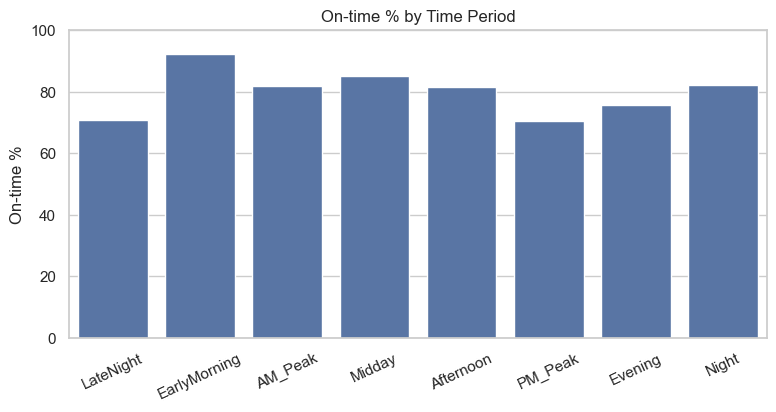

In [44]:
# Recompute aggregate with observed=True to silence the FutureWarning and keep only present categories
route_col = "ROUTE_ABBR"
adherence_col = "ADHERENCE"

# Ensure time_period is categorical and ordered (we set labels earlier)
time_periods = ["LateNight","EarlyMorning","AM_Peak","Midday","Afternoon","PM_Peak","Evening","Night"]
df['time_period'] = pd.Categorical(df['time_period'], categories=time_periods, ordered=True)

# Use adjusted counts if present
have_adjusted = all(col in df.columns for col in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"])

if have_adjusted:
    agg_tp = df.groupby('time_period', observed=True)[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
    agg_tp['total'] = agg_tp.sum(axis=1)
    agg_tp = agg_tp[agg_tp['total']>0].copy()
    agg_tp['ontime_pct'] = agg_tp['ADJUSTED_ONTIME_COUNT'] / agg_tp['total'] * 100
    agg_tp = agg_tp[['total','ADJUSTED_ONTIME_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_EARLY_COUNT','ontime_pct']]
else:
    # fallback: on-time defined by adherence between -6 and +1
    df['_ontime_flag'] = df[adherence_col].between(-6, 1, inclusive="both")
    agg_tp = df.groupby('time_period', observed=True)['_ontime_flag'].agg(['mean','count']).rename(columns={'mean':'ontime_pct','count':'total'})
    agg_tp['ontime_pct'] = agg_tp['ontime_pct'] * 100
    agg_tp = agg_tp[['total','ontime_pct']]

# Show the table
print("On-time summary by time_period:\n")
display(agg_tp)

# Simple bar plot of on-time %
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(9,4))
if 'ontime_pct' in agg_tp.columns:
    plot_df = agg_tp.reset_index().dropna(subset=['ontime_pct'])
    sns.barplot(data=plot_df, x='time_period', y='ontime_pct', order=time_periods)
    plt.title("On-time % by Time Period")
    plt.ylabel("On-time %")
    plt.xlabel("")
    plt.xticks(rotation=25)
    plt.ylim(0,100)
    plt.show()
else:
    print("No ontime_pct column found in agg_tp.")

In [45]:
# 1) Show totals so you don't over-interpret tiny groups
print("Totals by time_period:")
display(agg_tp['total'])

# 2) If want, see mean adherence per time_period as well
mean_tp = df.groupby('time_period', observed=True)[adherence_col].mean().rename('mean_adherence')
display(mean_tp)

# 3) If you want to list the worst performing hour windows:
mean_by_hour = df.groupby('hour')[adherence_col].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'})
display(mean_by_hour.sort_values('mean_adherence').head(10))  # most negative = most late

Totals by time_period:


time_period
LateNight        4131
EarlyMorning    11770
AM_Peak         61935
Midday          60067
Afternoon       60786
PM_Peak         64752
Evening         43078
Night           32342
Name: total, dtype: int64

time_period
LateNight      -3.086286
EarlyMorning   -1.236446
AM_Peak        -2.897310
Midday         -2.279805
Afternoon      -2.755482
PM_Peak        -4.702237
Evening        -3.922230
Night          -2.966254
Name: mean_adherence, dtype: float64

mean_adherence      n
hour                       
17         -4.865348  20855
16         -4.855838  21860
15         -4.395507  22037
18         -4.203048  17248
19         -4.068211  13513
8          -3.783631  20635
1          -3.618168    111
23         -3.508210   9153
20         -3.368831  12317
14         -3.255852  20590

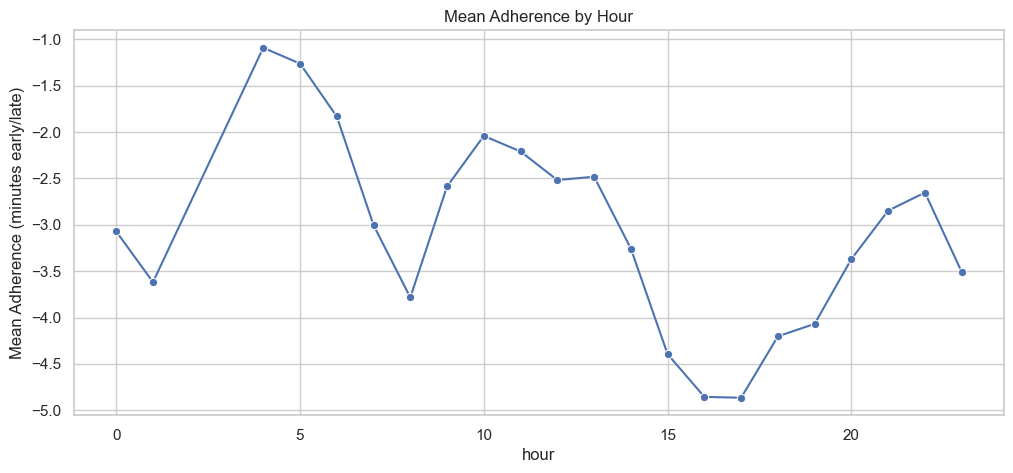

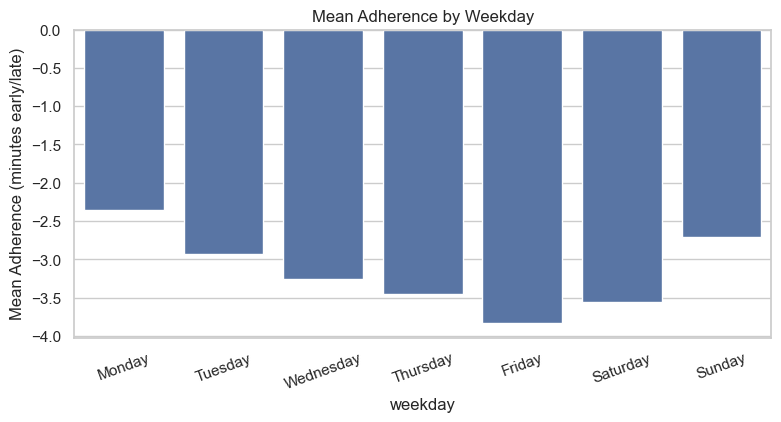

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Hourly mean adherence
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=mean_by_hour, x='hour', y='mean_adherence', marker='o')
ax.set_title("Mean Adherence by Hour")
ax.set_ylabel("Mean Adherence (minutes early/late)")
plt.show()

# Weekday mean adherence
plt.figure(figsize=(9,4))
sns.barplot(data=mean_by_wd.sort_values('weekday_num'), x='weekday', y='mean_adherence')
plt.title("Mean Adherence by Weekday")
plt.ylabel("Mean Adherence (minutes early/late)")
plt.xticks(rotation=20)
plt.show()

In [50]:
# Install scipy into the current Jupyter kernel environment, then import and run test
import sys
import subprocess

print("Installing scipy into the current environment (this may take a minute)...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"])

# Now import and run the Kruskal-Wallis section (copy the test part from the earlier big cell)
from scipy import stats
MIN_OBS = 30
groups = [group['ADHERENCE'].values for name, group in df.groupby('hour') if len(group) >= MIN_OBS]
hour_labels = [name for name, group in df.groupby('hour') if len(group) >= MIN_OBS]
if len(groups) >= 2:
    kw_stat, kw_p = stats.kruskal(*groups)
    print(f"Kruskal-Wallis across hours (hours with >={MIN_OBS} obs): H={kw_stat:.3f}, p={kw_p:.4g}")
    if kw_p < 0.05:
        print("-> Statistically significant differences in adherence across hours (p < 0.05).")
    else:
        print("-> No statistically significant difference found across hours (p >= 0.05).")
else:
    print("Not enough hour groups with >= MIN_OBS for Kruskal-Wallis test.")

Installing scipy into the current environment (this may take a minute)...
Kruskal-Wallis across hours (hours with >=30 obs): H=nan, p=nan
-> No statistically significant difference found across hours (p >= 0.05).


In [51]:
from scipy import stats
import numpy as np

MIN_OBS = 30   # same threshold you used before
valid_groups = []
valid_hours = []

print("Checking hour groups for size and variability...\n")
for hour, g in df.groupby('hour'):
    vals = g['ADHERENCE'].dropna().values      # drop NaNs
    n = vals.size
    unique_count = np.unique(vals).size
    if n >= MIN_OBS and unique_count > 1:
        valid_groups.append(vals)
        valid_hours.append(hour)
        print(f"Hour {hour}: n={n}, unique={unique_count} -> included")
    else:
        print(f"Hour {hour}: n={n}, unique={unique_count} -> SKIPPED")

print("\nNumber of valid hour groups:", len(valid_groups))

if len(valid_groups) >= 2:
    kw_stat, kw_p = stats.kruskal(*valid_groups)
    print(f"\nKruskal-Wallis (hours with >= {MIN_OBS} obs and >1 unique value): H={kw_stat:.3f}, p={kw_p:.4g}")
    if np.isfinite(kw_stat) and (kw_p < 0.05):
        print("-> Statistically significant differences across hours (p < 0.05).")
    elif np.isfinite(kw_stat):
        print("-> No statistically significant difference found across hours (p >= 0.05).")
    else:
        print("-> Test returned non-finite result (NaN) even after filtering — see groups above.")
else:
    print("\nNot enough valid groups to run Kruskal-Wallis. Consider lowering MIN_OBS or reporting descriptive stats instead.")

Checking hour groups for size and variability...

Hour 0: n=4020, unique=1204 -> included
Hour 1: n=111, unique=108 -> included
Hour 4: n=1690, unique=413 -> included
Hour 5: n=10080, unique=1115 -> included
Hour 6: n=19339, unique=1382 -> included
Hour 7: n=21961, unique=1669 -> included
Hour 8: n=20635, unique=1776 -> included
Hour 9: n=20191, unique=1576 -> included
Hour 10: n=19953, unique=1498 -> included
Hour 11: n=19923, unique=1459 -> included
Hour 12: n=20170, unique=1555 -> included
Hour 13: n=20026, unique=1531 -> included
Hour 14: n=20590, unique=1751 -> included
Hour 15: n=22037, unique=2071 -> included
Hour 16: n=21860, unique=2269 -> included
Hour 17: n=20855, unique=2271 -> included
Hour 18: n=17248, unique=1904 -> included
Hour 19: n=13513, unique=1631 -> included
Hour 20: n=12317, unique=1446 -> included
Hour 21: n=11943, unique=1357 -> included
Hour 22: n=11246, unique=1389 -> included
Hour 23: n=9153, unique=1616 -> included

Number of valid hour groups: 22

Kruskal

In [52]:
# compute effect size for Kruskal result
H = 10451.52   # your Kruskal H
k = 22         # number of hour groups included
N = 338861     # total observations used (sum of n across included hours)

epsilon2 = (H - k + 1) / (N - k)
print(f"Epsilon-squared (effect size) = {epsilon2:.4f} (~{epsilon2*100:.1f}% of variance)")

Epsilon-squared (effect size) = 0.0308 (~3.1% of variance)


In [53]:
# install scikit-posthocs (run once)
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-posthocs"])

# run Dunn post-hoc
import scikit_posthocs as sp
data = df[['hour','ADHERENCE']].dropna()
# only include hours with enough obs (same filter you used for KW)
counts = data['hour'].value_counts()
valid_hours = counts[counts >= 30].index
data = data[data['hour'].isin(valid_hours)]

# Dunn test
posthoc = sp.posthoc_dunn(data, val_col='ADHERENCE', group_col='hour', p_adjust='bonferroni')
# Optional: show only significant pairs (p < 0.05)
sig_pairs = (posthoc.stack().reset_index()
             .rename(columns={'level_0':'hour1','level_1':'hour2',0:'pval'}))
sig_pairs = sig_pairs[sig_pairs['pval'] < 0.05]
display(posthoc)   # full matrix
display(sig_pairs.sort_values('pval').head(20))   # top significant pairs

0         1              4              5              6   \
0   1.000000e+00  1.000000   4.623440e-43   1.463670e-49   1.003870e-13   
1   1.000000e+00  1.000000   5.513777e-04   1.035060e-01   1.000000e+00   
4   4.623440e-43  0.000551   1.000000e+00   2.979156e-04   6.057232e-24   
5   1.463670e-49  0.103506   2.979156e-04   1.000000e+00   1.649086e-28   
6   1.003870e-13  1.000000   6.057232e-24   1.649086e-28   1.000000e+00   
7   7.477064e-15  1.000000  1.062561e-104  2.783637e-274  4.004363e-182   
8   1.964863e-52  1.000000  3.309661e-156   0.000000e+00   0.000000e+00   
9   1.000000e+00  1.000000   2.715026e-64  1.043284e-139   6.547841e-60   
10  1.803189e-06  1.000000   4.002154e-32   2.366311e-48   1.071026e-02   
11  1.000000e+00  1.000000   1.419558e-48   7.138612e-93   7.771876e-26   
12  1.000000e+00  1.000000   2.919586e-69  6.122809e-155   2.545320e-72   
13  1.000000e+00  1.000000   4.833700e-68  6.274574e-151   4.646260e-69   
14  7.047216e-21  1.000000  1.974633e-114  5.335707e-303  6.077521e-211   
15  4.173246e-68  1.000000  6.815619e-174   0.000000e+00   0.000000e+00   
16  3.567124e-93  0.326382  8.281227e-200   0.000000e+00   0.000000e+00   
17  9.680773e-87  0.487389  2.384068e-193   0.000000e+00   0.000000e+00   
18  7.526887e-67  1.000000  3.087625e-172   0.000000e+00   0.000000e+00   
19  1.390549e-78  0.538245  1.389272e-184   0.000000e+00   0.000000e+00   
20  1.465614e-38  1.000000  1.215465e-137   0.000000e+00  3.235955e-241   
21  4.377201e-07  1.000000   1.463990e-86  1.197442e-182  2.436911e-100   
22  1.000000e+00  1.000000   2.971904e-59  4.378921e-107   1.356023e-40   
23  3.981154e-02  1.000000   1.936205e-71  2.577092e-130   2.650519e-60   

               7              8              9              10             11  \
0    7.477064e-15   1.964863e-52   1.000000e+00   1.803189e-06   1.000000e+00   
1    1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
4   1.062561e-104  3.309661e-156   2.715026e-64   4.002154e-32   1.419558e-48   
5   2.783637e-274   0.000000e+00  1.043284e-139   2.366311e-48   7.138612e-93   
6   4.004363e-182   0.000000e+00   6.547841e-60   1.071026e-02   7.771876e-26   
7    1.000000e+00   4.176613e-35   2.134204e-31  1.279966e-135   8.885097e-69   
8    4.176613e-35   1.000000e+00  9.578246e-130  2.913042e-299  4.429188e-196   
9    2.134204e-31  9.578246e-130   1.000000e+00   2.034850e-34   3.734305e-06   
10  1.279966e-135  2.913042e-299   2.034850e-34   1.000000e+00   6.146047e-10   
11   8.885097e-69  4.429188e-196   3.734305e-06   6.146047e-10   1.000000e+00   
12   4.605470e-23  1.334015e-112   1.000000e+00   4.180664e-44   6.933008e-11   
13   8.350630e-25  4.551106e-116   1.000000e+00   1.411105e-41   1.232085e-09   
14   1.000000e+00   9.490358e-21   6.748314e-46  1.526462e-161   1.388272e-88   
15   1.515139e-60   5.492626e-02  2.254793e-176   0.000000e+00  1.232440e-253   
16  7.169929e-106   6.440577e-17  4.776087e-247   0.000000e+00   0.000000e+00   
17   1.112808e-92   2.358365e-12  2.420537e-225   0.000000e+00   0.000000e+00   
18   1.491886e-55   3.357217e-02  9.978023e-160   0.000000e+00  6.482106e-229   
19   1.244497e-70   6.933684e-09  4.552027e-175   0.000000e+00  5.019642e-242   
20   4.592348e-16   1.000000e+00   9.954746e-78  1.188469e-194  4.311098e-123   
21   4.500798e-01   2.913670e-41   1.635941e-10   8.382070e-71   5.422626e-31   
22   8.283657e-24   5.197565e-96   1.000000e+00   1.162679e-22   2.618419e-03   
23   7.370362e-07   1.798470e-53   9.804909e-02   2.236322e-39   3.267372e-13   

    ...             14             15             16             17  \
0   ...   7.047216e-21   4.173246e-68   3.567124e-93   9.680773e-87   
1   ...   1.000000e+00   1.000000e+00   3.263825e-01   4.873886e-01   
4   ...  1.974633e-114  6.815619e-174  8.281227e-200  2.384068e-193   
5   ...  5.335707e-303   0.000000e+00   0.000000e+00   0.000000e+00   
6   ...  6.077521e-211   0.000000e+00   0.000000e+00   0.000000e+00  

hour1  hour2  pval
72       5      8   0.0
94       6      8   0.0
83       5     19   0.0
103      6     17   0.0
378     19      6   0.0
105      6     19   0.0
102      6     16   0.0
101      6     15   0.0
104      6     18   0.0
81       5     17   0.0
80       5     16   0.0
84       5     20   0.0
82       5     18   0.0
79       5     15   0.0
399     20      5   0.0
355     18      5   0.0
339     17     11   0.0
338     17     10   0.0
191     10     17   0.0
192     10     18   0.0

In [54]:
# show top/worst hours by mean adherence
mean_by_hour = df.groupby('hour')['ADHERENCE'].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'})
print("Worst (most negative mean adherence):")
display(mean_by_hour.sort_values('mean_adherence').head(5))
print("Best (most positive / closest to on-time):")
display(mean_by_hour.sort_values('mean_adherence', ascending=False).head(5))

Worst (most negative mean adherence):


mean_adherence      n
hour                       
17         -4.865348  20855
16         -4.855838  21860
15         -4.395507  22037
18         -4.203048  17248
19         -4.068211  13513

Best (most positive / closest to on-time):


mean_adherence      n
hour                       
4          -1.089960   1690
5          -1.261005  10080
6          -1.831436  19339
10         -2.040670  19953
11         -2.209074  19923

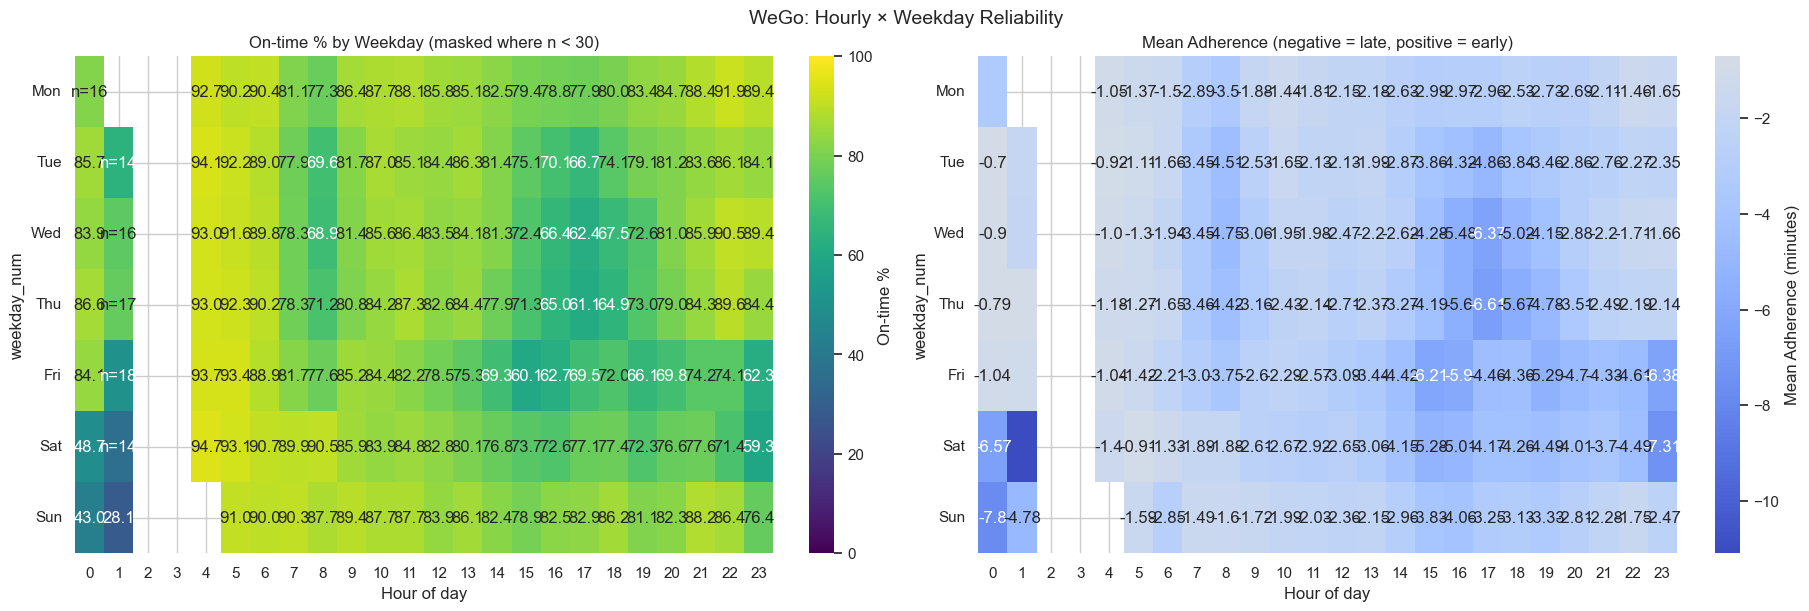

Saved figure to wego_heatmaps_hour_weekday.png


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Settings
MIN_OBS = 30                     # cells with fewer than MIN_OBS will be masked
hour_col = 'hour'
wd_col = 'weekday_num'           # 0=Mon .. 6=Sun
adherence_col = 'ADHERENCE'
time_period_col = 'time_period'

# Ensure weekday rows order
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_idx = [0,1,2,3,4,5,6]

# 1) Build on-time % pivot (use adjusted counts if present)
have_adjusted = all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"])
if have_adjusted:
    num = df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    denom = (
        df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    ontime_pct = (num / denom.replace(0, np.nan)) * 100
else:
    # fallback: percent of records in [-6, +1] adherence
    df['_ontime_flag'] = df[adherence_col].between(-6, 1, inclusive="both")
    ontime_pct = df.pivot_table(index=wd_col, columns=hour_col, values='_ontime_flag', aggfunc='mean') * 100

# 2) Build mean adherence pivot
mean_ad = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='mean')

# 3) Compute counts per cell to mask low-sample cells
count_cells = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='count', fill_value=0)

# 4) Reindex rows to Mon..Sun and columns 0..23 to guarantee consistent layout
hours = list(range(0,24))
ontime_pct = ontime_pct.reindex(index=weekday_idx, columns=hours)
mean_ad = mean_ad.reindex(index=weekday_idx, columns=hours)
count_cells = count_cells.reindex(index=weekday_idx, columns=hours).fillna(0)

# 5) Mask cells with count < MIN_OBS
mask = count_cells < MIN_OBS

# Optional: create an annotation matrix with on-time % rounded, or show counts where masked
annot_ontime = ontime_pct.round(1).fillna(np.nan).astype(object)
# put "n=XX" for cells that are masked (low sample)
for r in annot_ontime.index:
    for c in annot_ontime.columns:
        if mask.loc[r, c]:
            annot_ontime.loc[r, c] = f"n={int(count_cells.loc[r,c])}" if count_cells.loc[r,c]>0 else ""

# 6) Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

# On-time % heatmap
ax = axes[0]
cmap = "viridis"   # change if you prefer
sns.heatmap(ontime_pct, ax=ax, cmap=cmap, annot=annot_ontime, fmt='', 
            cbar_kws={'label':'On-time %'}, vmin=0, vmax=100, mask=ontime_pct.isna())
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0)
ax.set_xlabel("Hour of day")
ax.set_title("On-time % by Weekday (masked where n < {})".format(MIN_OBS))

# Mean adherence heatmap (minutes early/late)
ax2 = axes[1]
# create simple annotation of mean_ad rounded; show blank where masked
annot_mean = mean_ad.round(2).astype(object)
for r in annot_mean.index:
    for c in annot_mean.columns:
        if mask.loc[r, c] or np.isnan(mean_ad.loc[r,c]):
            annot_mean.loc[r,c] = ""
sns.heatmap(mean_ad, ax=ax2, cmap="coolwarm", center=0, annot=annot_mean, fmt='',
            cbar_kws={'label':'Mean Adherence (minutes)'}, mask=mean_ad.isna())
ax2.set_yticks(np.arange(0.5,7.5))
ax2.set_yticklabels(weekday_labels, rotation=0)
ax2.set_xlabel("Hour of day")
ax2.set_title("Mean Adherence (negative = late, positive = early)")

# Save figure
plt.suptitle("WeGo: Hourly × Weekday Reliability", fontsize=14)
plt.savefig("wego_heatmaps_hour_weekday.png", dpi=200)
plt.show()

print("Saved figure to wego_heatmaps_hour_weekday.png")


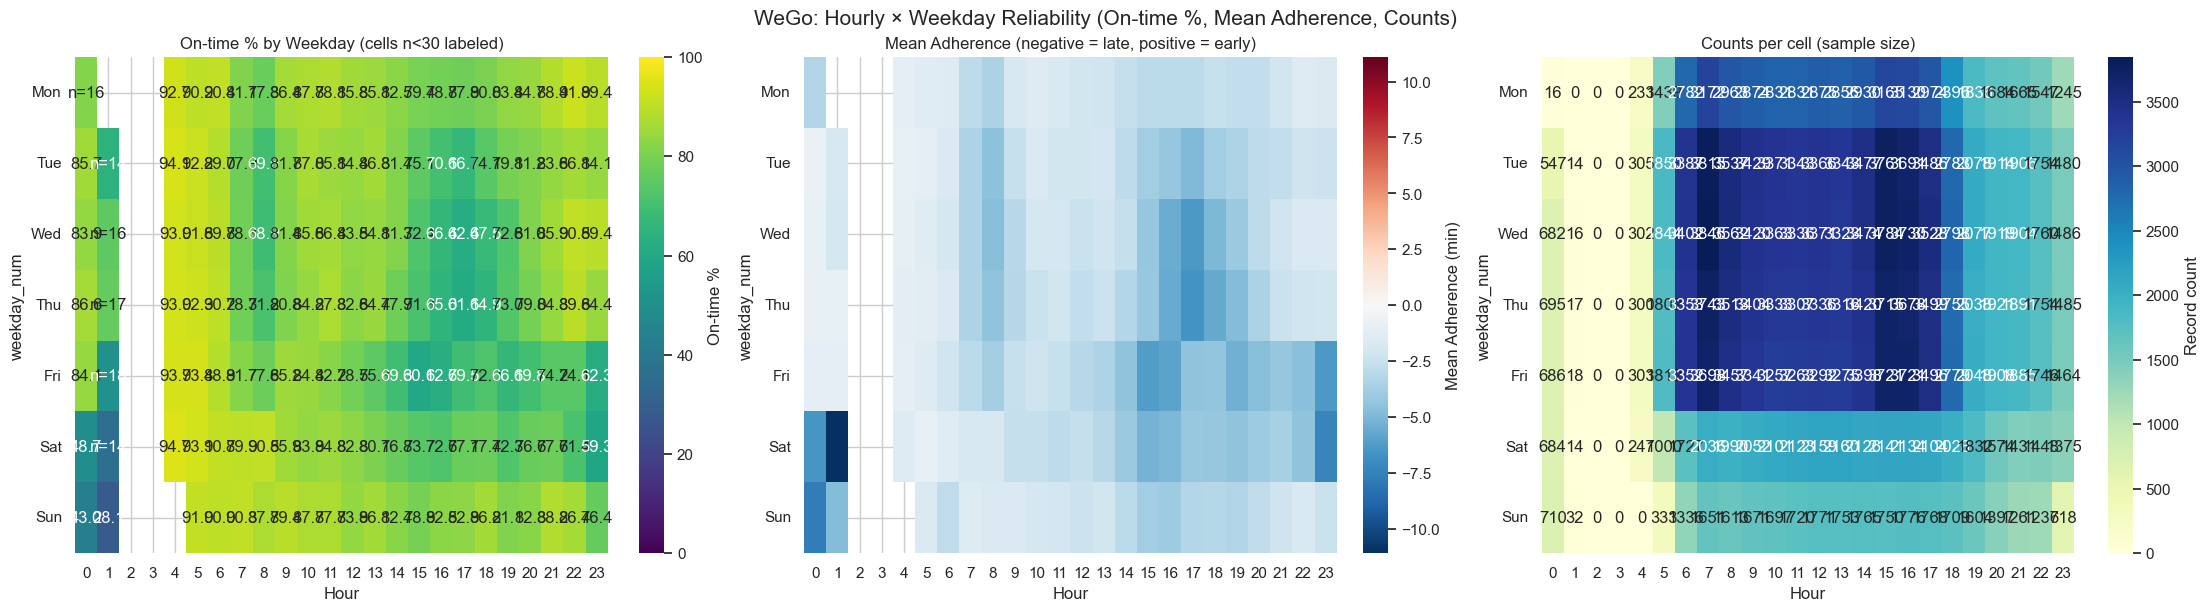

Saved figure to wego_heatmaps_hour_weekday_with_counts.png


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Settings
MIN_OBS = 30
hour_col = 'hour'
wd_col = 'weekday_num'
adherence_col = 'ADHERENCE'

weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_idx = [0,1,2,3,4,5,6]
hours = list(range(0,24))

# Build on-time % pivot (use adjusted counts if present)
have_adjusted = all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"])
if have_adjusted:
    num = df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    denom = (
        df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    # avoid division by zero
    ontime_pct = (num / denom.replace(0, np.nan)) * 100
else:
    df['_ontime_flag'] = df[adherence_col].between(-6, 1, inclusive="both")
    ontime_pct = df.pivot_table(index=wd_col, columns=hour_col, values='_ontime_flag', aggfunc='mean') * 100

# Mean adherence pivot
mean_ad = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='mean')

# Counts pivot
count_cells = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='count', fill_value=0)

# Reindex to ensure Mon..Sun and hours 0..23
ontime_pct = ontime_pct.reindex(index=weekday_idx, columns=hours)
mean_ad = mean_ad.reindex(index=weekday_idx, columns=hours)
count_cells = count_cells.reindex(index=weekday_idx, columns=hours).fillna(0)

# Mask low-sample cells
mask_low = count_cells < MIN_OBS

# Annotation for on-time: show rounded pct, but 'n=XX' for masked cells
annot_ontime = ontime_pct.round(1).astype(object).where(~ontime_pct.isna(), other="")
for r in annot_ontime.index:
    for c in annot_ontime.columns:
        if mask_low.loc[r, c]:
            annot_ontime.loc[r, c] = f"n={int(count_cells.loc[r,c])}" if count_cells.loc[r,c] > 0 else ""

# Annotation for counts
annot_counts = count_cells.astype(int)

# For mean_ad, compute symmetric vmin/vmax around 0 for good diverging color scaling
max_abs = np.nanmax(np.abs(mean_ad.values))
if np.isfinite(max_abs):
    vmin = -max_abs
    vmax = max_abs
else:
    vmin, vmax = -5, 5  # fallback

# Plot 3 panels
fig, axes = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)

# Panel 1: On-time %
ax = axes[0]
sns.heatmap(ontime_pct, ax=ax, cmap="viridis", annot=annot_ontime, fmt='', 
            cbar_kws={'label':'On-time %'}, vmin=0, vmax=100, mask=ontime_pct.isna())
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0)
ax.set_xlabel("Hour")
ax.set_title(f"On-time % by Weekday (cells n<{MIN_OBS} labeled)")

# Panel 2: Mean adherence (diverging)
ax2 = axes[1]
sns.heatmap(mean_ad, ax=ax2, cmap="RdBu_r", center=0, annot=False,
            cbar_kws={'label':'Mean Adherence (min)'}, vmin=vmin, vmax=vmax, mask=mean_ad.isna())
ax2.set_yticks(np.arange(0.5,7.5))
ax2.set_yticklabels(weekday_labels, rotation=0)
ax2.set_xlabel("Hour")
ax2.set_title("Mean Adherence (negative = late, positive = early)")

# Panel 3: Counts
ax3 = axes[2]
sns.heatmap(count_cells, ax=ax3, cmap="YlGnBu", annot=annot_counts, fmt='d',
            cbar_kws={'label':'Record count'}, mask=count_cells.isna())
ax3.set_yticks(np.arange(0.5,7.5))
ax3.set_yticklabels(weekday_labels, rotation=0)
ax3.set_xlabel("Hour")
ax3.set_title("Counts per cell (sample size)")

plt.suptitle("WeGo: Hourly × Weekday Reliability (On-time %, Mean Adherence, Counts)", fontsize=15)
plt.savefig("wego_heatmaps_hour_weekday_with_counts.png", dpi=200)
plt.show()

print("Saved figure to wego_heatmaps_hour_weekday_with_counts.png")


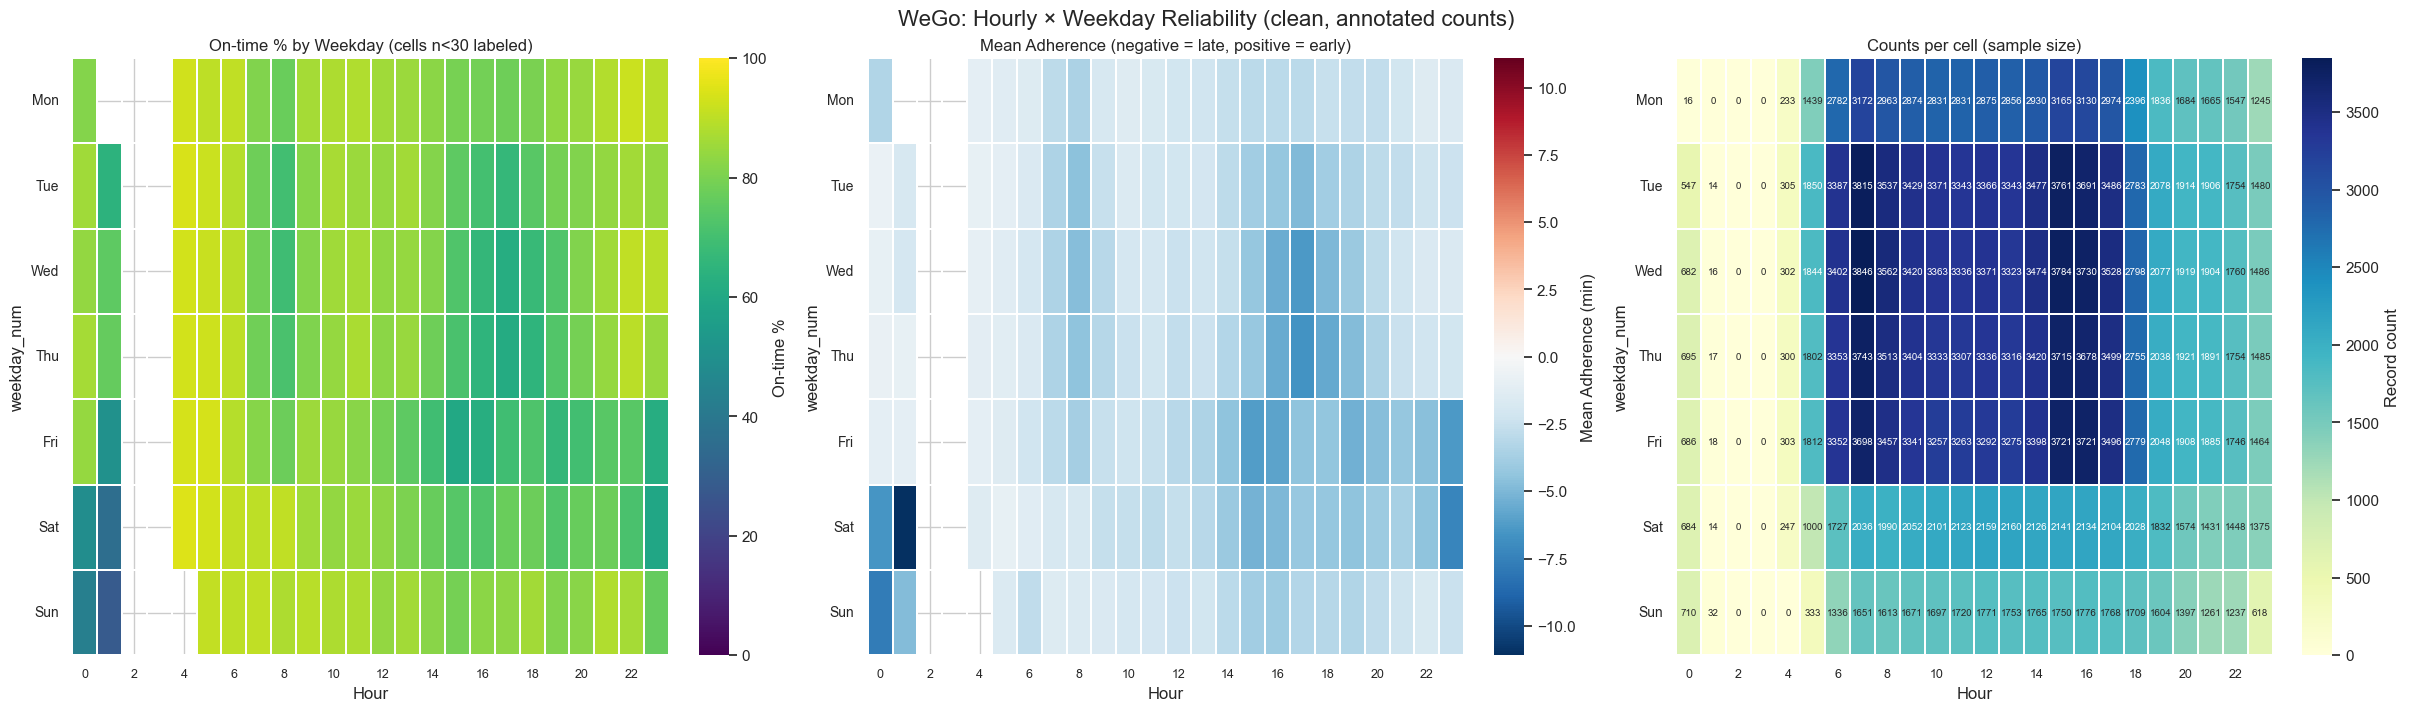

Saved figure as wego_heatmaps_clean_counts.png (300 dpi).


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

MIN_OBS = 30
hour_col = 'hour'
wd_col = 'weekday_num'
adherence_col = 'ADHERENCE'

weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_idx = [0,1,2,3,4,5,6]
hours = list(range(0,24))

# Build pivots (reuse variables from earlier cells)
have_adjusted = all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"])
if have_adjusted:
    num = df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    denom = (
        df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    ontime_pct = (num / denom.replace(0, np.nan)) * 100
else:
    df['_ontime_flag'] = df[adherence_col].between(-6, 1, inclusive="both")
    ontime_pct = df.pivot_table(index=wd_col, columns=hour_col, values='_ontime_flag', aggfunc='mean') * 100

mean_ad = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='mean')
count_cells = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='count', fill_value=0)

# Reindex
ontime_pct = ontime_pct.reindex(index=weekday_idx, columns=hours)
mean_ad = mean_ad.reindex(index=weekday_idx, columns=hours)
count_cells = count_cells.reindex(index=weekday_idx, columns=hours).fillna(0)

# Mask small-sample cells
mask_low = count_cells < MIN_OBS

# Prepare annotations
# - ontime: NO annotation (cleaner)
# - mean_ad: NO annotation (use diverging color only)
# - counts: annotate full counts with small font
annot_counts = count_cells.astype(int)

# Compute vmin/vmax for mean_ad
max_abs = np.nanmax(np.abs(mean_ad.values))
vmin, vmax = (-max_abs, max_abs) if np.isfinite(max_abs) else (-5,5)

# Plot bigger, save at high DPI
fig, axes = plt.subplots(1, 3, figsize=(24, 7), constrained_layout=True)

# Panel 1: On-time % (no numeric annotation)
ax = axes[0]
sns.heatmap(ontime_pct, ax=ax, cmap="viridis", annot=False, cbar_kws={'label':'On-time %'}, vmin=0, vmax=100,
            mask=ontime_pct.isna(), linewidths=0.3, linecolor='white')
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax.set_xticks(np.arange(0.5,24.5,2))             # tick positions every 2 hours
ax.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax.set_xlabel("Hour")
ax.set_title(f"On-time % by Weekday (cells n<{MIN_OBS} labeled)")

# Panel 2: Mean adherence (diverging colormap, no annotations)
ax2 = axes[1]
sns.heatmap(mean_ad, ax=ax2, cmap="RdBu_r", center=0, annot=False, cbar_kws={'label':'Mean Adherence (min)'},
            vmin=vmin, vmax=vmax, mask=mean_ad.isna(), linewidths=0.3, linecolor='white')
ax2.set_yticks(np.arange(0.5,7.5))
ax2.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax2.set_xticks(np.arange(0.5,24.5,2))
ax2.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax2.set_xlabel("Hour")
ax2.set_title("Mean Adherence (negative = late, positive = early)")

# Panel 3: Counts (annotated with small font)
ax3 = axes[2]
sns.heatmap(count_cells, ax=ax3, cmap="YlGnBu", annot=annot_counts, fmt='d', annot_kws={'fontsize':7},
            cbar_kws={'label':'Record count'}, mask=count_cells.isna(), linewidths=0.3, linecolor='white')
ax3.set_yticks(np.arange(0.5,7.5))
ax3.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax3.set_xticks(np.arange(0.5,24.5,2))
ax3.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax3.set_xlabel("Hour")
ax3.set_title("Counts per cell (sample size)")

plt.suptitle("WeGo: Hourly × Weekday Reliability (clean, annotated counts)", fontsize=16)
plt.savefig("wego_heatmaps_clean_counts.png", dpi=300, bbox_inches='tight')
plt.show()

print("Saved figure as wego_heatmaps_clean_counts.png (300 dpi).")


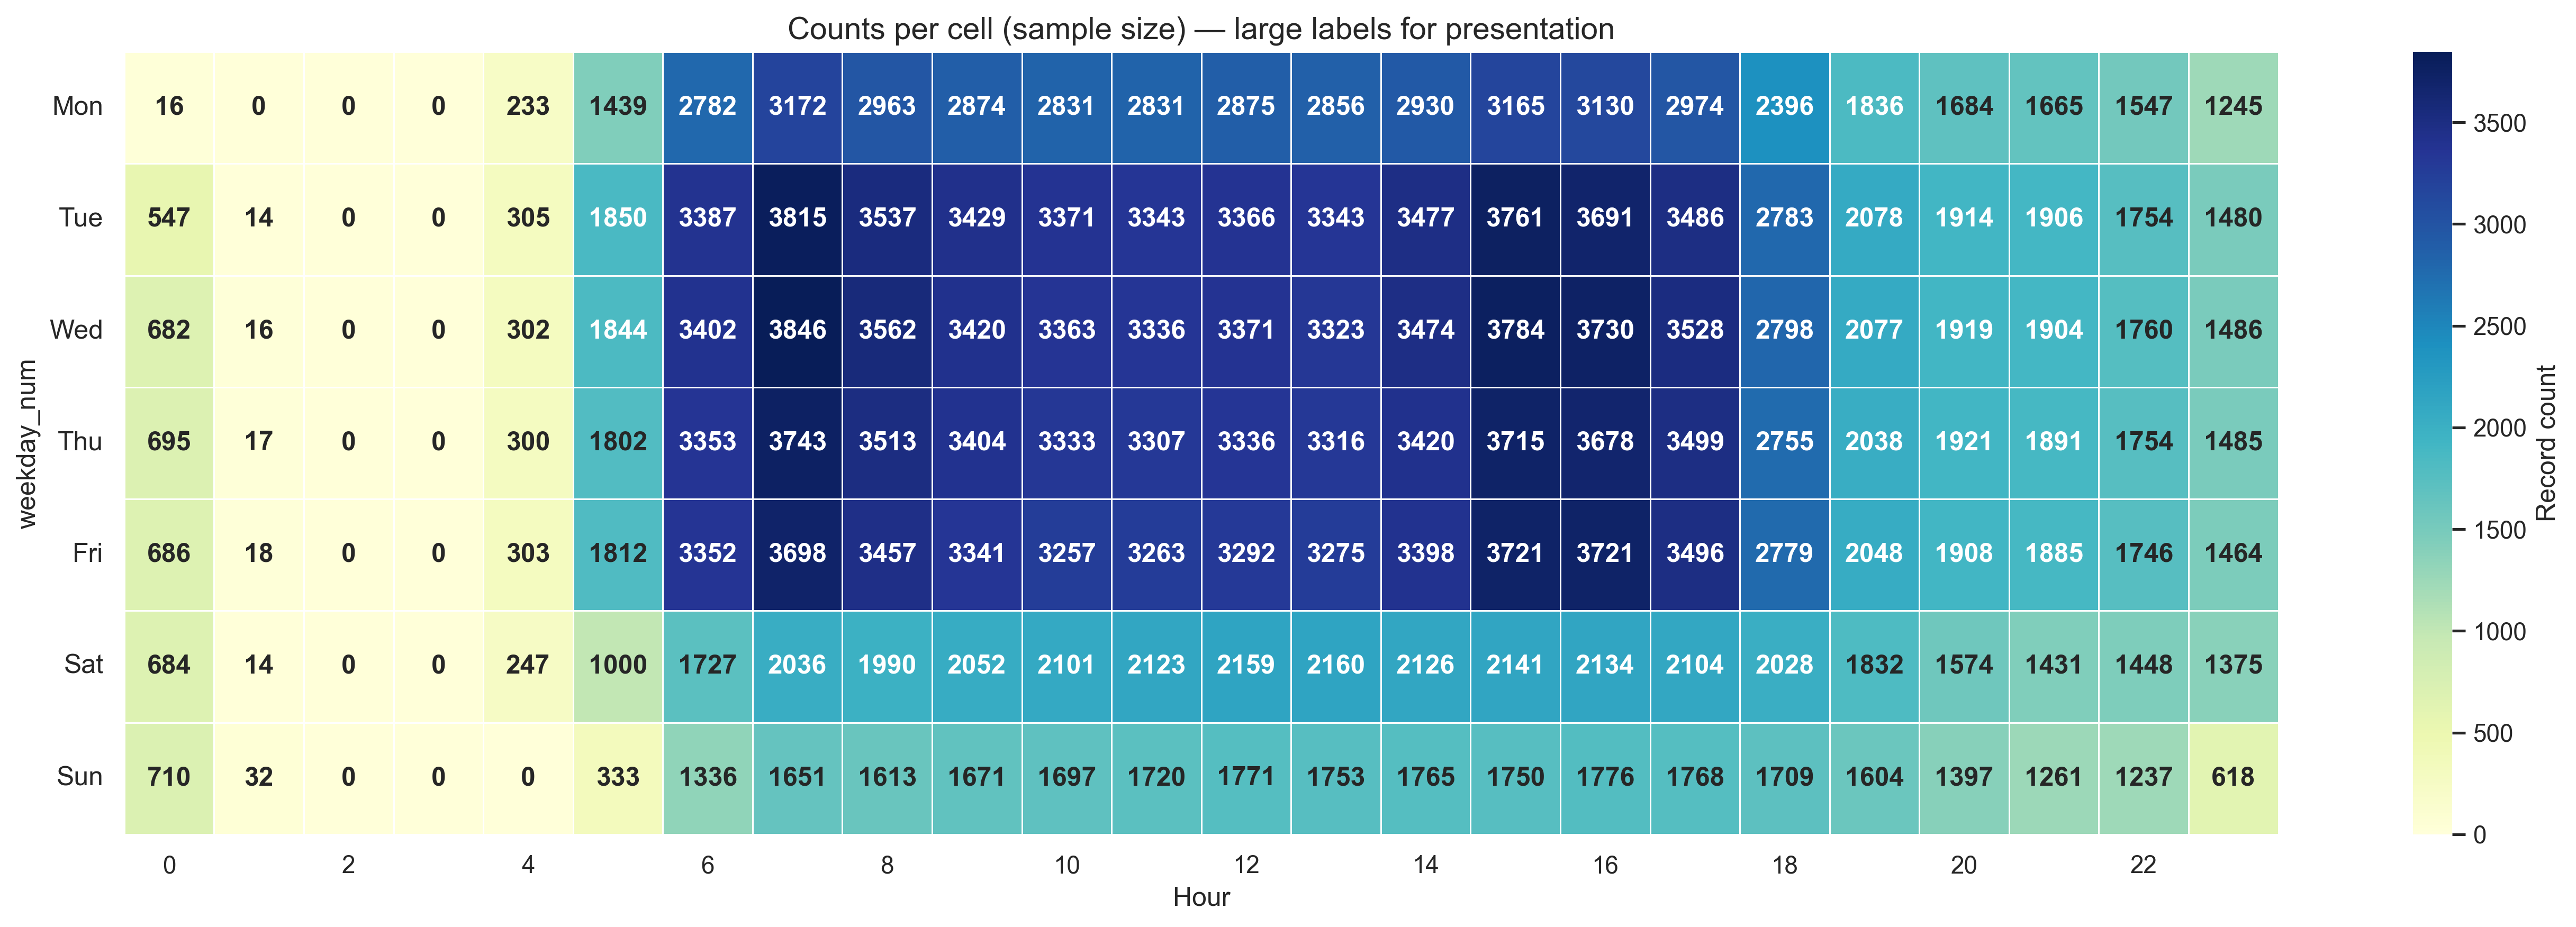

Saved: wego_counts_big.png


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Use the same count_cells pivot you already created
# If not present, rebuild quickly:
# count_cells = df.pivot_table(index='weekday_num', columns='hour', values='ADHERENCE', aggfunc='count', fill_value=0)

# Reindex/ensure order
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
hours = list(range(0,24))
count_plot = count_cells.reindex(index=[0,1,2,3,4,5,6], columns=hours).fillna(0).astype(int)

# Plot big figure with large annotation font
plt.figure(figsize=(18,6), dpi=300)   # big and high-res
ax = sns.heatmap(
    count_plot,
    cmap="YlGnBu",
    annot=count_plot,
    fmt='d',
    annot_kws={'fontsize':12, 'fontweight':'bold'},  # bigger, bold numbers
    cbar_kws={'label':'Record count'},
    linewidths=0.3,
    linecolor='white'
)
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour", fontsize=12)
ax.set_title("Counts per cell (sample size) — large labels for presentation", fontsize=14)

plt.tight_layout()
out_path = "wego_counts_big.png"
plt.savefig(out_path, bbox_inches='tight')
plt.show()
print("Saved:", out_path)


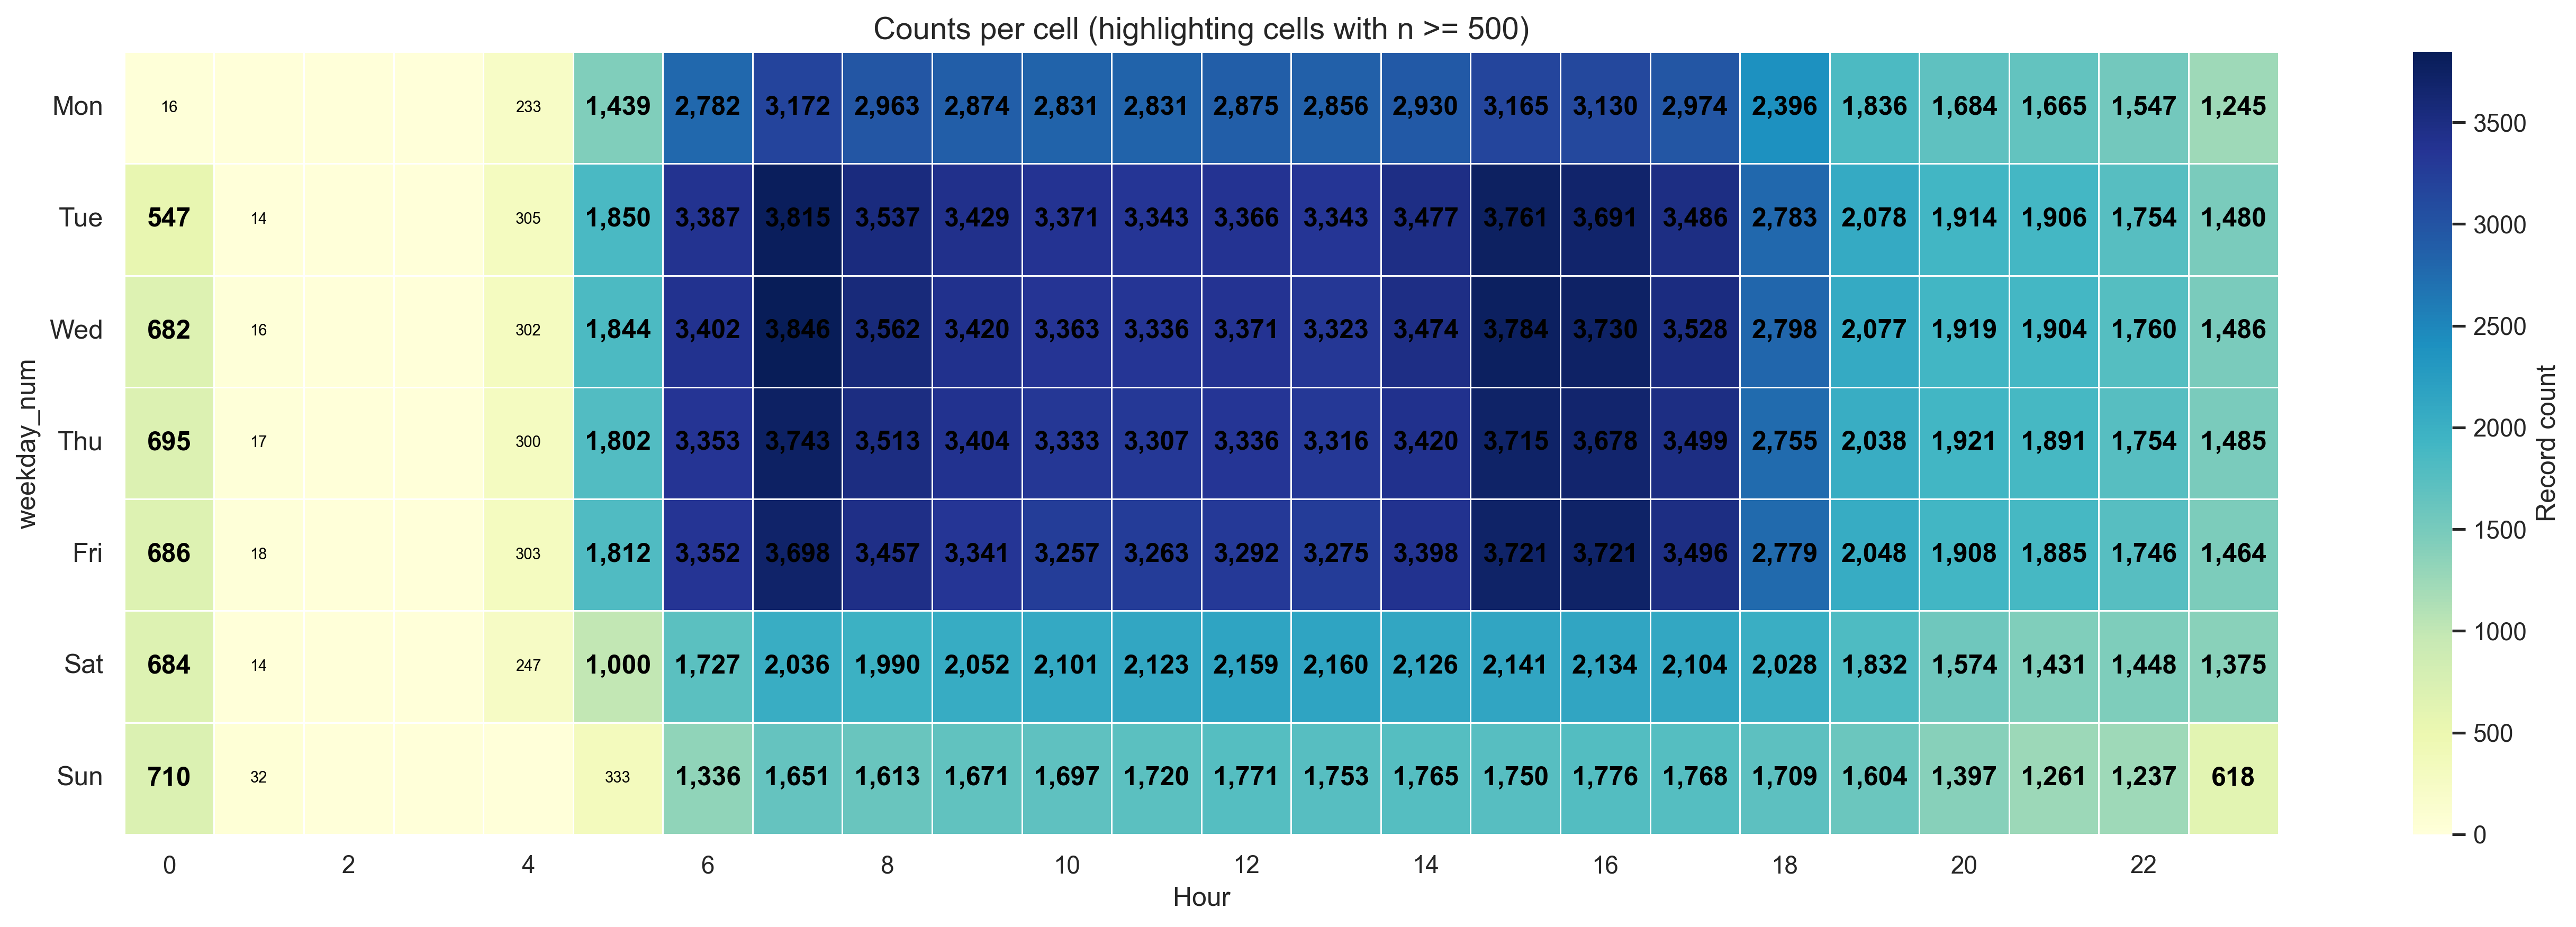

Saved: wego_counts_highlight.png


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

count_plot = count_cells.reindex(index=[0,1,2,3,4,5,6], columns=list(range(24))).fillna(0).astype(int)

# Threshold to emphasize (cells >= this get big font)
THRESH = 500

plt.figure(figsize=(18,6), dpi=300)
ax = sns.heatmap(count_plot, cmap="YlGnBu", cbar_kws={'label':'Record count'}, linewidths=0.3, linecolor='white')

# Annotate only high-count cells with big bold text; smaller text for others could be omitted or shown
for (i, j), val in np.ndenumerate(count_plot.values):
    if val >= THRESH:
        ax.text(j + 0.5, i + 0.5, f"{val:,}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')
    elif val > 0:
        # optional small annotation for small cells — comment out if too cluttered
        ax.text(j + 0.5, i + 0.5, f"{val}", ha='center', va='center', color='black', fontsize=7)

ax.set_yticks(np.arange(0.5,7.5)); ax.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2)); ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour", fontsize=12)
ax.set_title(f"Counts per cell (highlighting cells with n >= {THRESH})", fontsize=14)

plt.tight_layout()
out_path = "wego_counts_highlight.png"
plt.savefig(out_path, bbox_inches='tight')
plt.show()
print("Saved:", out_path)


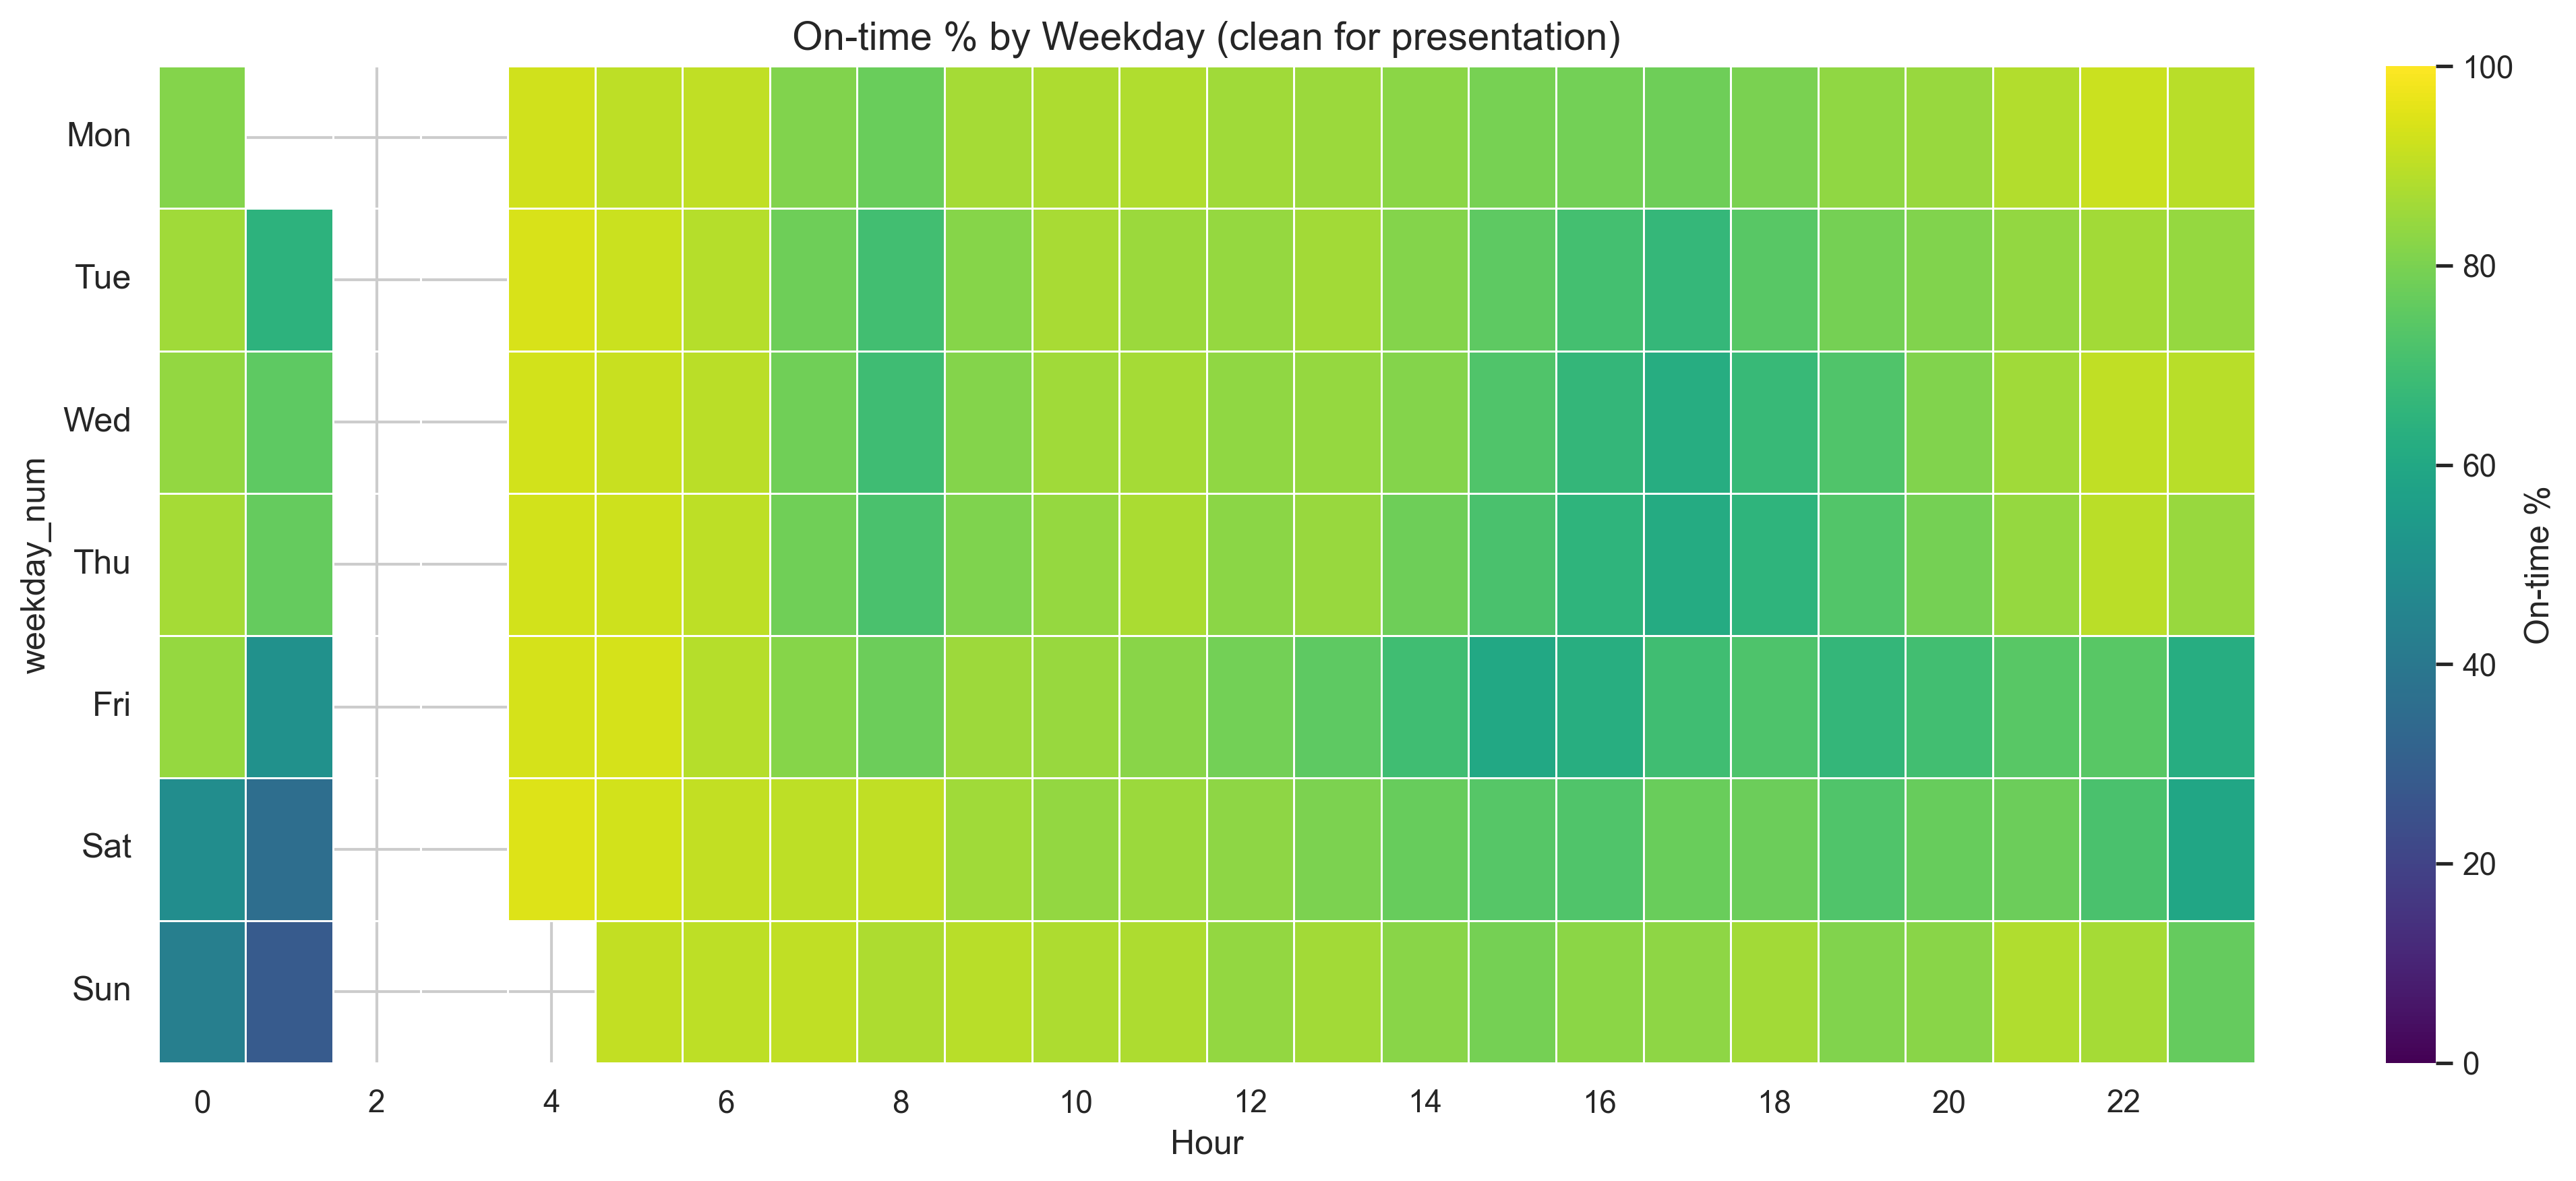

Saved: wego_ontime_pct_big.png


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Settings
MIN_OBS = 30    # cells below this considered low-sample (optional for masking)
THRESH = 500    # for the annotated variant below (not used here)
hour_col = 'hour'
wd_col = 'weekday_num'

# Build ontime_pct (reuse existing pivot if present)
have_adjusted = all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"])
if have_adjusted:
    num = df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    denom = (
        df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    ontime_pct = (num / denom.replace(0, np.nan)) * 100
else:
    df['_ontime_flag'] = df['ADHERENCE'].between(-6, 1, inclusive="both")
    ontime_pct = df.pivot_table(index=wd_col, columns=hour_col, values='_ontime_flag', aggfunc='mean') * 100

# Reindex
hours = list(range(24))
ontime_pct = ontime_pct.reindex(index=[0,1,2,3,4,5,6], columns=hours)

# Plot big, clean heatmap
plt.figure(figsize=(14,6), dpi=300)
ax = sns.heatmap(ontime_pct, cmap="viridis", vmin=0, vmax=100, cbar_kws={'label':'On-time %'}, 
                 linewidths=0.25, linecolor='white', mask=ontime_pct.isna())
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour", fontsize=12)
ax.set_title("On-time % by Weekday (clean for presentation)", fontsize=14)
plt.tight_layout()
out = "wego_ontime_pct_big.png"
plt.savefig(out, bbox_inches='tight')
plt.show()
print("Saved:", out)


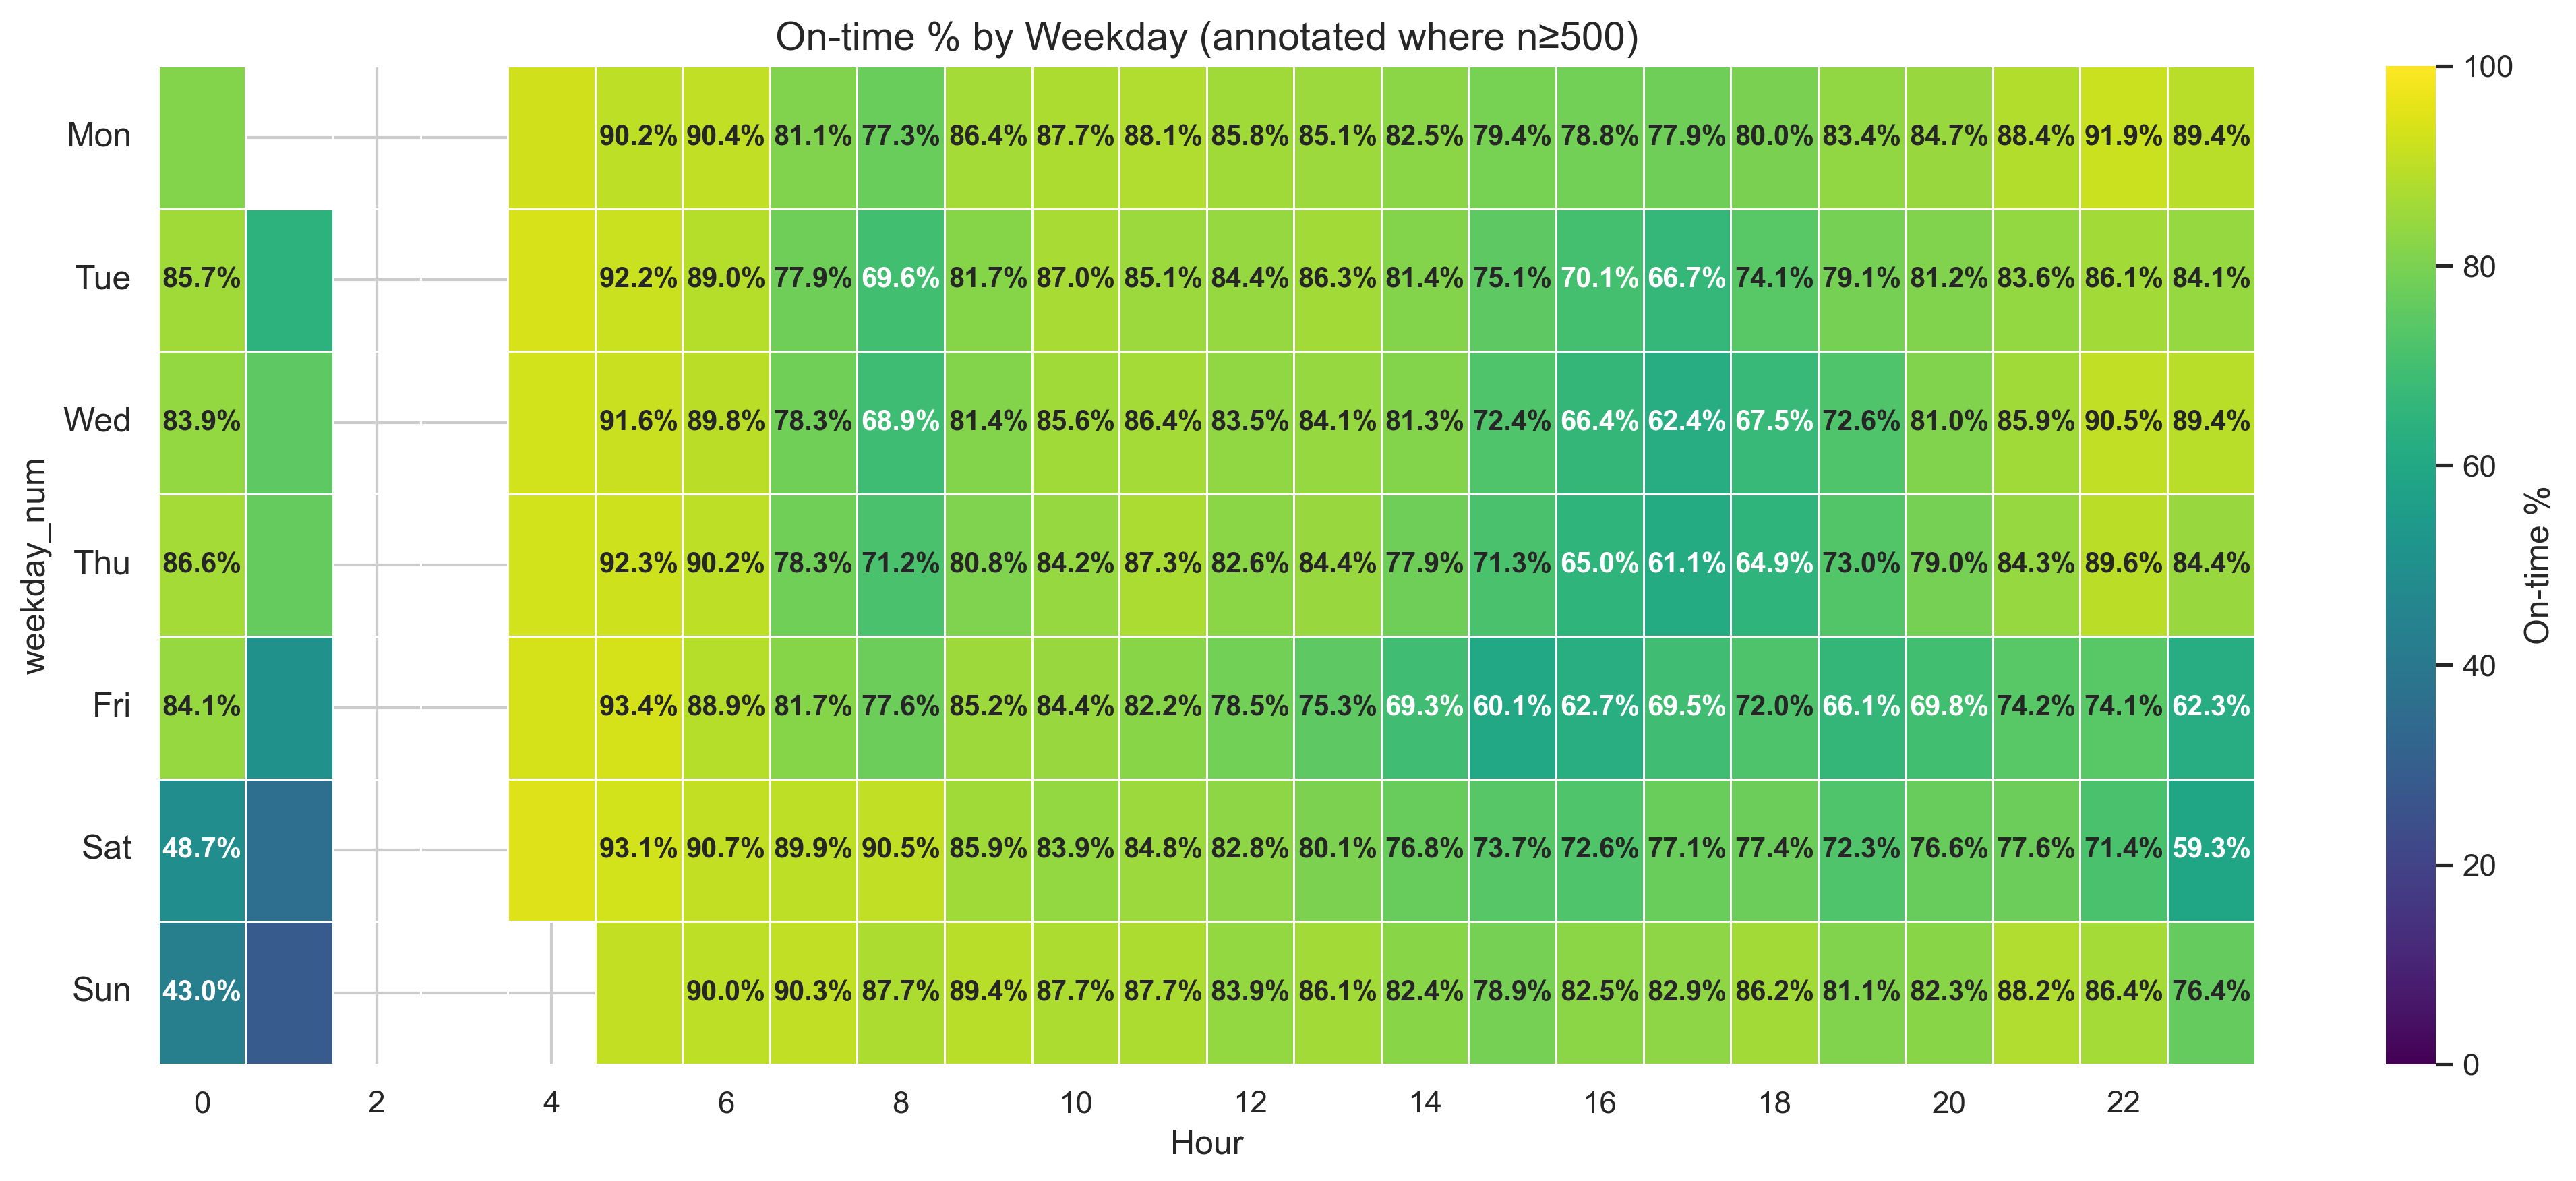

Saved: wego_ontime_pct_annotated_big.png


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

MIN_ANNOT = 500   # annotate only cells with count >= this
hour_col = 'hour'
wd_col = 'weekday_num'

# prepare pivot and counts
if all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    num = df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    denom = (
        df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    ontime_pct = (num / denom.replace(0, np.nan)) * 100
else:
    df['_ontime_flag'] = df['ADHERENCE'].between(-6, 1, inclusive="both")
    ontime_pct = df.pivot_table(index=wd_col, columns=hour_col, values='_ontime_flag', aggfunc='mean') * 100

count_cells = df.pivot_table(index=wd_col, columns=hour_col, values='ADHERENCE', aggfunc='count', fill_value=0)

# Reindex
hours = list(range(24))
ontime_pct = ontime_pct.reindex(index=[0,1,2,3,4,5,6], columns=hours)
count_cells = count_cells.reindex(index=[0,1,2,3,4,5,6], columns=hours).fillna(0).astype(int)

# Build annotation matrix: show percent (1 decimal) only if count >= MIN_ANNOT
annot = np.full_like(ontime_pct.values.astype(object), '', dtype=object)
for i in range(ontime_pct.shape[0]):
    for j in range(ontime_pct.shape[1]):
        if count_cells.iat[i,j] >= MIN_ANNOT and not np.isnan(ontime_pct.iat[i,j]):
            annot[i,j] = f"{ontime_pct.iat[i,j]:.1f}%"

plt.figure(figsize=(14,6), dpi=300)
ax = sns.heatmap(ontime_pct, cmap="viridis", vmin=0, vmax=100, annot=annot, fmt='', 
                 annot_kws={'fontsize':10, 'fontweight':'bold'}, cbar_kws={'label':'On-time %'},
                 linewidths=0.25, linecolor='white', mask=ontime_pct.isna())
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour", fontsize=12)
ax.set_title(f"On-time % by Weekday (annotated where n≥{MIN_ANNOT})", fontsize=14)
plt.tight_layout()
out = "wego_ontime_pct_annotated_big.png"
plt.savefig(out, bbox_inches='tight')
plt.show()
print("Saved:", out)


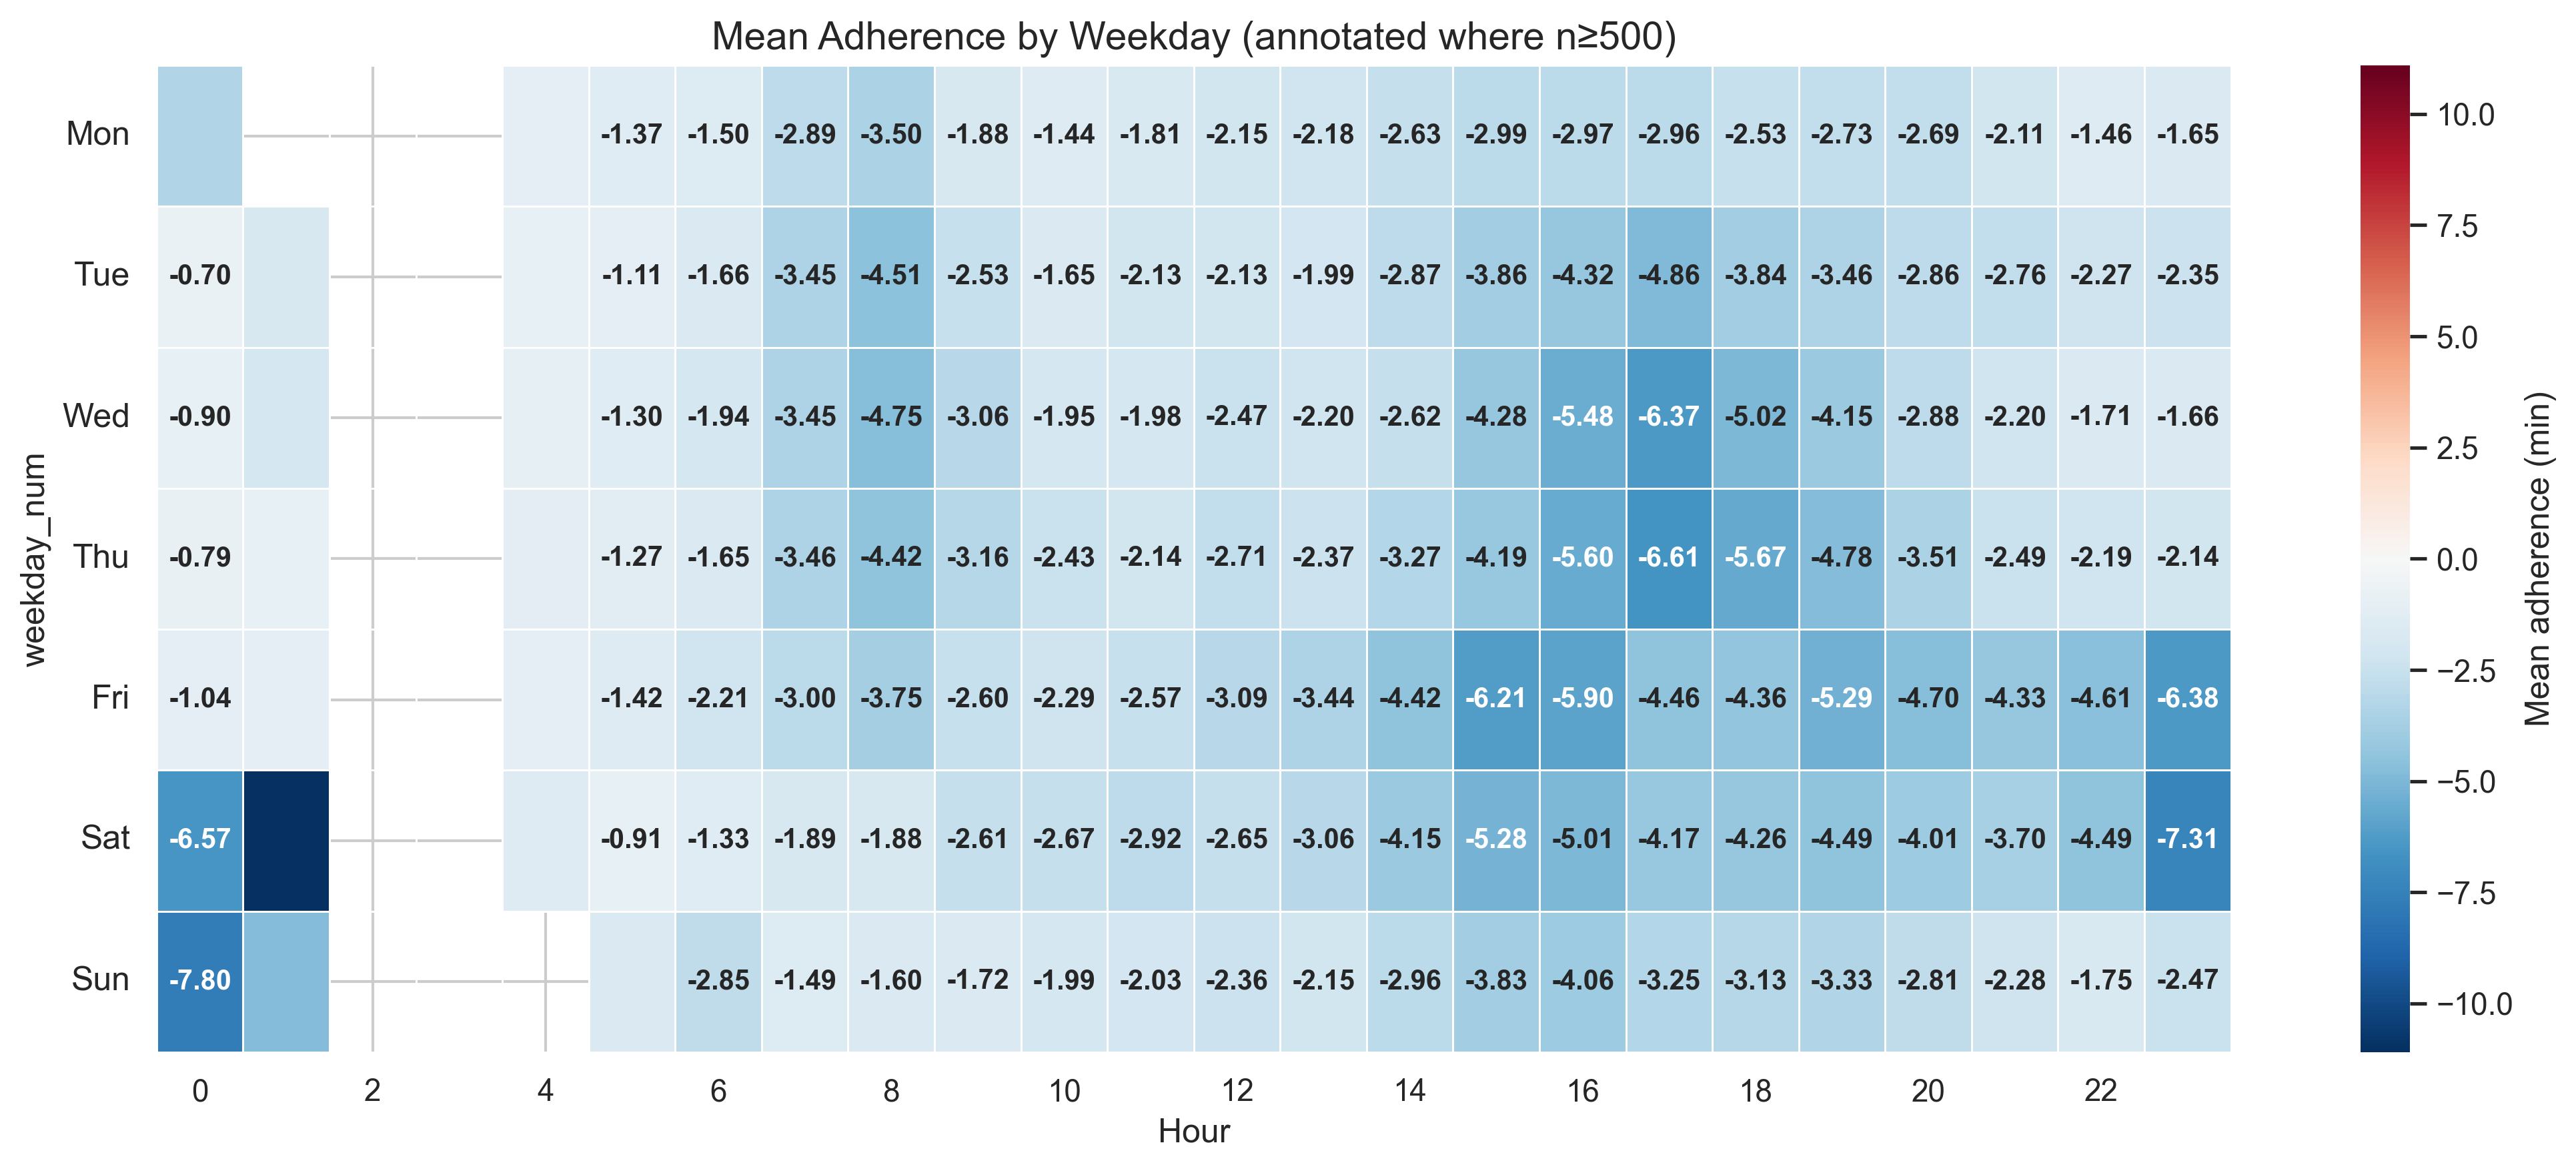

Saved: wego_mean_adherence_annotated_big.png


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

MIN_ANNOT = 500
mean_ad = df.pivot_table(index='weekday_num', columns='hour', values='ADHERENCE', aggfunc='mean')
count_cells = df.pivot_table(index='weekday_num', columns='hour', values='ADHERENCE', aggfunc='count', fill_value=0)
mean_ad = mean_ad.reindex(index=[0,1,2,3,4,5,6], columns=list(range(24)))
count_cells = count_cells.reindex(index=[0,1,2,3,4,5,6], columns=list(range(24))).fillna(0).astype(int)

# annotation matrix - only cells >= MIN_ANNOT
annot = np.full_like(mean_ad.values.astype(object), '', dtype=object)
for i in range(mean_ad.shape[0]):
    for j in range(mean_ad.shape[1]):
        if count_cells.iat[i,j] >= MIN_ANNOT and not np.isnan(mean_ad.iat[i,j]):
            annot[i,j] = f"{mean_ad.iat[i,j]:.2f}"

max_abs = np.nanmax(np.abs(mean_ad.values))
vmin, vmax = (-max_abs, max_abs) if np.isfinite(max_abs) else (-5,5)

plt.figure(figsize=(14,6), dpi=300)
ax = sns.heatmap(mean_ad, cmap="RdBu_r", center=0, vmin=vmin, vmax=vmax, annot=annot, fmt='', 
                 annot_kws={'fontsize':10, 'fontweight':'bold'}, cbar_kws={'label':'Mean adherence (min)'},
                 linewidths=0.25, linecolor='white', mask=mean_ad.isna())
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour", fontsize=12)
ax.set_title(f"Mean Adherence by Weekday (annotated where n≥{MIN_ANNOT})", fontsize=14)
plt.tight_layout()
out = "wego_mean_adherence_annotated_big.png"
plt.savefig(out, bbox_inches='tight')
plt.show()
print("Saved:", out)


In [2]:
import pandas as pd

# Load your WeGo CSV again — make sure the filename matches exactly
df = pd.read_csv("Headway Data, 8-1-2023 to 9-30-2023.csv")

# Quick check
print("Rows:", len(df))
print("Columns:", list(df.columns)[:10], "...")
df.head(2)

Rows: 350329
Columns: ['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID', 'ROUTE_DIRECTION_NAME'] ...


CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
0    120230801             1      99457890  2023-08-01          22   
1    120230801             1      99457891  2023-08-01          22   

   BLOCK_ABBR  OPERATOR  TRIP_ID  OVERLOAD_ID ROUTE_DIRECTION_NAME  ...  \
0        2200      1040   345104            0          TO DOWNTOWN  ...   
1        2200      1040   345104            0          TO DOWNTOWN  ...   

  ACTUAL_HDWY  HDWY_DEV  ADJUSTED_EARLY_COUNT  ADJUSTED_LATE_COUNT  \
0         NaN       NaN                     0                    0   
1         NaN       NaN                     0                    0   

   ADJUSTED_ONTIME_COUNT STOP_CANCELLED PREV_SCHED_STOP_CANCELLED IS_RELIEF  \
0                      1              0                       0.0         0   
1                      1              0                       0.0         0   

   DWELL_IN_MINS  SCHEDULED_LAYOVER_MINUTES  
0            6.5                        NaN  
1            0.0                        NaN  

[2 rows x 30 columns]

In [5]:
import pandas as pd

# If you haven't already loaded the CSV
df = pd.read_csv("Headway Data, 8-1-2023 to 9-30-2023.csv")

# Parse DATE and SCHEDULED_TIME into datetime objects
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['SCHEDULED_TIME'] = pd.to_datetime(df['SCHEDULED_TIME'], errors='coerce')

# Combine into a single datetime column (if both parts exist)
df['scheduled_dt'] = df['SCHEDULED_TIME']

# Extract hour of day and weekday number (0=Mon, 6=Sun)
df['hour'] = df['scheduled_dt'].dt.hour
df['weekday_num'] = df['scheduled_dt'].dt.weekday

# Quick check
print("✅ Added hour and weekday_num columns.")
print(df[['DATE', 'SCHEDULED_TIME', 'hour', 'weekday_num']].head(3))

✅ Added hour and weekday_num columns.
        DATE      SCHEDULED_TIME  hour  weekday_num
0 2023-08-01 2023-08-01 04:42:00     4            1
1 2023-08-01 2023-08-01 04:46:00     4            1
2 2023-08-01 2023-08-01 04:54:00     4            1


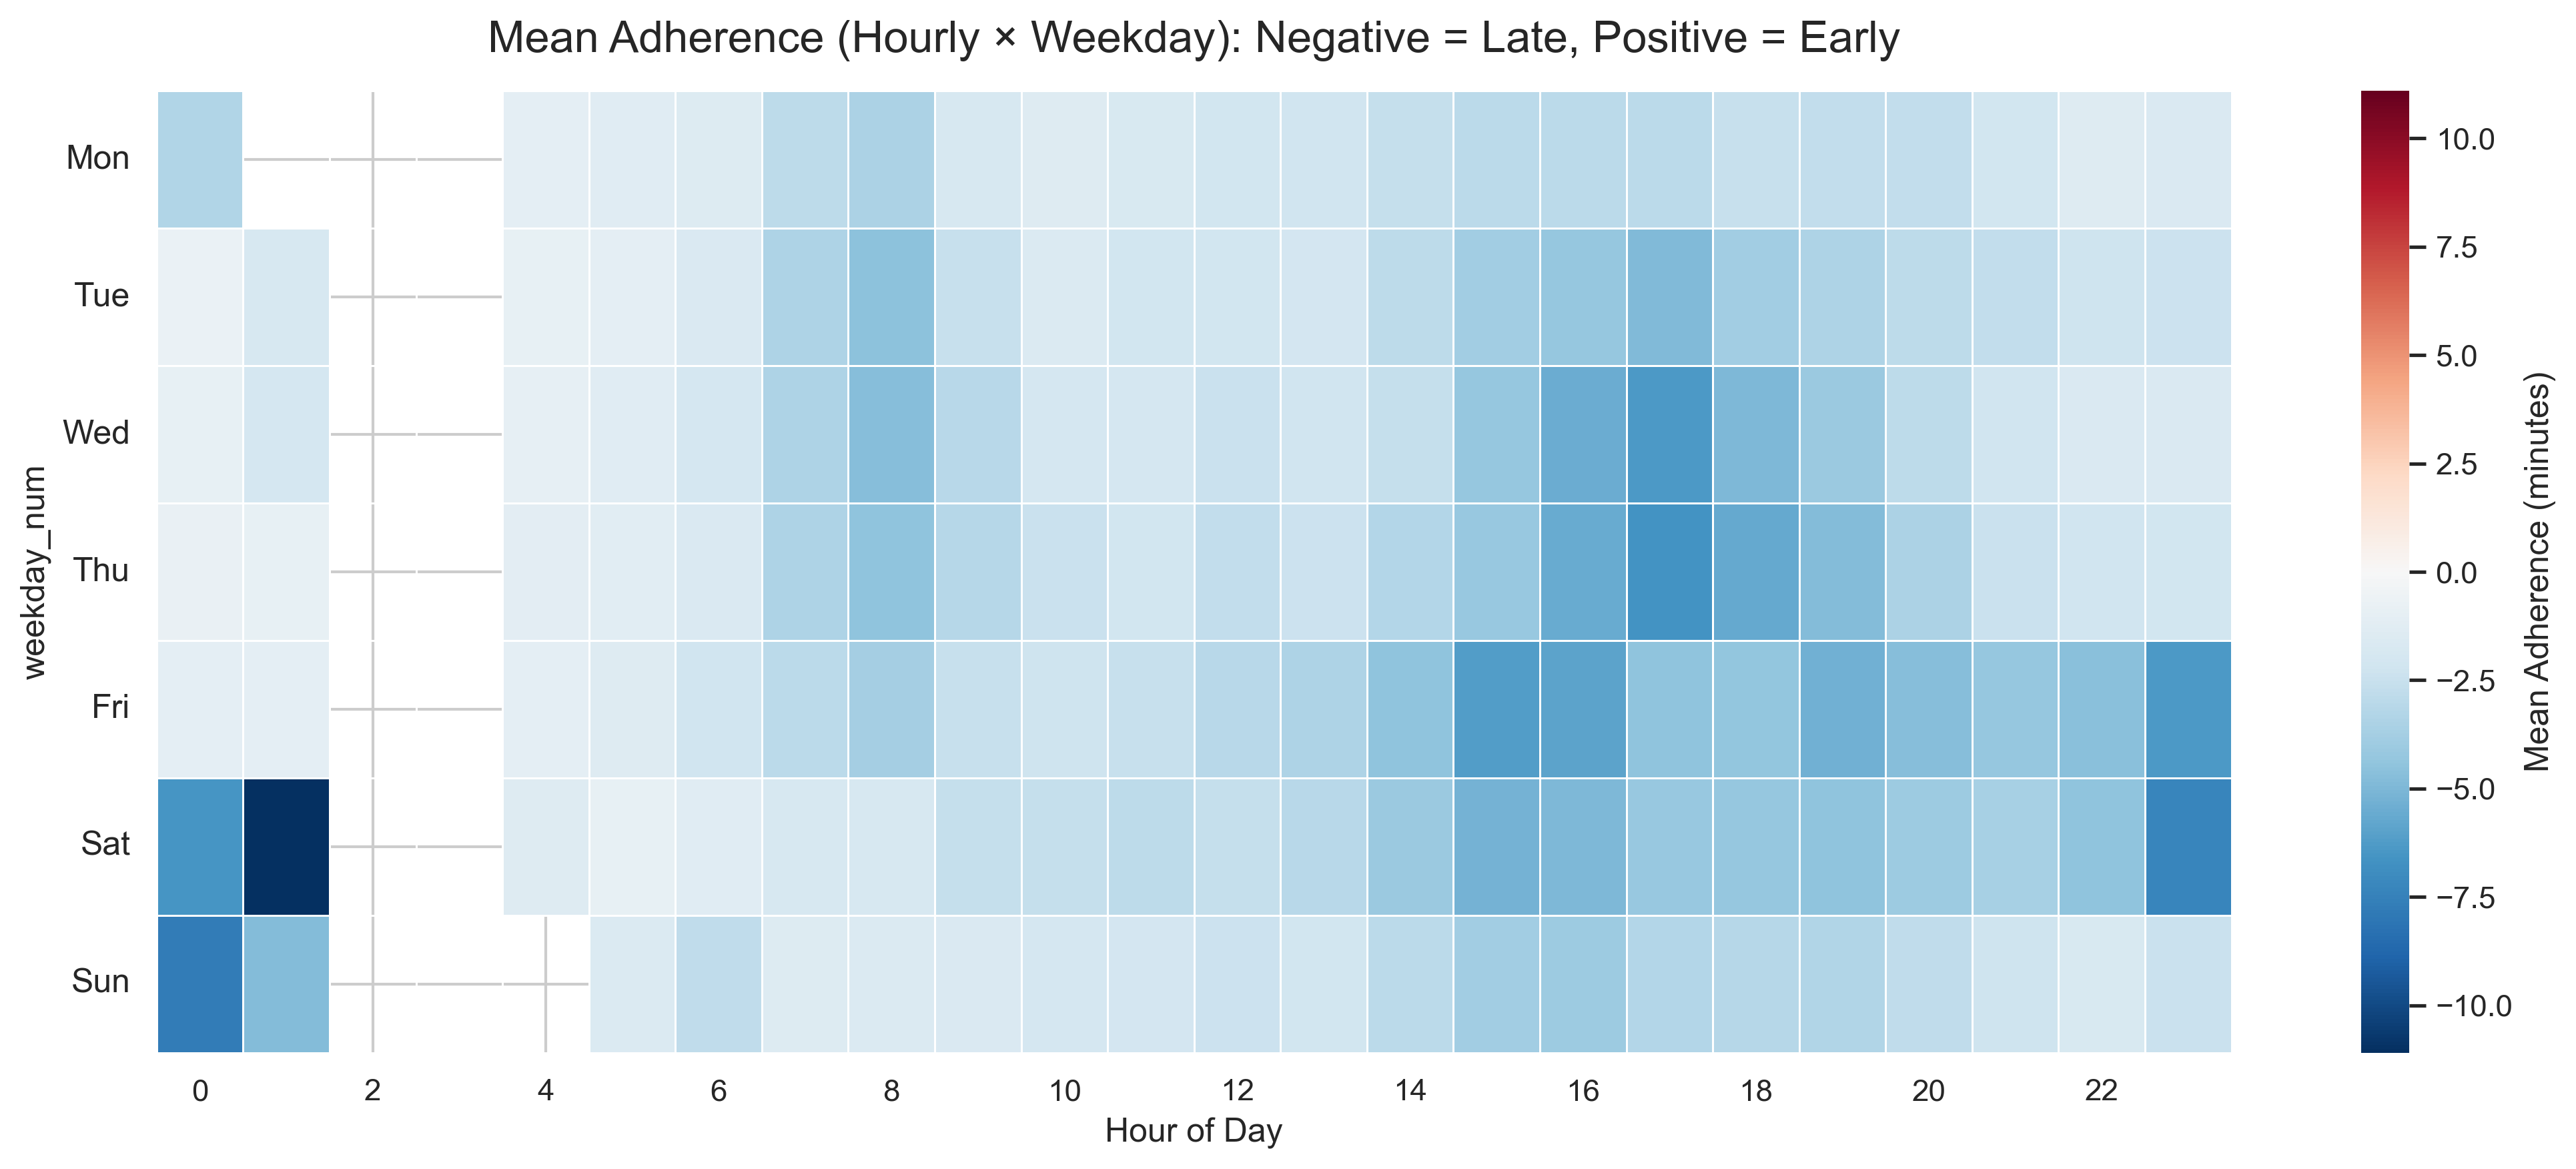

Saved: wego_mean_adherence_presentation.png


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Pivot for mean adherence (minutes early/late)
mean_ad = df.pivot_table(index='weekday_num', columns='hour', values='ADHERENCE', aggfunc='mean')

# Reindex for correct order
mean_ad = mean_ad.reindex(index=[0,1,2,3,4,5,6], columns=list(range(24)))

# Diverging symmetric color scale (center = 0)
max_abs = np.nanmax(np.abs(mean_ad.values))
vmin, vmax = (-max_abs, max_abs) if np.isfinite(max_abs) else (-5, 5)

# Weekday labels
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Create the figure
plt.figure(figsize=(14,6), dpi=300)
ax = sns.heatmap(
    mean_ad,
    cmap="RdBu_r",         # blue = late, red = early
    center=0,
    vmin=vmin,
    vmax=vmax,
    cbar_kws={'label':'Mean Adherence (minutes)'},
    linewidths=0.3,
    linecolor='white',
    mask=mean_ad.isna()
)

# Format ticks and labels
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour of Day", fontsize=12)

# Presentation title
plt.title("Mean Adherence (Hourly × Weekday): Negative = Late, Positive = Early", fontsize=16, pad=14)

# Save high-resolution image
out = "wego_mean_adherence_presentation.png"
plt.tight_layout()
plt.savefig(out, bbox_inches='tight', dpi=300)
plt.show()

print("Saved:", out)


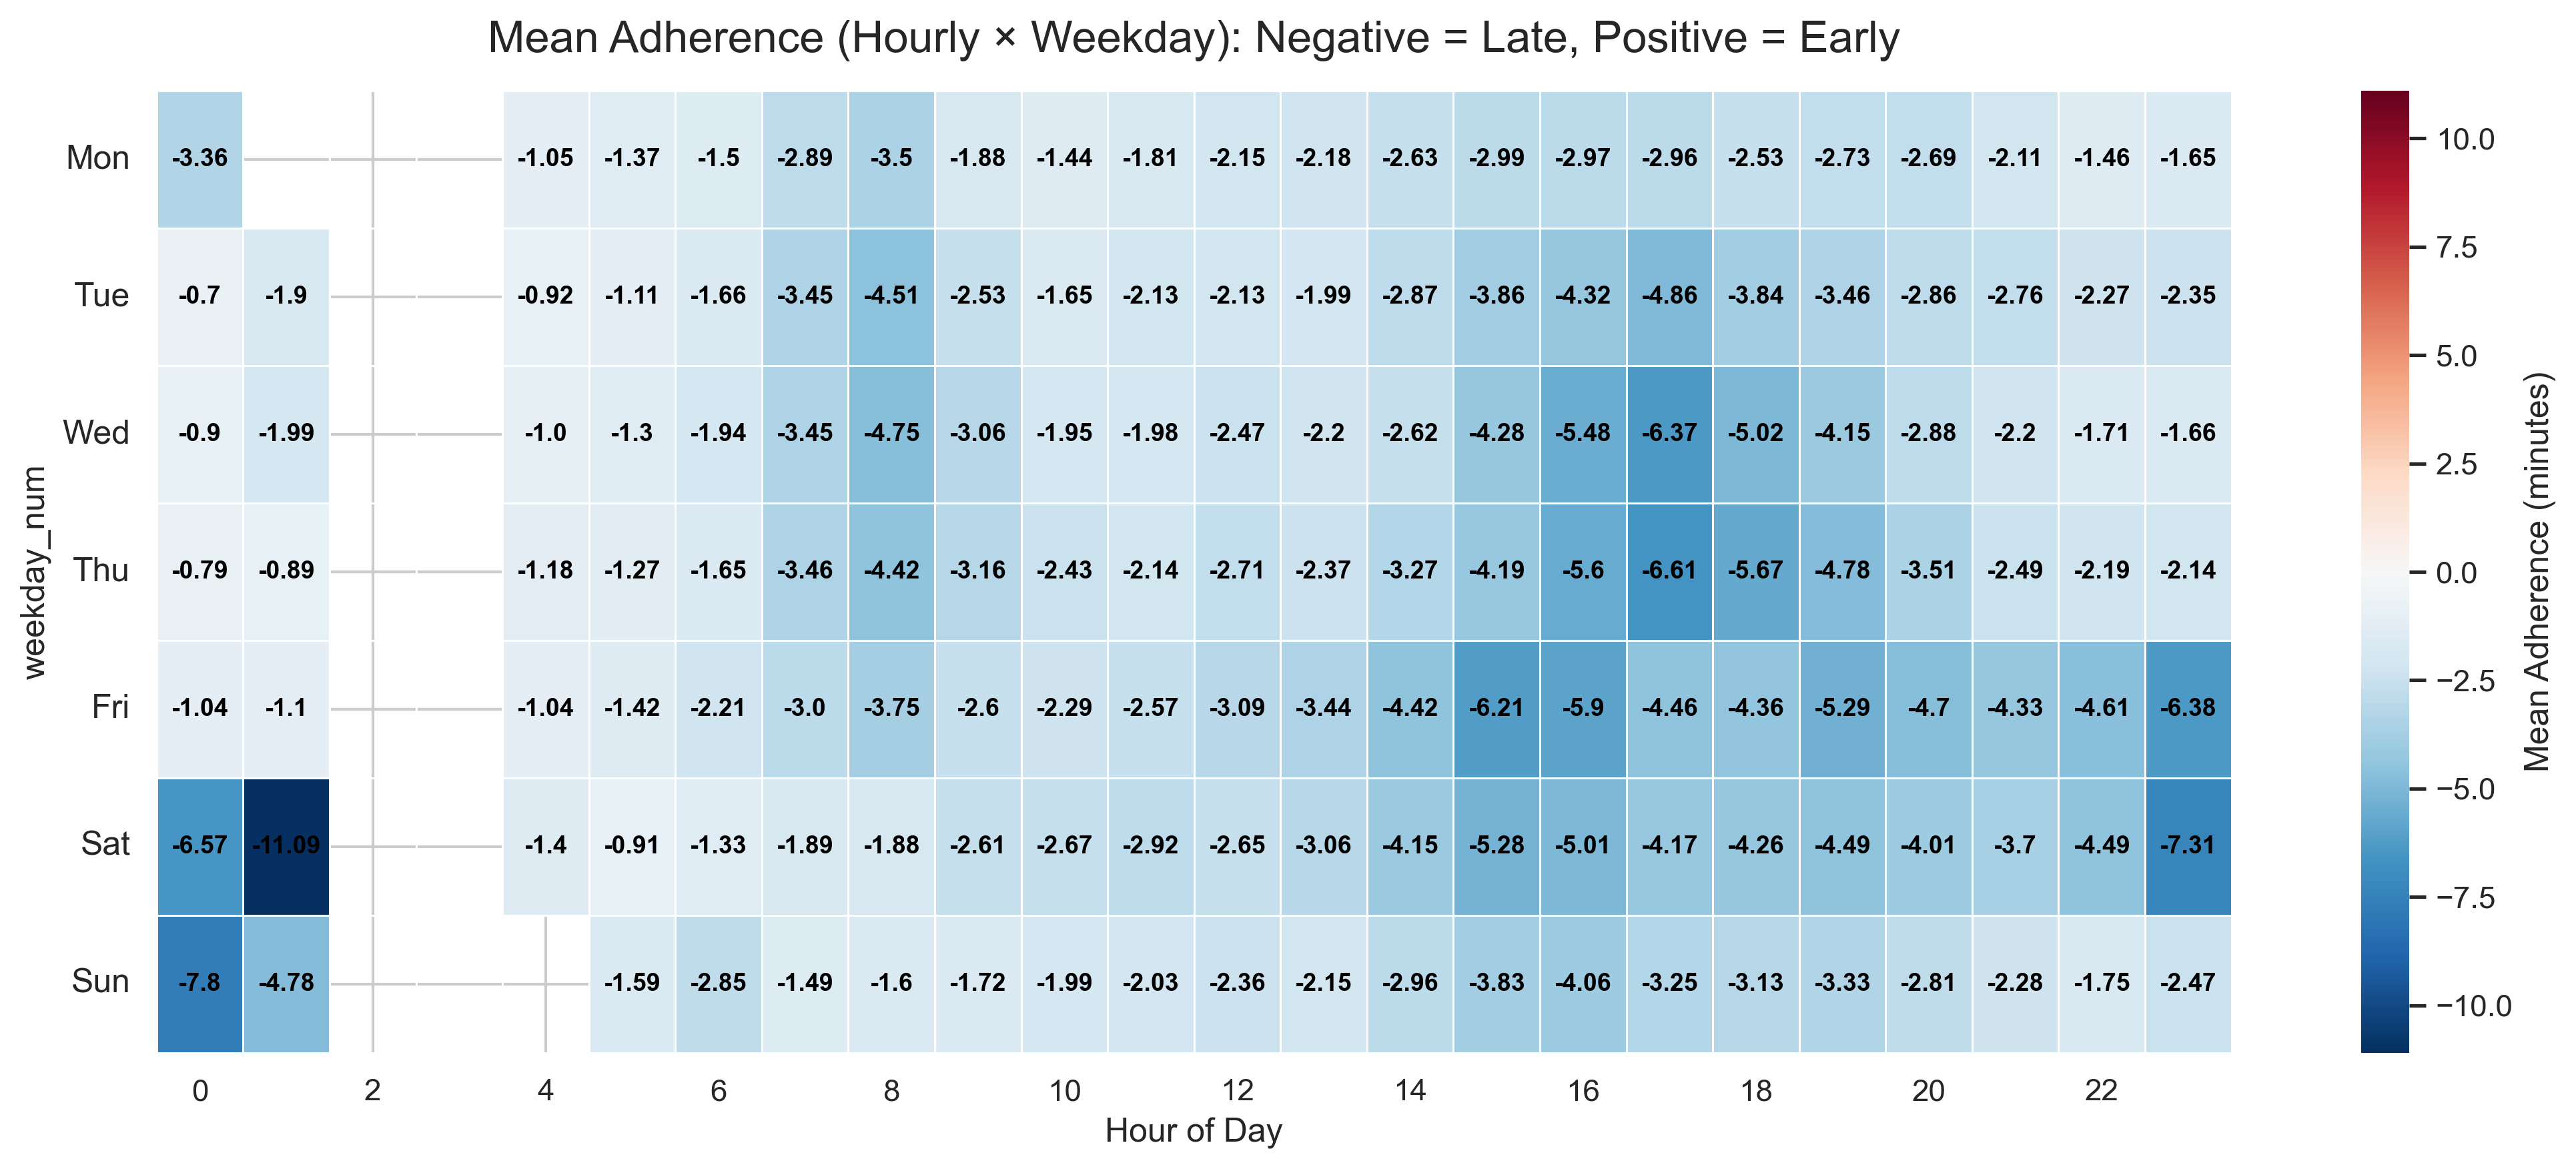

✅ Saved annotated heatmap: wego_mean_adherence_annotated_presentation.png


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Make sure hour and weekday_num exist (you already did this step)
# If not: df['hour'] = df['SCHEDULED_TIME'].dt.hour ; df['weekday_num'] = df['SCHEDULED_TIME'].dt.weekday

# Build pivot table for mean adherence
mean_ad = df.pivot_table(index='weekday_num', columns='hour', values='ADHERENCE', aggfunc='mean')
mean_ad = mean_ad.reindex(index=[0,1,2,3,4,5,6], columns=list(range(24)))

# Diverging symmetric color scale centered at 0
max_abs = np.nanmax(np.abs(mean_ad.values))
vmin, vmax = (-max_abs, max_abs) if np.isfinite(max_abs) else (-5,5)

# Weekday labels
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Build annotation text (rounded to 2 decimals, blank for NaNs)
annot = mean_ad.round(2).astype(str)
annot = annot.where(~mean_ad.isna(), other="")

# Plot heatmap
plt.figure(figsize=(14,6), dpi=300)
ax = sns.heatmap(
    mean_ad,
    cmap="RdBu_r",
    center=0,
    vmin=vmin,
    vmax=vmax,
    annot=annot,
    fmt="",
    annot_kws={'fontsize':9, 'fontweight':'bold', 'color':'black'},
    cbar_kws={'label':'Mean Adherence (minutes)'},
    linewidths=0.3,
    linecolor='white',
    mask=mean_ad.isna()
)

# Axis formatting
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour of Day", fontsize=12)

# Title for presentation
plt.title("Mean Adherence (Hourly × Weekday): Negative = Late, Positive = Early", fontsize=16, pad=14)

# Save high-resolution PNG
out = "wego_mean_adherence_annotated_presentation.png"
plt.tight_layout()
plt.savefig(out, bbox_inches='tight', dpi=300)
plt.show()

print("✅ Saved annotated heatmap:", out)

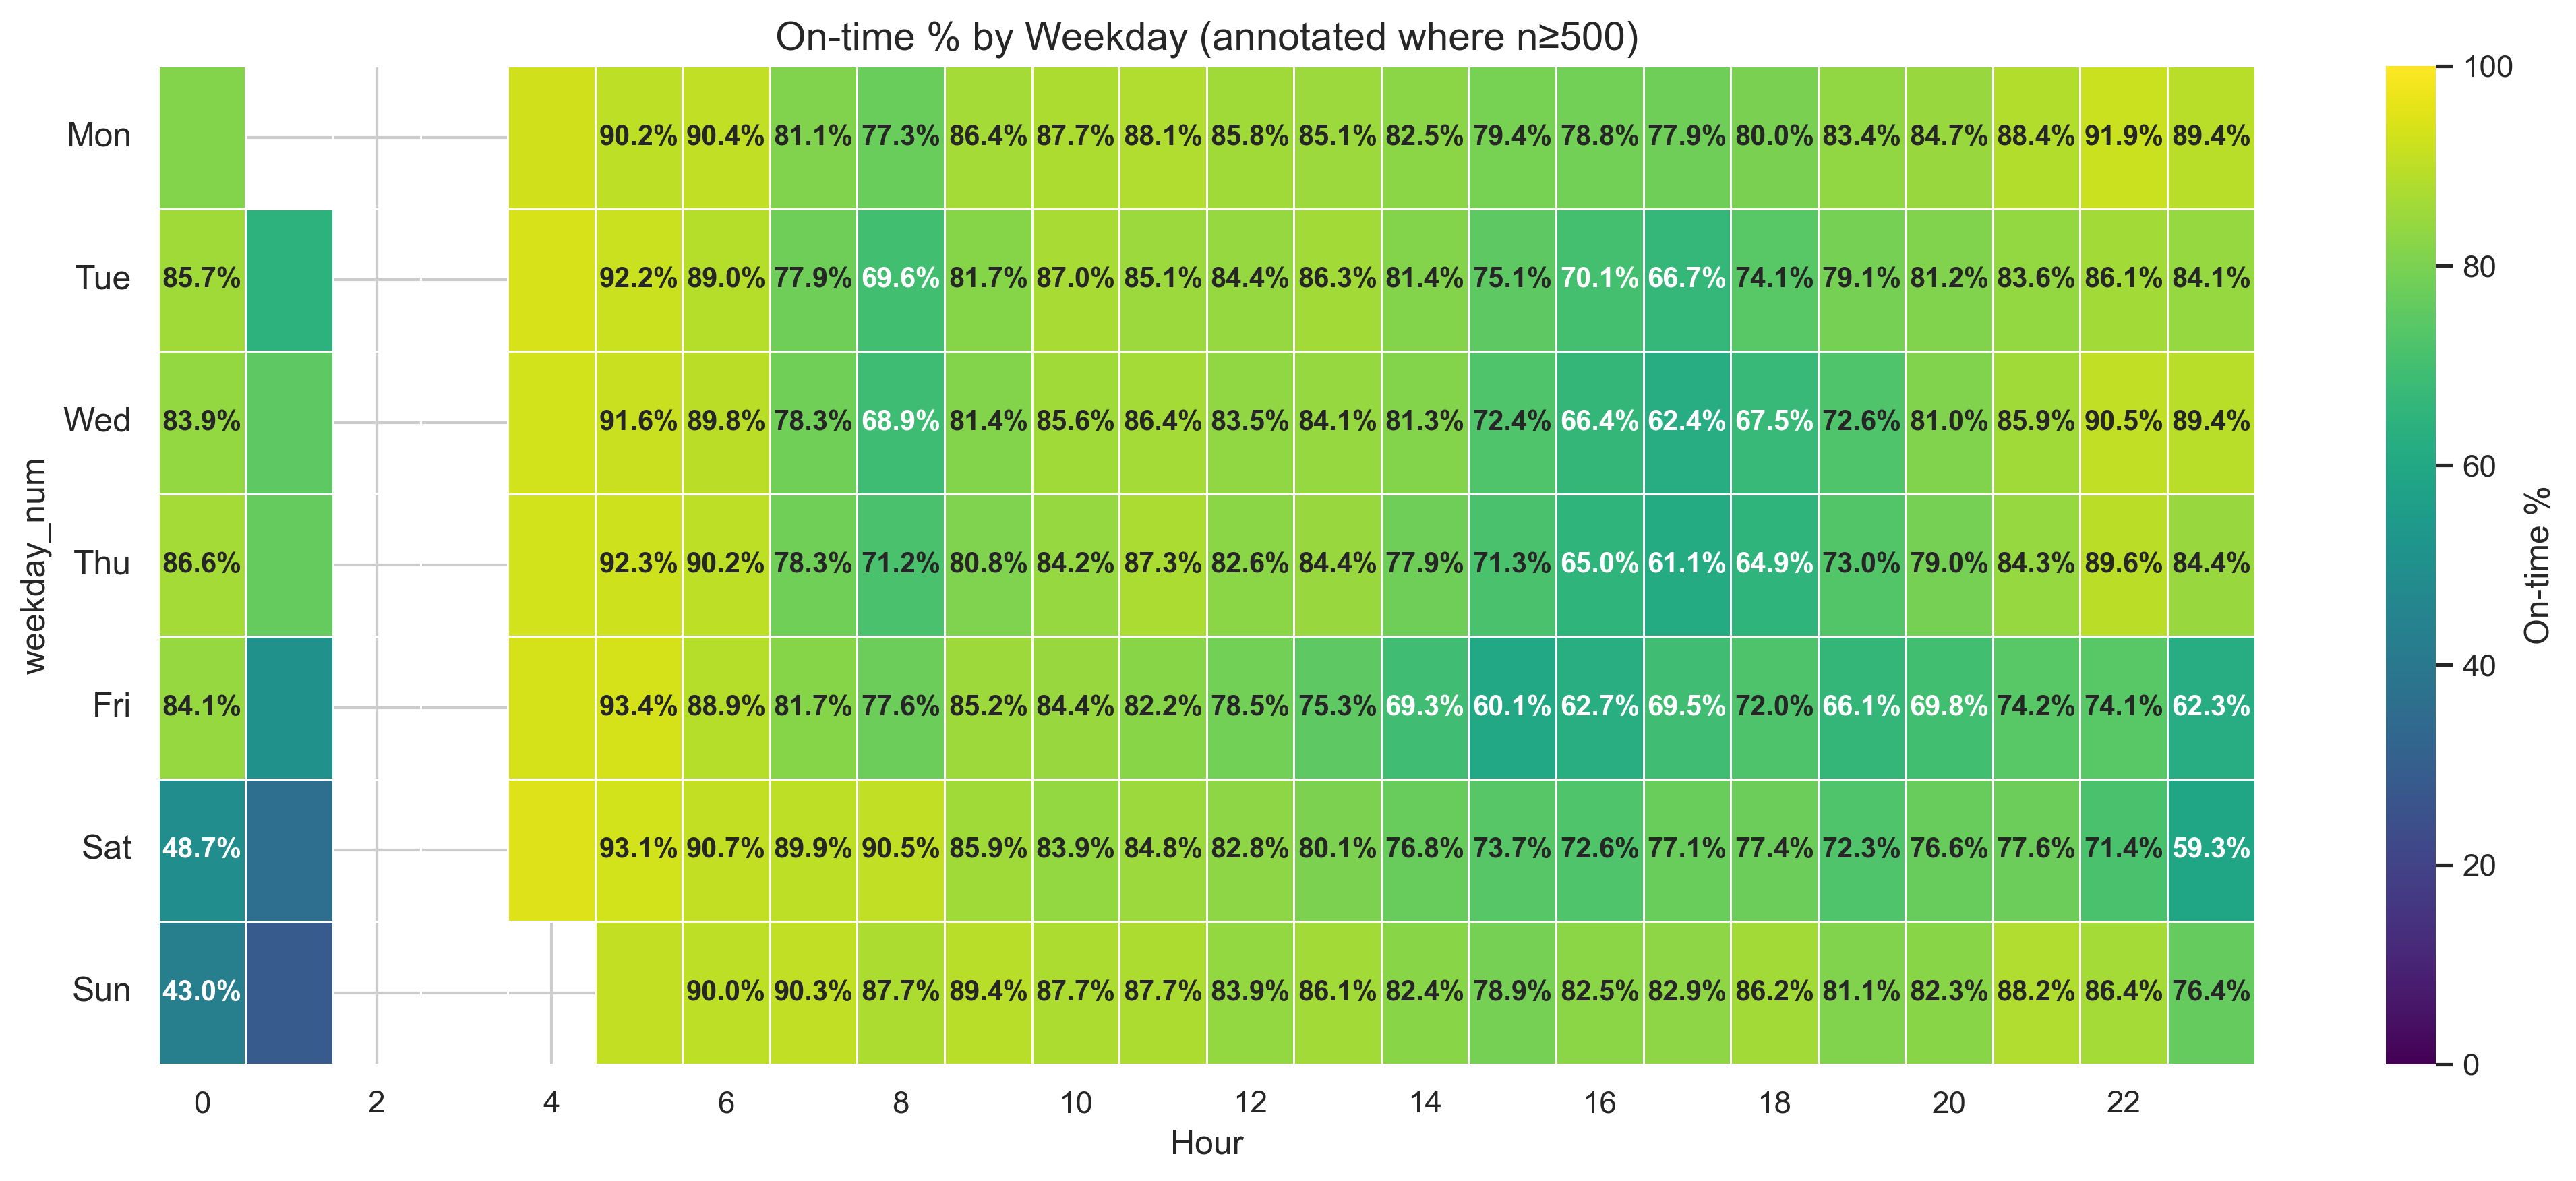

Saved: wego_ontime_pct_annotated_big.png


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

MIN_ANNOT = 500   # annotate only cells with count >= this
hour_col = 'hour'
wd_col = 'weekday_num'

# prepare pivot and counts
if all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    num = df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    denom = (
        df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    ontime_pct = (num / denom.replace(0, np.nan)) * 100
else:
    df['_ontime_flag'] = df['ADHERENCE'].between(-6, 1, inclusive="both")
    ontime_pct = df.pivot_table(index=wd_col, columns=hour_col, values='_ontime_flag', aggfunc='mean') * 100

count_cells = df.pivot_table(index=wd_col, columns=hour_col, values='ADHERENCE', aggfunc='count', fill_value=0)

# Reindex
hours = list(range(24))
ontime_pct = ontime_pct.reindex(index=[0,1,2,3,4,5,6], columns=hours)
count_cells = count_cells.reindex(index=[0,1,2,3,4,5,6], columns=hours).fillna(0).astype(int)

# Build annotation matrix: show percent (1 decimal) only if count >= MIN_ANNOT
annot = np.full_like(ontime_pct.values.astype(object), '', dtype=object)
for i in range(ontime_pct.shape[0]):
    for j in range(ontime_pct.shape[1]):
        if count_cells.iat[i,j] >= MIN_ANNOT and not np.isnan(ontime_pct.iat[i,j]):
            annot[i,j] = f"{ontime_pct.iat[i,j]:.1f}%"

plt.figure(figsize=(14,6), dpi=300)
ax = sns.heatmap(ontime_pct, cmap="viridis", vmin=0, vmax=100, annot=annot, fmt='', 
                 annot_kws={'fontsize':10, 'fontweight':'bold'}, cbar_kws={'label':'On-time %'},
                 linewidths=0.25, linecolor='white', mask=ontime_pct.isna())
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour", fontsize=12)
ax.set_title(f"On-time % by Weekday (annotated where n≥{MIN_ANNOT})", fontsize=14)
plt.tight_layout()
out = "wego_ontime_pct_annotated_big.png"
plt.savefig(out, bbox_inches='tight')
plt.show()
print("Saved:", out)

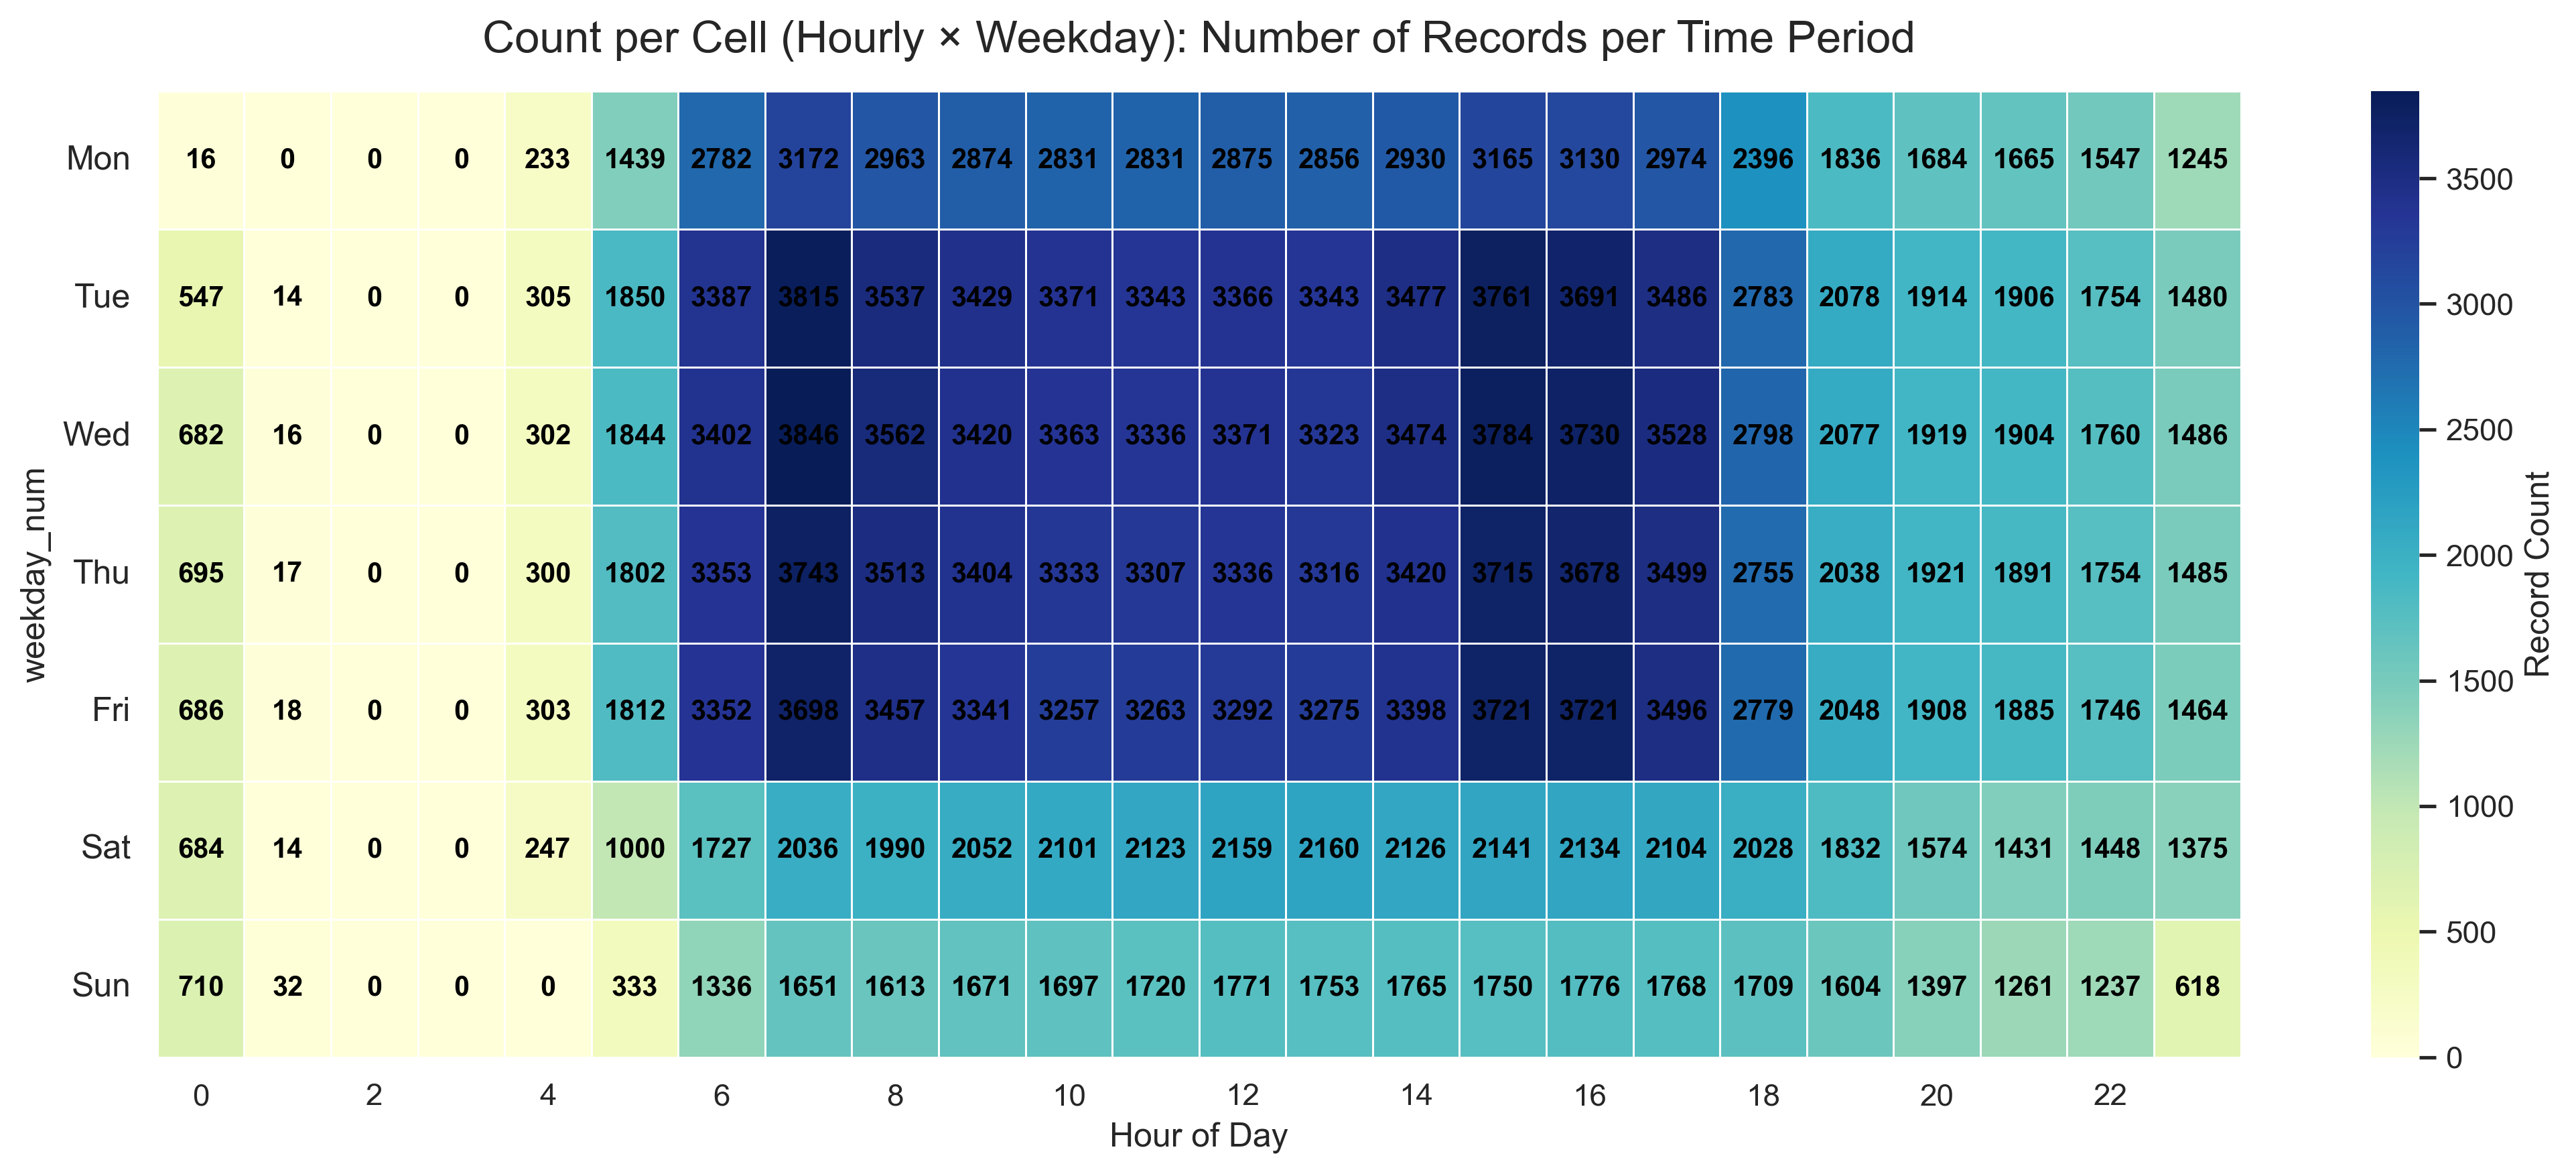

✅ Saved presentation heatmap: wego_count_per_cell_presentation.png


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Build count pivot (number of records per hour × weekday)
count_cells = df.pivot_table(
    index='weekday_num',
    columns='hour',
    values='ADHERENCE',      # any column works; we just need one value per record
    aggfunc='count',
    fill_value=0
)

# Reindex for order (Mon–Sun, 0–23)
count_cells = count_cells.reindex(index=[0,1,2,3,4,5,6], columns=list(range(24))).fillna(0).astype(int)

# Labels
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Plot
plt.figure(figsize=(14,6), dpi=300)
ax = sns.heatmap(
    count_cells,
    cmap="YlGnBu",
    annot=count_cells,                # show the numbers
    fmt='d',
    annot_kws={'fontsize':10, 'fontweight':'bold', 'color':'black'},
    cbar_kws={'label':'Record Count'},
    linewidths=0.3,
    linecolor='white',
    mask=count_cells.isna()
)

# Axis formatting
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0, fontsize=12)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=11)
ax.set_xlabel("Hour of Day", fontsize=12)

# Title for presentation
plt.title("Count per Cell (Hourly × Weekday): Number of Records per Time Period", fontsize=16, pad=14)

# Save high-resolution PNG
out = "wego_count_per_cell_presentation.png"
plt.tight_layout()
plt.savefig(out, bbox_inches='tight', dpi=300)
plt.show()

print("✅ Saved presentation heatmap:", out)

In [11]:
# Cell 1: setup + load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="whitegrid")

pd.options.display.max_columns = 200
pd.options.display.width = 160

# Update this filename if yours is different or use full path
CSV = "Headway Data, 8-1-2023 to 9-30-2023.csv"

# Load
df = pd.read_csv(CSV)
print("Loaded rows:", len(df))
print("Columns:", list(df.columns)[:40])

# Basic preprocessing: ensure ADHERENCE numeric and build scheduled datetime/hour/weekday
df['ADHERENCE'] = pd.to_numeric(df['ADHERENCE'], errors='coerce')

# Parse DATE and SCHEDULED_TIME into a scheduled datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
# if SCHEDULED_TIME looks like 'YYYY-MM-DD HH:MM:SS' this will parse; otherwise we try combine
df['SCHEDULED_TIME_parsed'] = pd.to_datetime(df['SCHEDULED_TIME'].astype(str), errors='coerce')

# If SCHEDULED_TIME_parsed has times, use it; otherwise try combining DATE + SCHEDULED_TIME string
mask = df['SCHEDULED_TIME_parsed'].isna() & df['DATE'].notna()
if mask.any():
    df.loc[mask, 'SCHEDULED_TIME_parsed'] = pd.to_datetime(
        df.loc[mask, 'DATE'].dt.strftime("%Y-%m-%d") + ' ' + df.loc[mask, 'SCHEDULED_TIME'].astype(str),
        errors='coerce'
    )

df['scheduled_dt'] = df['SCHEDULED_TIME_parsed']
df['hour'] = df['scheduled_dt'].dt.hour
df['weekday_num'] = df['scheduled_dt'].dt.weekday  # 0=Mon,6=Sun
df['weekday'] = df['scheduled_dt'].dt.day_name()

print("scheduled_dt nulls:", df['scheduled_dt'].isna().sum())


Loaded rows: 350329
Columns: ['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED', 'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']
scheduled_dt nulls: 0


Using ADJUSTED_* counts (cleaned by WeGo)
Overall: On-time: 79.69%   Late: 17.42%   Early: 2.88%   (n=338861)


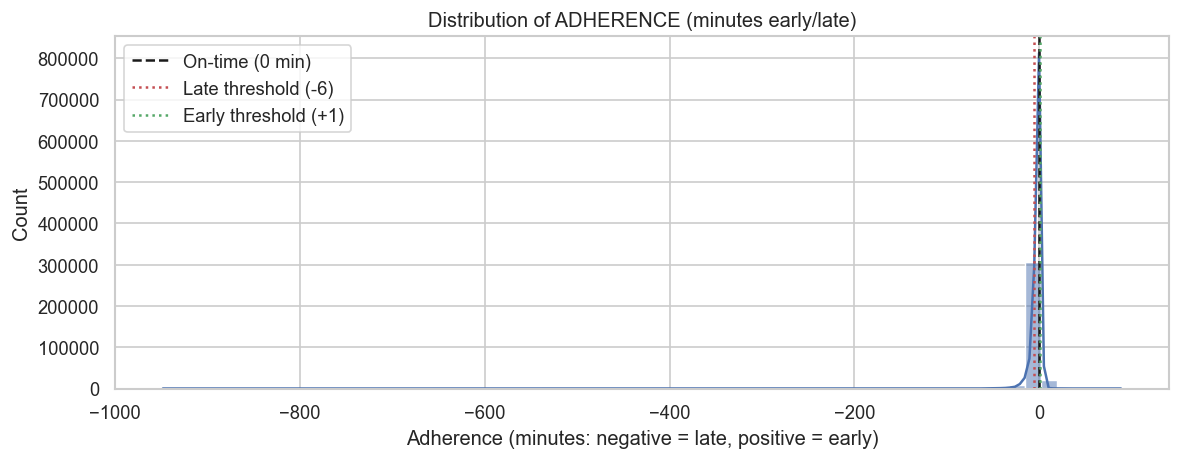

Saved: q1_adherence_distribution.png


In [12]:
# Cell 2: Q1 - overall on-time performance and distribution of adherence
import matplotlib.pyplot as plt
import seaborn as sns

# Use adjusted counts if present, otherwise fallback to threshold on ADHERENCE
if all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    early_total = df["ADJUSTED_EARLY_COUNT"].sum()
    late_total  = df["ADJUSTED_LATE_COUNT"].sum()
    ontime_total= df["ADJUSTED_ONTIME_COUNT"].sum()
    total = early_total + late_total + ontime_total
    print("Using ADJUSTED_* counts (cleaned by WeGo)")
else:
    # define ontime by adherence between -6 and +1 (inclusive)
    ontime_mask = (df['ADHERENCE'] >= -6) & (df['ADHERENCE'] <= 1)
    ontime_total = ontime_mask.sum()
    late_total = (df['ADHERENCE'] < -6).sum()
    early_total = (df['ADHERENCE'] > 1).sum()
    total = len(df)
    print("Using ADHERENCE thresholds: on-time = [-6, +1] minutes")

# Percentages
ontime_pct = ontime_total / total * 100
late_pct = late_total / total * 100
early_pct = early_total / total * 100
print(f"Overall: On-time: {ontime_pct:.2f}%   Late: {late_pct:.2f}%   Early: {early_pct:.2f}%   (n={total})")

# Distribution plot
plt.figure(figsize=(10,4), dpi=120)
sns.histplot(df['ADHERENCE'].dropna(), bins=60, kde=True)
plt.axvline(0, color='k', linestyle='--', label='On-time (0 min)')
plt.axvline(-6, color='r', linestyle=':', label='Late threshold (-6)')
plt.axvline(1, color='g', linestyle=':', label='Early threshold (+1)')
plt.title("Distribution of ADHERENCE (minutes early/late)")
plt.xlabel("Adherence (minutes: negative = late, positive = early)")
plt.legend()
out = "q1_adherence_distribution.png"
plt.tight_layout()
plt.savefig(out, bbox_inches='tight', pad_inches=0.05, dpi=200)
plt.show()
print("Saved:", out)


Columns used: ROUTE_ABBR ROUTE_DIRECTION_NAME TIME_POINT_ABBR ADHERENCE


ROUTE_ABBR ROUTE_DIRECTION_NAME TIME_POINT_ABBR  ADHERENCE
0          22          TO DOWNTOWN            MHSP  -2.133333
1          22          TO DOWNTOWN            ELIZ  -2.450000
2          22          TO DOWNTOWN            CV23  -0.933333
3          22          TO DOWNTOWN         MCC5_10   6.283333

Routes most late (by mean adherence):


mean_adherence      n
ROUTE_ABBR                       
55               -4.823302  60359
52               -3.971342  49327
3                -3.761491  45488
7                -3.346555  17267
56               -2.703988  58950
50               -2.505022  42629
23               -1.760110  39653
22               -1.138107  25188

Routes most early (by mean adherence):


mean_adherence      n
ROUTE_ABBR                       
55               -4.823302  60359
52               -3.971342  49327
3                -3.761491  45488
7                -3.346555  17267
56               -2.703988  58950
50               -2.505022  42629
23               -1.760110  39653
22               -1.138107  25188

ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  total  ontime_pct  mean_adherence
ROUTE_ABBR                                                                                                     
22                          22492                 2065                   631  25188   89.296490       -1.138107
23                          35137                 3230                  1286  39653   88.611202       -1.760110
50                          36309                 5113                  1207  42629   85.174412       -2.505022
56                          48361                 8837                  1752  58950   82.037320       -2.703988
7                           13417                 3417                   433  17267   77.703133       -3.346555
52                          37736                10038                  1553  49327   76.501713       -3.971342
3                           34516                 9590                  1382  45488   75.879353       -3.761491
55                          42080                16748                  1531  60359   69.716198       -4.823302

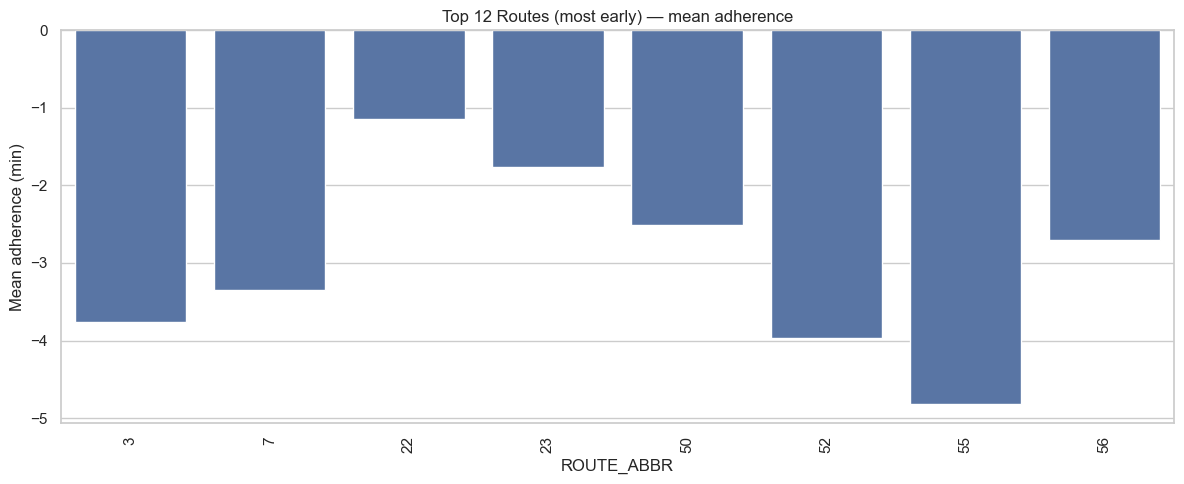

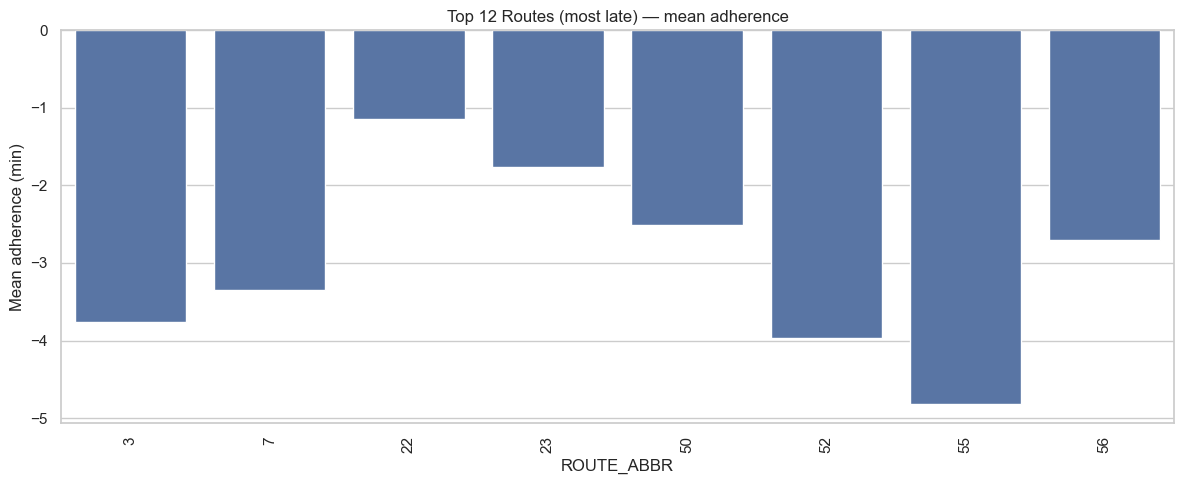

In [13]:
# Cell 3: Q2 - how route, direction, location affect on-time performance
route_col = "ROUTE_ABBR"
direction_col = "ROUTE_DIRECTION_NAME"
loc_col = "TIME_POINT_ABBR"
adherence_col = "ADHERENCE"

# Quick existence check
print("Columns used:", route_col, direction_col, loc_col, adherence_col)
display(df[[route_col, direction_col, loc_col, adherence_col]].head(4))

# 1) Mean adherence by route
route_perf = df.groupby(route_col)[adherence_col].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'})
route_perf = route_perf[route_perf['n']>0]
route_perf = route_perf.sort_values('mean_adherence')  # negative = most late
print("Routes most late (by mean adherence):")
display(route_perf.head(10))
print("Routes most early (by mean adherence):")
display(route_perf.tail(10))

# 2) On-time % by route using adjusted counts (preferred) or fallback
if all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    agg = df.groupby(route_col)[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
    agg['total'] = agg.sum(axis=1)
    agg = agg[agg['total']>0].copy()
    agg['ontime_pct'] = agg['ADJUSTED_ONTIME_COUNT'] / agg['total'] * 100
    agg = agg.join(route_perf['mean_adherence'])
    agg_sorted = agg.sort_values('ontime_pct', ascending=False)
    display(agg_sorted.head(10))
else:
    df['_ontime_flag'] = ((df['ADHERENCE'] >= -6) & (df['ADHERENCE'] <= 1)).astype(int)
    ontime_by_route = df.groupby(route_col)['_ontime_flag'].mean().sort_values(ascending=False) * 100
    display(ontime_by_route.head(10))

# 3) Visualization examples (top/bottom routes)
topN = 12
top_routes = route_perf.sort_values('mean_adherence', ascending=False).head(topN).index.tolist()  # most early
bot_routes = route_perf.sort_values('mean_adherence').head(topN).index.tolist()                # most late

plt.figure(figsize=(12,5))
sns.barplot(x=route_perf.loc[top_routes].index, y=route_perf.loc[top_routes,'mean_adherence'])
plt.xticks(rotation=90)
plt.title(f"Top {topN} Routes (most early) — mean adherence")
plt.ylabel("Mean adherence (min)")
plt.tight_layout()
plt.savefig("q2_top_routes_mean_adherence.png", bbox_inches='tight', pad_inches=0.05, dpi=200)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=route_perf.loc[bot_routes].index, y=route_perf.loc[bot_routes,'mean_adherence'])
plt.xticks(rotation=90)
plt.title(f"Top {topN} Routes (most late) — mean adherence")
plt.ylabel("Mean adherence (min)")
plt.tight_layout()
plt.savefig("q2_bot_routes_mean_adherence.png", bbox_inches='tight', pad_inches=0.05, dpi=200)
plt.show()


Mean adherence by hour (sample):


hour  mean_adherence      n
0      0       -3.071600   4020
1      1       -3.618168    111
2      4       -1.089960   1690
3      5       -1.261005  10080
4      6       -1.831436  19339
5      7       -3.003120  21961
6      8       -3.783631  20635
7      9       -2.585913  20191
8     10       -2.040670  19953
9     11       -2.209074  19923
10    12       -2.517117  20170
11    13       -2.481100  20026
12    14       -3.255852  20590
13    15       -4.395507  22037
14    16       -4.855838  21860
15    17       -4.865348  20855
16    18       -4.203048  17248
17    19       -4.068211  13513
18    20       -3.368831  12317
19    21       -2.846955  11943
20    22       -2.651855  11246
21    23       -3.508210   9153

Mean adherence by weekday:


weekday_num  mean_adherence      n    weekday
0            0       -2.354027  47444     Monday
1            1       -2.932405  56637    Tuesday
2            2       -3.258849  56927  Wednesday
3            3       -3.453737  56275   Thursday
4            4       -3.829856  55920     Friday
5            5       -3.560335  36486   Saturday
6            6       -2.702873  29172     Sunday

On-time % by time period:


ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  total  ontime_pct
time_period                                                                                      
EarlyMorning                  10864                  465                   441  11770   92.302464
Midday                        51120                 7032                  1915  60067   85.104966
Night                         26548                 4915                   879  32342   82.085214
AM_Peak                       50786                 9666                  1483  61935   81.998870
Afternoon                     49528                 9533                  1725  60786   81.479288
Evening                       32590                 9477                  1011  43078   75.653466
LateNight                      2928                  819                   384   4131   70.878722
PM_Peak                       45684                17131                  1937  64752   70.552261

ValueError: Unknown format code 'd' for object of type 'float'

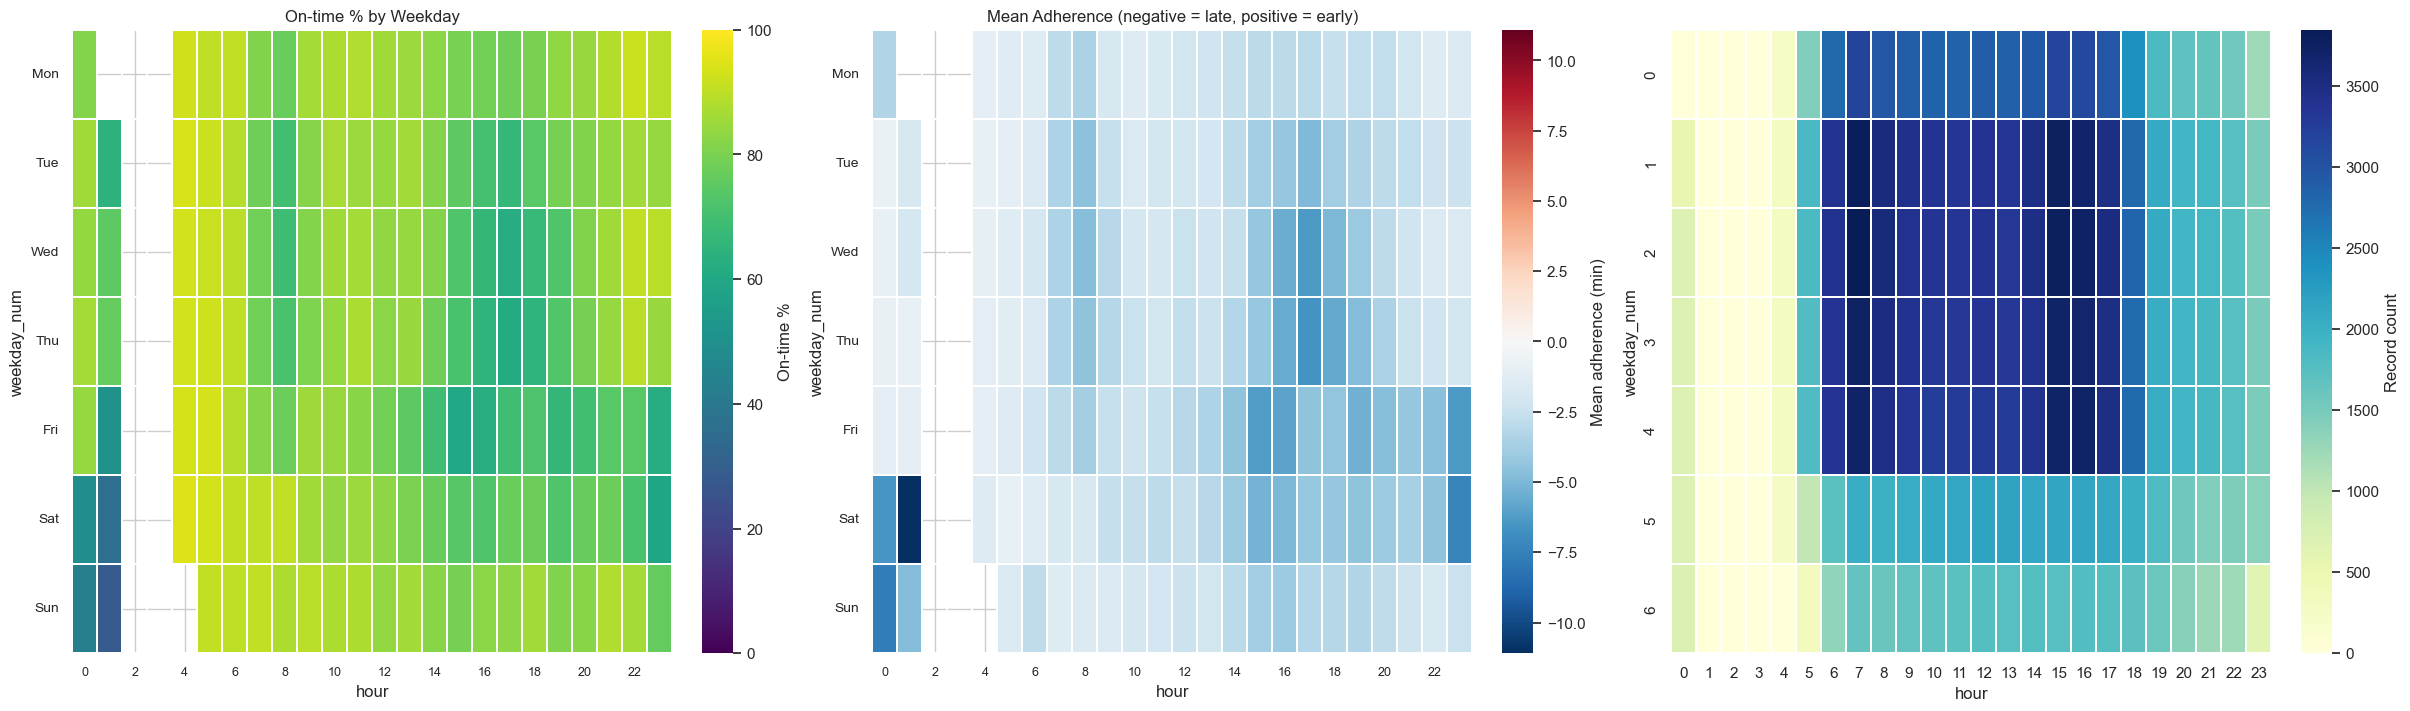

In [14]:
# Cell 4: Q3 - time of day / day of week analysis, heatmaps (On-time %, Mean Adherence, Counts)
MIN_OBS = 30   # threshold we used for reliability
hour_col = 'hour'
wd_col = 'weekday_num'
adherence_col = 'ADHERENCE'

# Ensure time columns exist
if 'hour' not in df.columns or 'weekday_num' not in df.columns:
    df['scheduled_dt'] = pd.to_datetime(df['SCHEDULED_TIME'], errors='coerce')
    df['hour'] = df['scheduled_dt'].dt.hour
    df['weekday_num'] = df['scheduled_dt'].dt.weekday

# Mean by hour and weekday table
mean_by_hour = df.groupby('hour')[adherence_col].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'}).reset_index()
mean_by_wd = df.groupby('weekday_num')[adherence_col].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'}).reset_index()
mean_by_wd['weekday'] = mean_by_wd['weekday_num'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

print("Mean adherence by hour (sample):")
display(mean_by_hour.head(24))
print("Mean adherence by weekday:")
display(mean_by_wd.sort_values('weekday_num'))

# On-time % by time_period (we created time_period earlier but ensure it here)
bins = [0,4,6,9,12,15,18,21,24]
labels = ["LateNight","EarlyMorning","AM_Peak","Midday","Afternoon","PM_Peak","Evening","Night"]
if 'time_period' not in df.columns:
    df['time_period'] = pd.cut(df['hour'].fillna(-1), bins=bins, labels=labels, right=False)

# Compute on-time % by time_period
if all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    agg_tp = df.groupby('time_period', observed=True)[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
    agg_tp['total'] = agg_tp.sum(axis=1)
    agg_tp = agg_tp[agg_tp['total']>0].copy()
    agg_tp['ontime_pct'] = agg_tp['ADJUSTED_ONTIME_COUNT'] / agg_tp['total'] * 100
else:
    df['_ontime_flag'] = ((df[adherence_col] >= -6) & (df[adherence_col] <= 1)).astype(int)
    agg_tp = df.groupby('time_period', observed=True)['_ontime_flag'].agg(['mean','count']).rename(columns={'mean':'ontime_pct','count':'total'})
    agg_tp['ontime_pct'] = agg_tp['ontime_pct'] * 100

print("On-time % by time period:")
display(agg_tp.sort_values('ontime_pct', ascending=False))

# Heatmaps (3 panels) - clean version
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
hours = list(range(24))

# On-time pivot
if all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    num = df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    tot = (
        df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    ontime_pct = (num / tot.replace(0, np.nan)) * 100
else:
    df['_ontime_flag'] = ((df[adherence_col] >= -6) & (df[adherence_col] <= 1)).astype(int)
    ontime_pct = df.pivot_table(index=wd_col, columns=hour_col, values='_ontime_flag', aggfunc='mean') * 100

# mean adherence pivot & counts pivot
mean_ad = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='mean')
count_cells = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='count', fill_value=0)

# Reindex & mask
ontime_pct = ontime_pct.reindex(index=[0,1,2,3,4,5,6], columns=hours)
mean_ad = mean_ad.reindex(index=[0,1,2,3,4,5,6], columns=hours)
count_cells = count_cells.reindex(index=[0,1,2,3,4,5,6], columns=hours).fillna(0)

# Mask for low-sample cells
mask_low = count_cells < MIN_OBS

# Plot clean 3-panel heatmap (no annotations except counts panel)
fig, axes = plt.subplots(1,3, figsize=(24,7), constrained_layout=True)

# On-time %
ax = axes[0]
sns.heatmap(ontime_pct, ax=ax, cmap="viridis", vmin=0, vmax=100, mask=ontime_pct.isna(), linewidths=0.25, linecolor='white', cbar_kws={'label':'On-time %'})
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax.set_title("On-time % by Weekday")

# Mean adherence
ax2 = axes[1]
max_abs = np.nanmax(np.abs(mean_ad.values))
vmin, vmax = (-max_abs, max_abs) if np.isfinite(max_abs) else (-5,5)
sns.heatmap(mean_ad, ax=ax2, cmap="RdBu_r", center=0, vmin=vmin, vmax=vmax, mask=mean_ad.isna(), linewidths=0.25, linecolor='white', cbar_kws={'label':'Mean adherence (min)'})
ax2.set_yticks(np.arange(0.5,7.5))
ax2.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax2.set_xticks(np.arange(0.5,24.5,2))
ax2.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax2.set_title("Mean Adherence (negative = late, positive = early)")

# Counts
ax3 = axes[2]
sns.heatmap(count_cells, ax=ax3, cmap="YlGnBu", annot=count_cells, fmt='d', annot_kws={'fontsize':8}, linewidths=0.25, linecolor='white', cbar_kws={'label':'Record count'})
ax3.set_yticks(np.arange(0.5,7.5))
ax3.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax3.set_xticks(np.arange(0.5,24.5,2))
ax3.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax3.set_title("Counts per cell")

out = "q3_heatmaps_3panel.png"
plt.suptitle("WeGo: Hourly × Weekday Reliability (On-time %, Mean Adherence, Counts)", fontsize=14)
plt.savefig(out, bbox_inches='tight', dpi=200)
plt.show()
print("Saved:", out)


Mean adherence by hour (sample):


hour  mean_adherence      n
0      0       -3.071600   4020
1      1       -3.618168    111
2      4       -1.089960   1690
3      5       -1.261005  10080
4      6       -1.831436  19339
5      7       -3.003120  21961
6      8       -3.783631  20635
7      9       -2.585913  20191
8     10       -2.040670  19953
9     11       -2.209074  19923
10    12       -2.517117  20170
11    13       -2.481100  20026
12    14       -3.255852  20590
13    15       -4.395507  22037
14    16       -4.855838  21860
15    17       -4.865348  20855
16    18       -4.203048  17248
17    19       -4.068211  13513
18    20       -3.368831  12317
19    21       -2.846955  11943
20    22       -2.651855  11246
21    23       -3.508210   9153

Mean adherence by weekday:


weekday_num  mean_adherence      n    weekday
0            0       -2.354027  47444     Monday
1            1       -2.932405  56637    Tuesday
2            2       -3.258849  56927  Wednesday
3            3       -3.453737  56275   Thursday
4            4       -3.829856  55920     Friday
5            5       -3.560335  36486   Saturday
6            6       -2.702873  29172     Sunday

On-time % by time period:


ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  total  ontime_pct
time_period                                                                                      
EarlyMorning                  10864                  465                   441  11770   92.302464
Midday                        51120                 7032                  1915  60067   85.104966
Night                         26548                 4915                   879  32342   82.085214
AM_Peak                       50786                 9666                  1483  61935   81.998870
Afternoon                     49528                 9533                  1725  60786   81.479288
Evening                       32590                 9477                  1011  43078   75.653466
LateNight                      2928                  819                   384   4131   70.878722
PM_Peak                       45684                17131                  1937  64752   70.552261

ValueError: Unknown format code 'd' for object of type 'float'

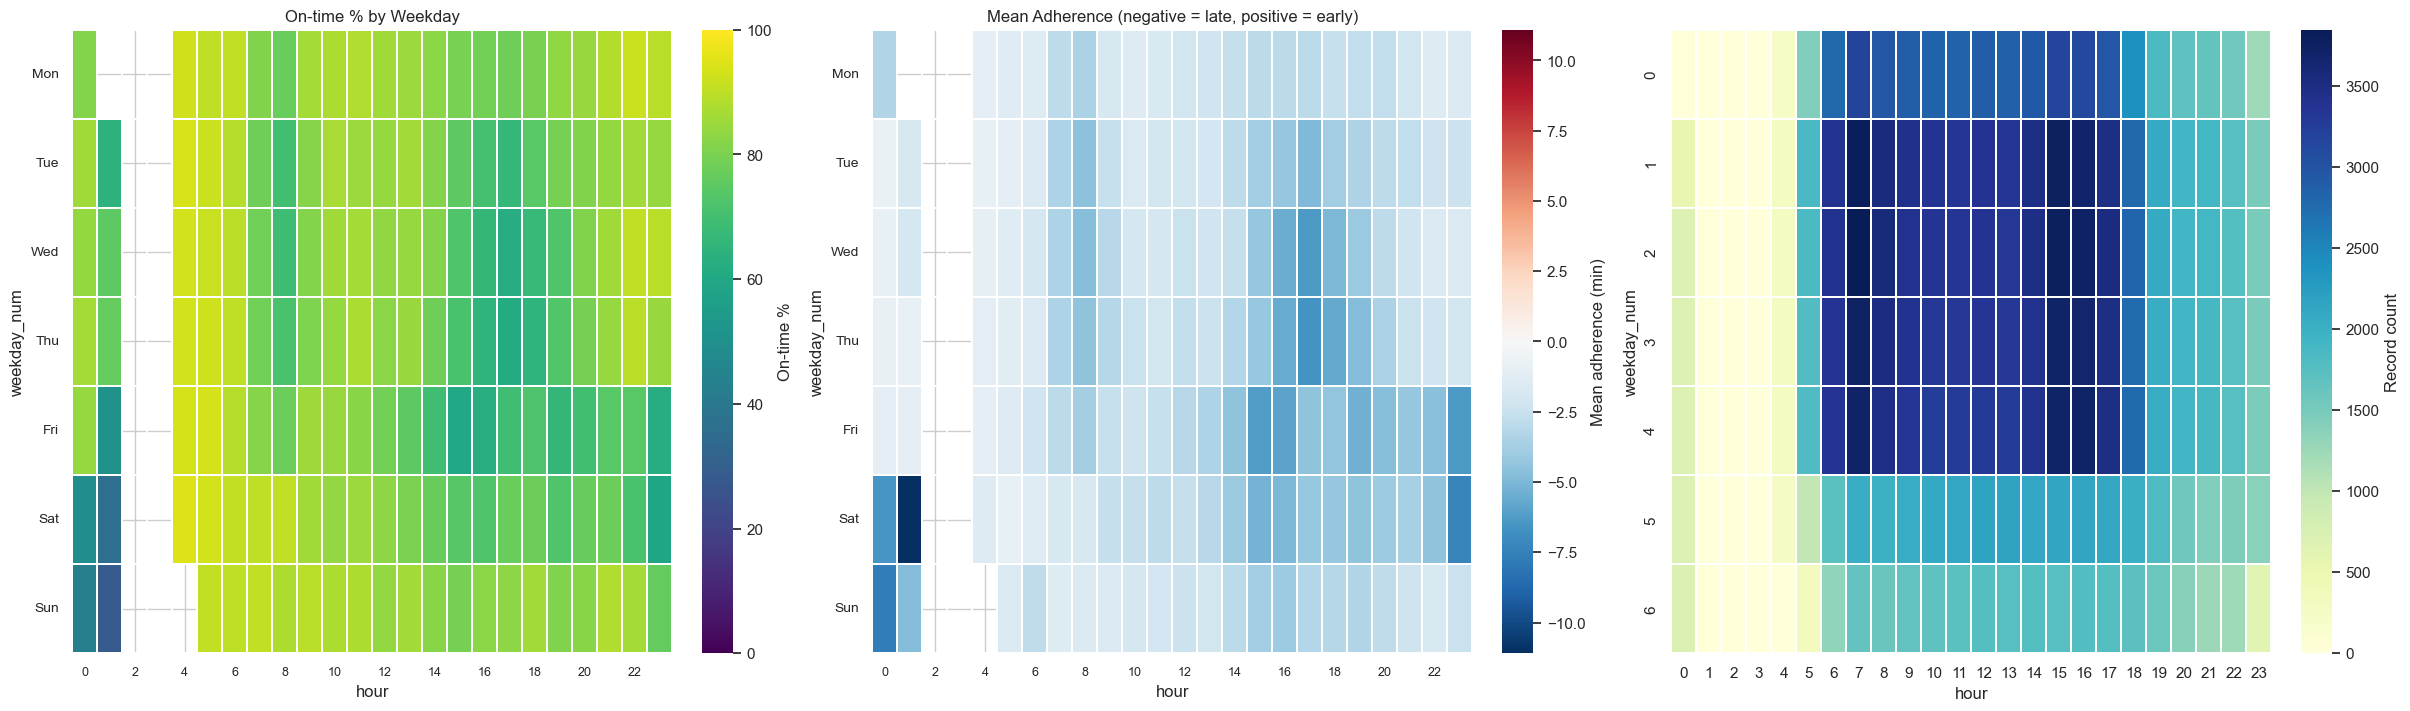

In [15]:
# Cell 4: Q3 - time of day / day of week analysis, heatmaps (On-time %, Mean Adherence, Counts)
MIN_OBS = 30   # threshold we used for reliability
hour_col = 'hour'
wd_col = 'weekday_num'
adherence_col = 'ADHERENCE'

# Ensure time columns exist
if 'hour' not in df.columns or 'weekday_num' not in df.columns:
    df['scheduled_dt'] = pd.to_datetime(df['SCHEDULED_TIME'], errors='coerce')
    df['hour'] = df['scheduled_dt'].dt.hour
    df['weekday_num'] = df['scheduled_dt'].dt.weekday

# Mean by hour and weekday table
mean_by_hour = df.groupby('hour')[adherence_col].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'}).reset_index()
mean_by_wd = df.groupby('weekday_num')[adherence_col].agg(['mean','count']).rename(columns={'mean':'mean_adherence','count':'n'}).reset_index()
mean_by_wd['weekday'] = mean_by_wd['weekday_num'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

print("Mean adherence by hour (sample):")
display(mean_by_hour.head(24))
print("Mean adherence by weekday:")
display(mean_by_wd.sort_values('weekday_num'))

# On-time % by time_period (we created time_period earlier but ensure it here)
bins = [0,4,6,9,12,15,18,21,24]
labels = ["LateNight","EarlyMorning","AM_Peak","Midday","Afternoon","PM_Peak","Evening","Night"]
if 'time_period' not in df.columns:
    df['time_period'] = pd.cut(df['hour'].fillna(-1), bins=bins, labels=labels, right=False)

# Compute on-time % by time_period
if all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    agg_tp = df.groupby('time_period', observed=True)[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
    agg_tp['total'] = agg_tp.sum(axis=1)
    agg_tp = agg_tp[agg_tp['total']>0].copy()
    agg_tp['ontime_pct'] = agg_tp['ADJUSTED_ONTIME_COUNT'] / agg_tp['total'] * 100
else:
    df['_ontime_flag'] = ((df[adherence_col] >= -6) & (df[adherence_col] <= 1)).astype(int)
    agg_tp = df.groupby('time_period', observed=True)['_ontime_flag'].agg(['mean','count']).rename(columns={'mean':'ontime_pct','count':'total'})
    agg_tp['ontime_pct'] = agg_tp['ontime_pct'] * 100

print("On-time % by time period:")
display(agg_tp.sort_values('ontime_pct', ascending=False))

# Heatmaps (3 panels) - clean version
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
hours = list(range(24))

# On-time pivot
if all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]):
    num = df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
    tot = (
        df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_ONTIME_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_LATE_COUNT', aggfunc='sum', fill_value=0)
        + df.pivot_table(index=wd_col, columns=hour_col, values='ADJUSTED_EARLY_COUNT', aggfunc='sum', fill_value=0)
    )
    ontime_pct = (num / tot.replace(0, np.nan)) * 100
else:
    df['_ontime_flag'] = ((df[adherence_col] >= -6) & (df[adherence_col] <= 1)).astype(int)
    ontime_pct = df.pivot_table(index=wd_col, columns=hour_col, values='_ontime_flag', aggfunc='mean') * 100

# mean adherence pivot & counts pivot
mean_ad = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='mean')
count_cells = df.pivot_table(index=wd_col, columns=hour_col, values=adherence_col, aggfunc='count', fill_value=0)

# Reindex & mask
ontime_pct = ontime_pct.reindex(index=[0,1,2,3,4,5,6], columns=hours)
mean_ad = mean_ad.reindex(index=[0,1,2,3,4,5,6], columns=hours)
count_cells = count_cells.reindex(index=[0,1,2,3,4,5,6], columns=hours).fillna(0)

# Mask for low-sample cells
mask_low = count_cells < MIN_OBS

# Plot clean 3-panel heatmap (no annotations except counts panel)
fig, axes = plt.subplots(1,3, figsize=(24,7), constrained_layout=True)

# On-time %
ax = axes[0]
sns.heatmap(ontime_pct, ax=ax, cmap="viridis", vmin=0, vmax=100, mask=ontime_pct.isna(), linewidths=0.25, linecolor='white', cbar_kws={'label':'On-time %'})
ax.set_yticks(np.arange(0.5,7.5))
ax.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax.set_xticks(np.arange(0.5,24.5,2))
ax.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax.set_title("On-time % by Weekday")

# Mean adherence
ax2 = axes[1]
max_abs = np.nanmax(np.abs(mean_ad.values))
vmin, vmax = (-max_abs, max_abs) if np.isfinite(max_abs) else (-5,5)
sns.heatmap(mean_ad, ax=ax2, cmap="RdBu_r", center=0, vmin=vmin, vmax=vmax, mask=mean_ad.isna(), linewidths=0.25, linecolor='white', cbar_kws={'label':'Mean adherence (min)'})
ax2.set_yticks(np.arange(0.5,7.5))
ax2.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax2.set_xticks(np.arange(0.5,24.5,2))
ax2.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax2.set_title("Mean Adherence (negative = late, positive = early)")

# Counts
ax3 = axes[2]
sns.heatmap(count_cells, ax=ax3, cmap="YlGnBu", annot=count_cells, fmt='d', annot_kws={'fontsize':8}, linewidths=0.25, linecolor='white', cbar_kws={'label':'Record count'})
ax3.set_yticks(np.arange(0.5,7.5))
ax3.set_yticklabels(weekday_labels, rotation=0, fontsize=10)
ax3.set_xticks(np.arange(0.5,24.5,2))
ax3.set_xticklabels(list(range(0,24,2)), fontsize=9)
ax3.set_title("Counts per cell")

out = "q3_heatmaps_3panel.png"
plt.suptitle("WeGo: Hourly × Weekday Reliability (On-time %, Mean Adherence, Counts)", fontsize=14)
plt.savefig(out, bbox_inches='tight', dpi=200)
plt.show()
print("Saved:", out)


Top 10 operators by on-time %:


ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  total  ontime_pct  late_pct  early_pct
OPERATOR                                                                                                          
0                             1                    0                     0      1  100.000000  0.000000   0.000000
56                            3                    0                     0      3  100.000000  0.000000   0.000000
2294                         45                    0                     0     45  100.000000  0.000000   0.000000
1762                       2294                   23                    16   2333   98.328333  0.985855   0.685812
1706                         43                    0                     1     44   97.727273  0.000000   2.272727
1597                        252                    6                     0    258   97.674419  2.325581   0.000000
2639                        202                    2                     3    207   97.584541  0.966184   1.449275
2573                        400                   12                     0    412   97.087379  2.912621   0.000000
409                        2310                   61                     9   2380   97.058824  2.563025   0.378151
1566                       2135                   48                    17   2200   97.045455  2.181818   0.772727


Operators sample counts (descending):


ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  total  ontime_pct   late_pct  early_pct
OPERATOR                                                                                                           
1266                       2522                  268                    75   2865   88.027923   9.354276   2.617801
1147                       2439                   88                   159   2686   90.804170   3.276247   5.919583
1133                       2505                  107                    13   2625   95.428571   4.076190   0.495238
2352                       2148                  241                   216   2605   82.456814   9.251440   8.291747
2424                       2146                  325                    46   2517   85.260230  12.912197   1.827573
304                        2155                  275                     3   2433   88.573777  11.302918   0.123305
2399                       2041                  367                    21   2429   84.026348  15.109098   0.864553
1927                       2317                   58                    38   2413   96.021550   2.403647   1.574803
332                        1820                  518                    54   2392   76.086957  21.655518   2.257525
2246                       1895                  462                    25   2382   79.554996  19.395466   1.049538

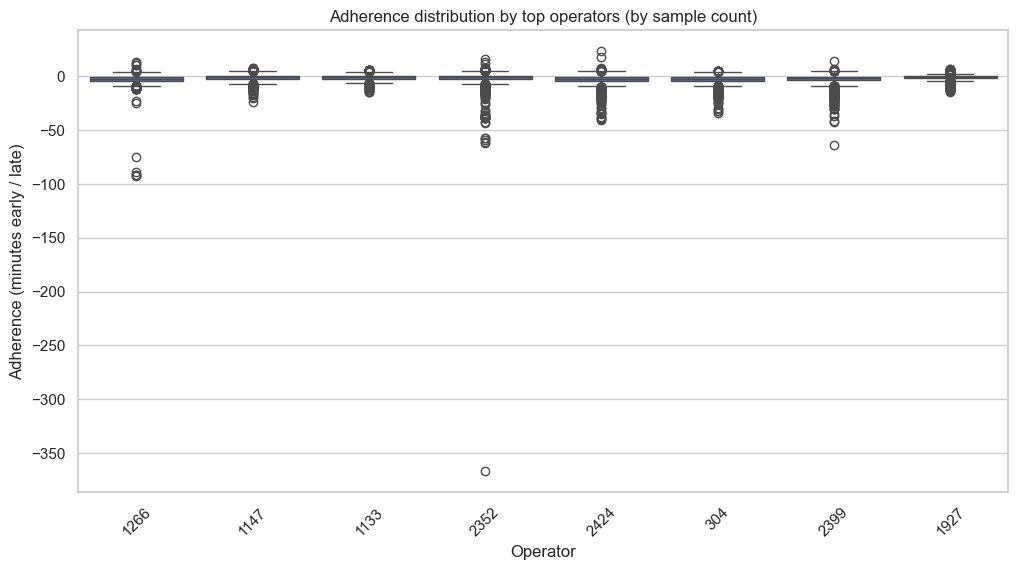


Running Kruskal-Wallis on 299 operator groups (min samples=50)...
Kruskal-Wallis: H=52140.909, p=0


In [17]:
# ---- Driver effect: OPERATOR ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats   # you installed scipy earlier

sns.set(style="whitegrid")

# Config
op_col = "OPERATOR"
ad_col = "ADHERENCE"
min_op_samples = 50   # filter tiny operators for plots

# 1. Decide on on-time definition or use adjusted counts
have_adjusted = all(c in df.columns for c in ["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"])

if have_adjusted:
    # use adjusted counts aggregated by OPERATOR
    op_agg = df.groupby(op_col)[["ADJUSTED_ONTIME_COUNT","ADJUSTED_LATE_COUNT","ADJUSTED_EARLY_COUNT"]].sum()
    op_agg["total"] = op_agg.sum(axis=1)
    op_agg = op_agg[op_agg["total"]>0].copy()
    op_agg["ontime_pct"] = op_agg["ADJUSTED_ONTIME_COUNT"] / op_agg["total"] * 100
    op_agg["late_pct"] = op_agg["ADJUSTED_LATE_COUNT"] / op_agg["total"] * 100
    op_agg["early_pct"] = op_agg["ADJUSTED_EARLY_COUNT"] / op_agg["total"] * 100
else:
    # fallback: use ADHERENCE threshold [-6,1] to create ontime flag
    df["_ontime_flag"] = df[ad_col].between(-6,1, inclusive="both")
    op_agg = df.groupby(op_col)["_ontime_flag"].agg(['mean','count']).rename(columns={'mean':'ontime_frac','count':'total'})
    op_agg['ontime_pct'] = op_agg['ontime_frac'] * 100

# Basic table sorted by on-time %
op_table = op_agg.sort_values("ontime_pct", ascending=False)
print("Top 10 operators by on-time %:")
display(op_table.head(10))

print("\nOperators sample counts (descending):")
display(op_table.sort_values("total", ascending=False).head(10))

# Boxplot of adherence by operator (top N operators by count)
top_ops = op_table.sort_values("total", ascending=False).head(8).index.tolist()
plot_df = df[df[op_col].isin(top_ops)].copy()
plt.figure(figsize=(12,6))
sns.boxplot(data=plot_df, x=op_col, y=ad_col, order=top_ops)
plt.title("Adherence distribution by top operators (by sample count)")
plt.ylabel("Adherence (minutes early / late)")
plt.xlabel("Operator")
plt.xticks(rotation=45)
plt.show()

# Statistical test: Kruskal-Wallis across operators with enough data
groups = []
labels = []
for op, g in df.groupby(op_col):
    vals = g[ad_col].dropna()
    if len(vals) >= min_op_samples:
        groups.append(vals.values)
        labels.append(op)
print(f"\nRunning Kruskal-Wallis on {len(groups)} operator groups (min samples={min_op_samples})...")
if len(groups) >= 2:
    H, p = stats.kruskal(*groups)
    print(f"Kruskal-Wallis: H={H:.3f}, p={p:.4g}")
else:
    print("Not enough operator groups with required sample size for Kruskal-Wallis.")


Rows with both ADHERENCE and HDWY_DEV: 265893


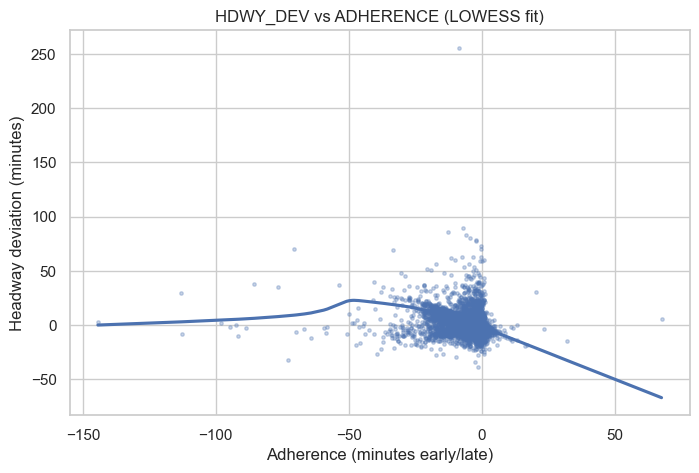

Spearman correlation ADHERENCE vs HDWY_DEV: rho=-0.499, p=0

Mean headway deviation % by scheduled headway bin:


C:\Users\user\AppData\Local\Temp\ipykernel_11684\1970534565.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(sub.groupby("sched_hdw_bin")["hdwy_dev_pct"].agg(['mean','median','count']))


mean     median   count
sched_hdw_bin                               
<=5            162.311129  50.666660     841
6-10             2.389152  -0.333340   73442
11-15            2.515568   0.444440   74724
16-30            2.691126   0.166665  101925
31-60            4.519598   0.325202   14057
>60              3.464500  -0.026456     858

In [18]:
# ---- ADHERENCE vs HDWY_DEV ----
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

ad_col = "ADHERENCE"
hd_col = "HDWY_DEV"
sched_hd_col = "SCHEDULED_HDWY"

# Clean subset (drop NA)
sub = df[[ad_col, hd_col, sched_hd_col]].dropna().copy()
print("Rows with both ADHERENCE and HDWY_DEV:", len(sub))

# 1) scatter + regression (robust)
plt.figure(figsize=(8,5))
sns.regplot(data=sub.sample(min(len(sub),20000), random_state=1), x=ad_col, y=hd_col, lowess=True, scatter_kws={'s':6, 'alpha':0.3})
plt.xlabel("Adherence (minutes early/late)")
plt.ylabel("Headway deviation (minutes)")
plt.title("HDWY_DEV vs ADHERENCE (LOWESS fit)")
plt.show()

# 2) correlation (Spearman)
rho, pval = spearmanr(sub[ad_col], sub[hd_col])
print(f"Spearman correlation ADHERENCE vs HDWY_DEV: rho={rho:.3f}, p={pval:.3g}")

# 3) headway deviation percent and bin by scheduled headway
if sched_hd_col in sub.columns:
    sub["hdwy_dev_pct"] = sub[hd_col] / sub[sched_hd_col] * 100
    # create bins for scheduled headway
    bins = [0,5,10,15,30,60,9999]
    labels = ["<=5","6-10","11-15","16-30","31-60",">60"]
    sub["sched_hdw_bin"] = pd.cut(sub[sched_hd_col], bins=bins, labels=labels, right=True)
    # show mean hdwy_dev_pct by bin
    print("\nMean headway deviation % by scheduled headway bin:")
    display(sub.groupby("sched_hdw_bin")["hdwy_dev_pct"].agg(['mean','median','count']))
else:
    print("SCHEDULED_HDWY not found; skipping headway percent analysis.")


Total trips with downstream data: 3987


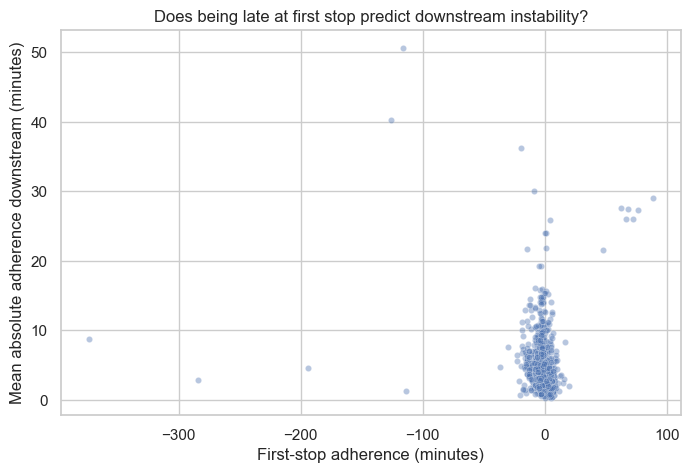

Spearman corr first_adherence vs mean_abs_ad_down: rho=-0.343, p=2.042e-105


In [19]:
# ---- Stretch A: first-stop lateness impact downstream ----
from statistics import mean

trip_col = "TRIP_ID"
seq_col = "ROUTE_STOP_SEQUENCE"  # sequence number along trip
timepoint_col = "TIME_POINT_ABBR"

# Ensure sequence is numeric
df[seq_col] = pd.to_numeric(df[seq_col], errors='coerce')

# find first stop per trip (min sequence)
first_stops = df.dropna(subset=[trip_col, seq_col]).loc[df.groupby(trip_col)[seq_col].idxmin()].copy()
first_stops = first_stops[[trip_col, seq_col, ad_col, timepoint_col, "ACTUAL_ARRIVAL_TIME", "ACTUAL_DEPARTURE_TIME"]].rename(columns={ad_col: "first_adherence"})

# Merge downstream metrics: for each trip, compute mean absolute adherence and mean absolute hdwy_dev for stops AFTER the first stop
downstream = []
for trip, group in df.groupby(trip_col):
    group = group.dropna(subset=[seq_col])
    if len(group) < 2:
        continue
    first_seq = group[seq_col].min()
    downstream_group = group[group[seq_col] > first_seq]
    if len(downstream_group) == 0:
        continue
    downstream.append({
        trip_col: trip,
        "n_down": len(downstream_group),
        "mean_abs_ad_down": downstream_group[ad_col].abs().mean(),
        "mean_hdwy_dev_down": downstream_group[hd_col].abs().mean() if hd_col in downstream_group.columns else np.nan,
        "mean_hdwy_dev_pct_down": (downstream_group[hd_col] / downstream_group[sched_hd_col]).abs().mean() if (hd_col in downstream_group.columns and sched_hd_col in downstream_group.columns) else np.nan
    })

down_df = pd.DataFrame(downstream)
# join first_stops
merged = pd.merge(first_stops, down_df, on=trip_col, how='inner')

print("Total trips with downstream data:", len(merged))

# Quick scatter: first_stop adherence vs mean_abs_ad_down
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged.sample(min(len(merged),2000), random_state=1), x="first_adherence", y="mean_abs_ad_down", alpha=0.4, s=20)
plt.xlabel("First-stop adherence (minutes)")
plt.ylabel("Mean absolute adherence downstream (minutes)")
plt.title("Does being late at first stop predict downstream instability?")
plt.show()

# basic correlation
valid = merged.dropna(subset=["first_adherence","mean_abs_ad_down"])
rho, p = spearmanr(valid["first_adherence"], valid["mean_abs_ad_down"])
print(f"Spearman corr first_adherence vs mean_abs_ad_down: rho={rho:.3f}, p={p:.4g}")


Trips summarized: 3915
Correlation scheduled_layover vs mean_abs_hdwy_dev_down:
Spearman rho=0.112, p=1.279e-05, n=1521


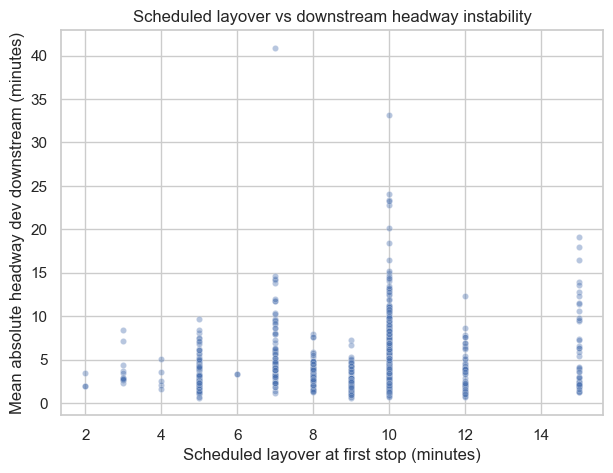

In [20]:
# ---- Stretch B: layover impact ----
lay_col = "SCHEDULED_LAYOVER_MINUTES"
dwell_col = "DWELL_IN_MINS"

# Create per-trip summary: scheduled layover (first stop), actual dwell at first stop, and downstream hdwy_dev stats
trip_summaries = []
for trip, group in df.groupby(trip_col):
    group = group.dropna(subset=[seq_col])
    if len(group) == 0:
        continue
    first_seq = group[seq_col].min()
    first_row = group[group[seq_col] == first_seq].iloc[0]
    scheduled_lay = first_row.get(lay_col, np.nan)
    actual_dwell = first_row.get(dwell_col, np.nan)
    downstream_group = group[group[seq_col] > first_seq]
    if len(downstream_group)==0:
        continue
    mean_hdwy_abs = downstream_group[hd_col].abs().mean() if hd_col in downstream_group.columns else np.nan
    pct_in_range = None
    if (hd_col in downstream_group.columns) and (sched_hd_col in downstream_group.columns):
        pct_in_range = ((downstream_group[hd_col].abs() <= 0.5*downstream_group[sched_hd_col]).sum() / len(downstream_group)) * 100
    trip_summaries.append({
        trip_col: trip,
        "scheduled_layover": scheduled_lay,
        "actual_first_dwell": actual_dwell,
        "mean_abs_hdwy_dev_down": mean_hdwy_abs,
        "pct_hdwy_within_50pct": pct_in_range
    })

trip_sum_df = pd.DataFrame(trip_summaries).dropna(subset=["mean_abs_hdwy_dev_down"])
print("Trips summarized:", len(trip_sum_df))

# Correlate scheduled layover with downstream mean abs headway dev
print("Correlation scheduled_layover vs mean_abs_hdwy_dev_down:")
valid = trip_sum_df.dropna(subset=["scheduled_layover", "mean_abs_hdwy_dev_down"])
if len(valid) > 10:
    rho, p = spearmanr(valid["scheduled_layover"], valid["mean_abs_hdwy_dev_down"])
    print(f"Spearman rho={rho:.3f}, p={p:.4g}, n={len(valid)}")
else:
    print("Not enough trips with scheduled_layover data to test.")

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=valid.sample(min(len(valid),2000), random_state=1), x="scheduled_layover", y="mean_abs_hdwy_dev_down", alpha=0.4, s=20)
plt.xlabel("Scheduled layover at first stop (minutes)")
plt.ylabel("Mean absolute headway dev downstream (minutes)")
plt.title("Scheduled layover vs downstream headway instability")
plt.show()


In [22]:
# ---- Headway deviation % and acceptability ----
hd_col = "HDWY_DEV"
sched_hd_col = "SCHEDULED_HDWY"

if (hd_col in df.columns) and (sched_hd_col in df.columns):
    df["hdwy_dev_pct"] = df[hd_col] / df[sched_hd_col] * 100
    df["hdwy_in_accept_range"] = df["hdwy_dev_pct"].abs() <= 50   # abs dev pct <= 50% -> within 50% of scheduled
    # overall acceptability
    overall_accept = df["hdwy_in_accept_range"].mean() * 100
    print(f"Overall percent of observations within 50% of scheduled headway: {overall_accept:.1f}%")
    # breakdown by route or hour
    print("\nBy route (top 10 by count):")
    routes = df['ROUTE_ABBR'].value_counts().head(10).index
    display(df[df['ROUTE_ABBR'].isin(routes)].groupby('ROUTE_ABBR')["hdwy_in_accept_range"].mean().mul(100).sort_values(ascending=False).head(10))
else:
    print("HDWY_DEV or SCHEDULED_HDWY missing; cannot compute headway deviation percent.")


Overall percent of observations within 50% of scheduled headway: 64.5%

By route (top 10 by count):


ROUTE_ABBR
50    74.216350
56    67.689104
3     66.706247
52    63.779695
22    61.523942
23    61.275767
55    58.728852
7     58.249196
Name: hdwy_in_accept_range, dtype: float64